In [ ]:
from google.colab import files
uploaded=files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Data Loading
df=pd.read_csv("covid_19_clean_complete.csv")

In [ ]:
#Checking column datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
#Setting date column to correct datatype
df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
df.head()

Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [ ]:
#Checking for null values
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
df.shape

(49068, 10)

In [ ]:
#as there are so many nulls in Province column therefore drop it
df.drop(columns="Province/State",inplace=True)


In [ ]:
#Checking for duplicates
df.duplicated().sum()

0

In [ ]:
df['Country/Region'].unique().shape
#187 different countries data so cannot make seperate models. Need to combine the results and them model.

(187,)

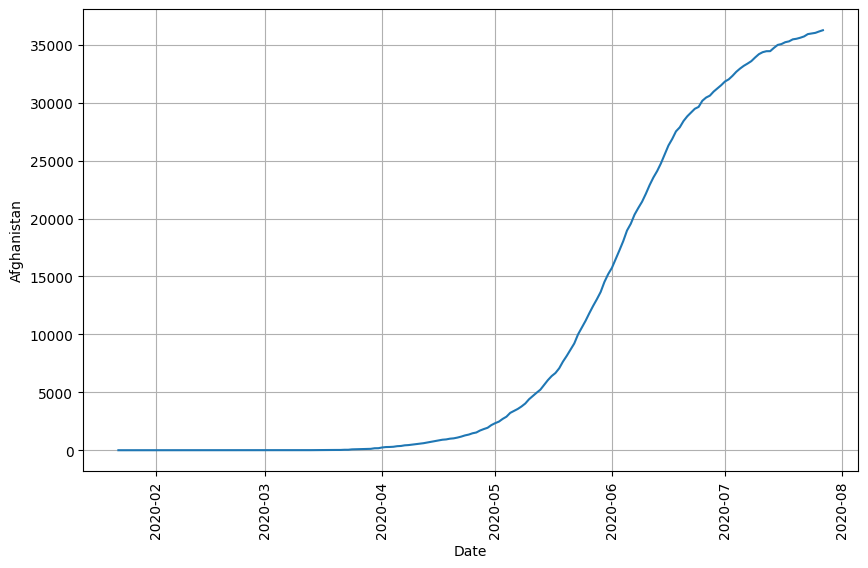

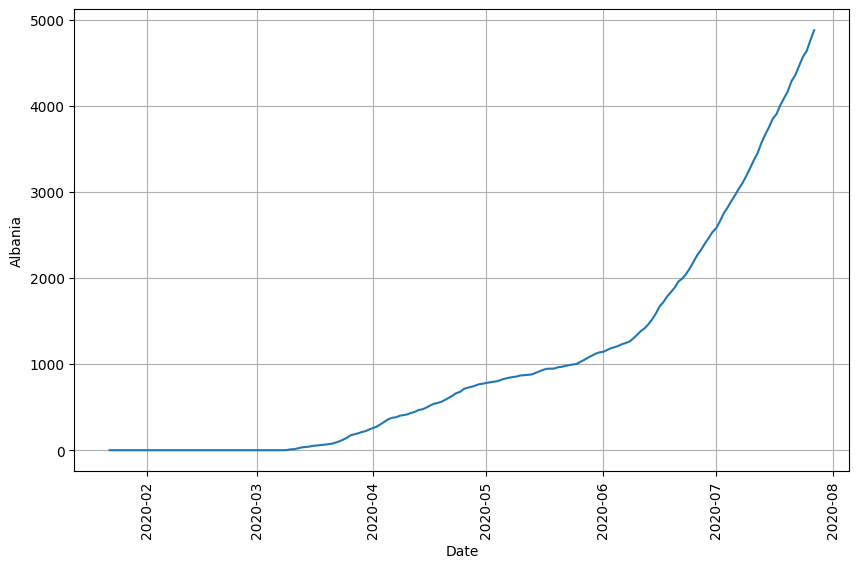

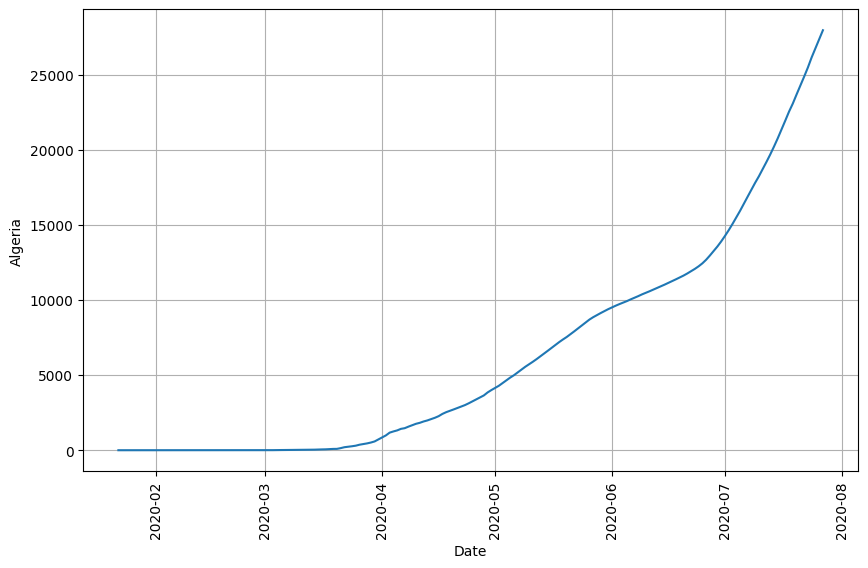

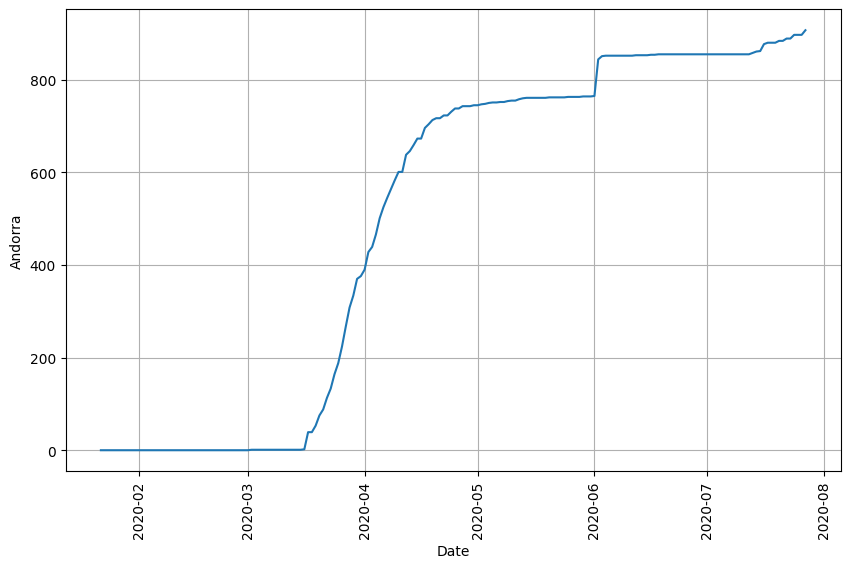

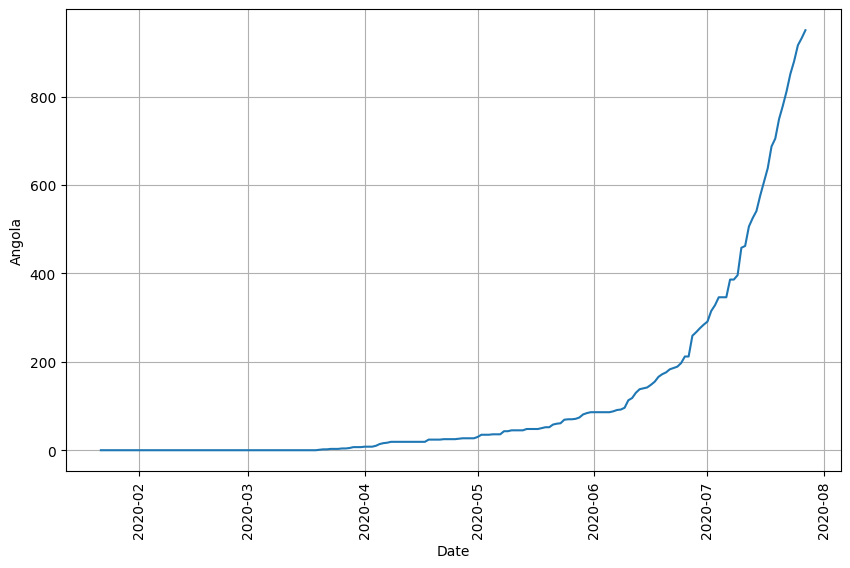

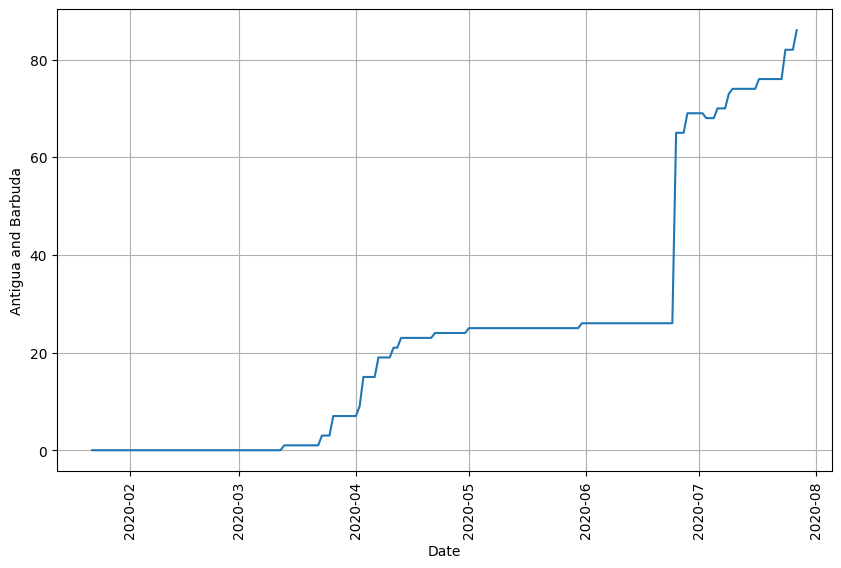

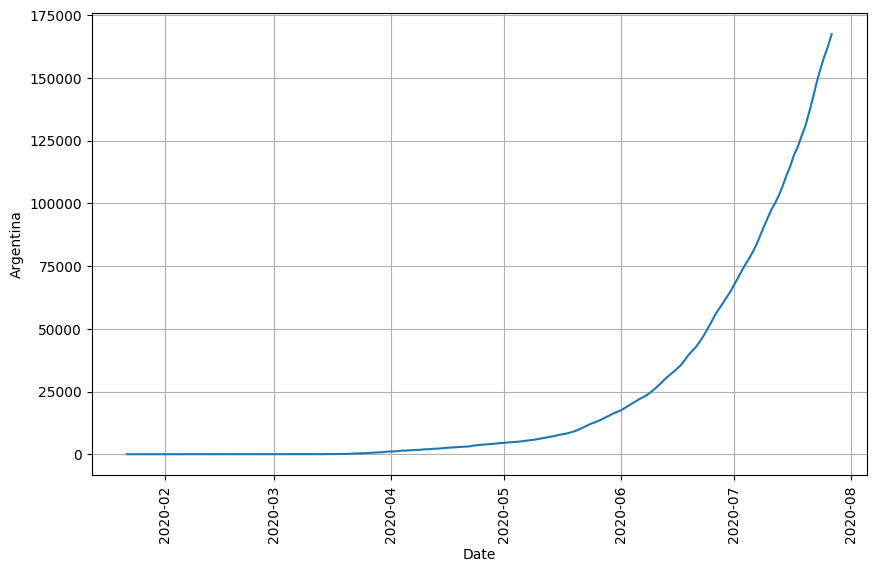

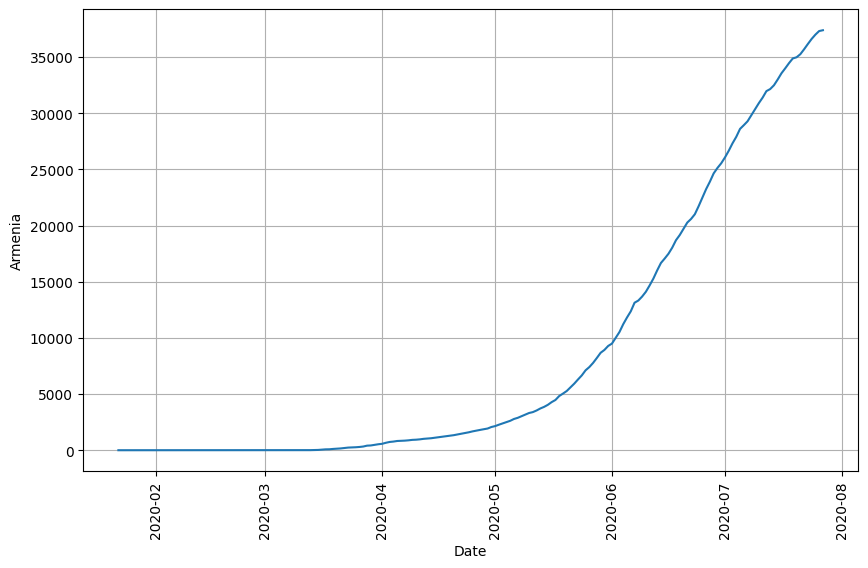

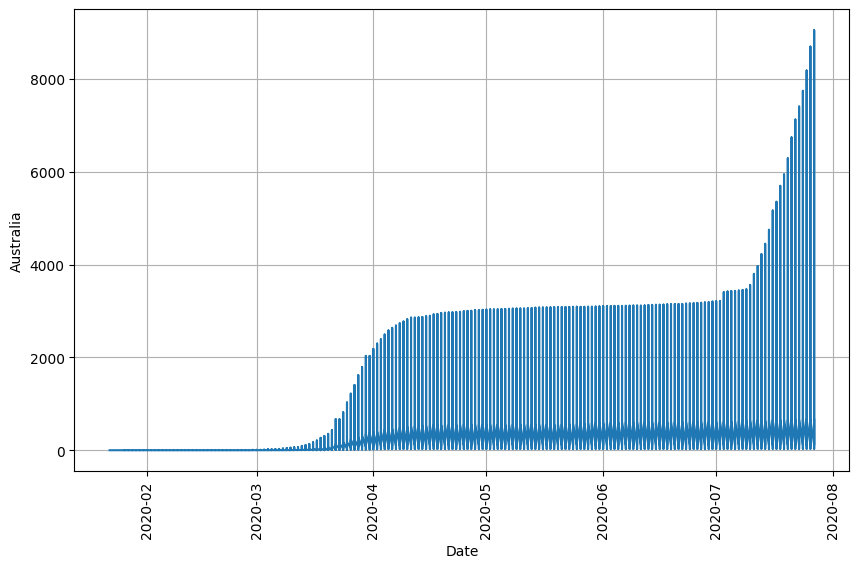

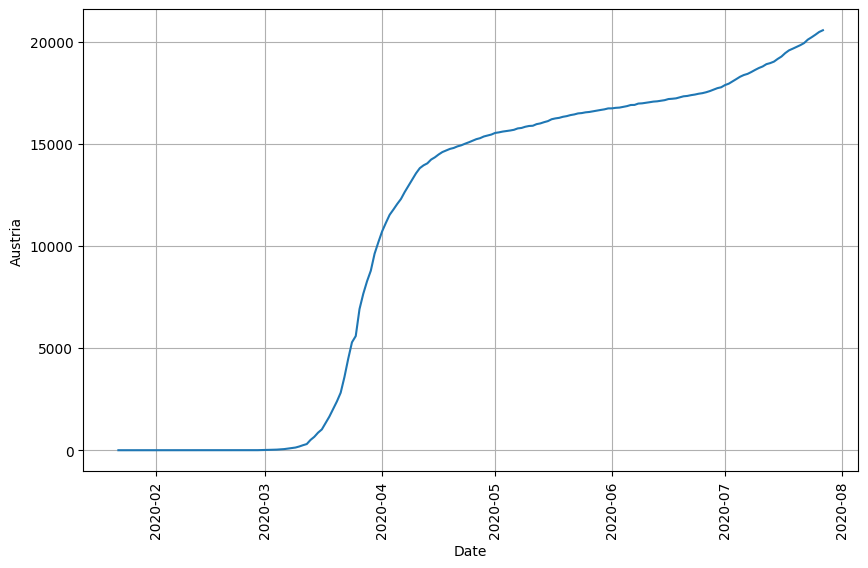

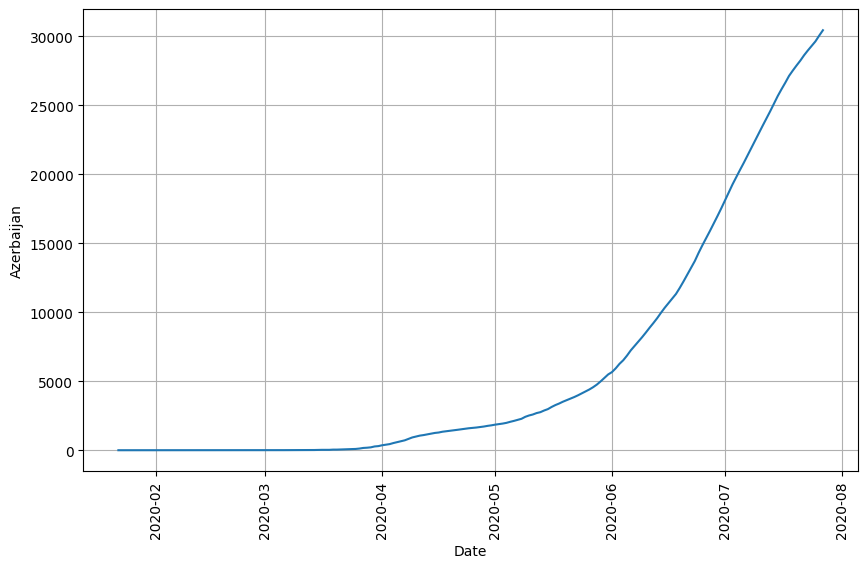

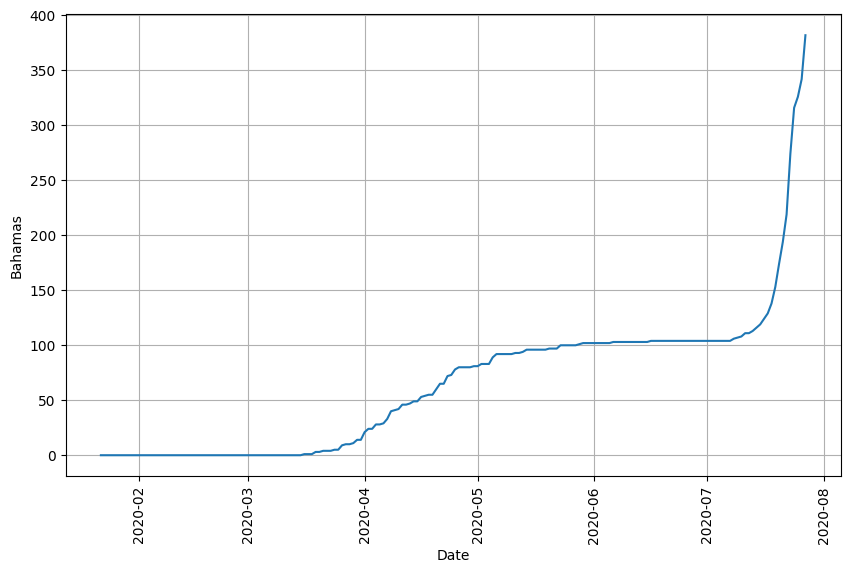

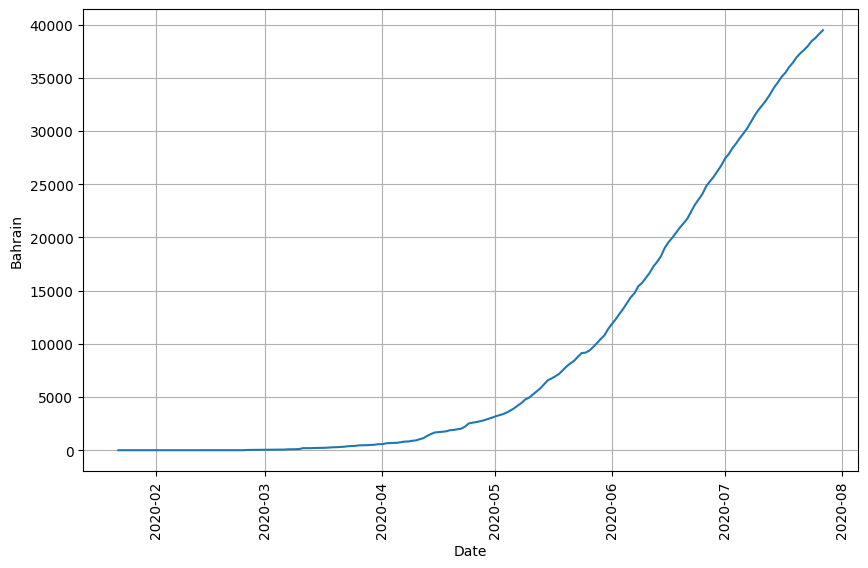

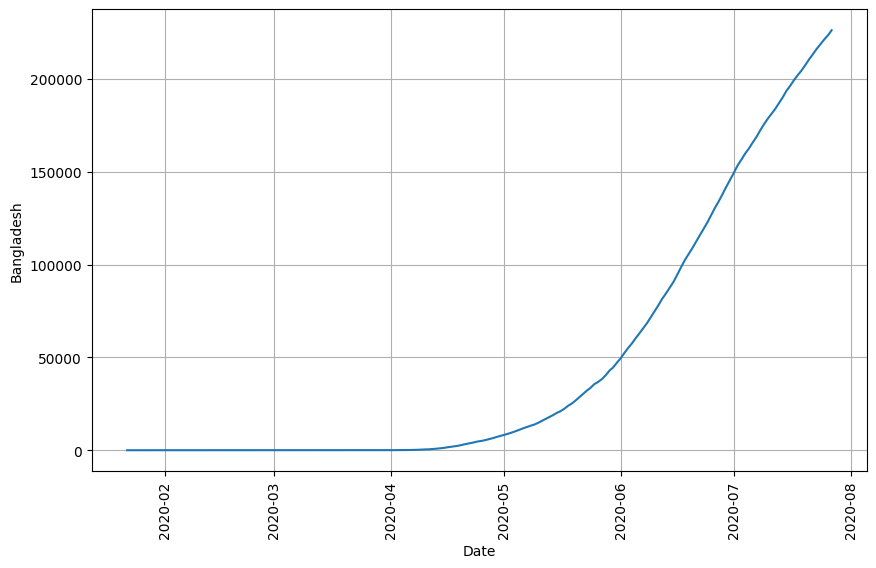

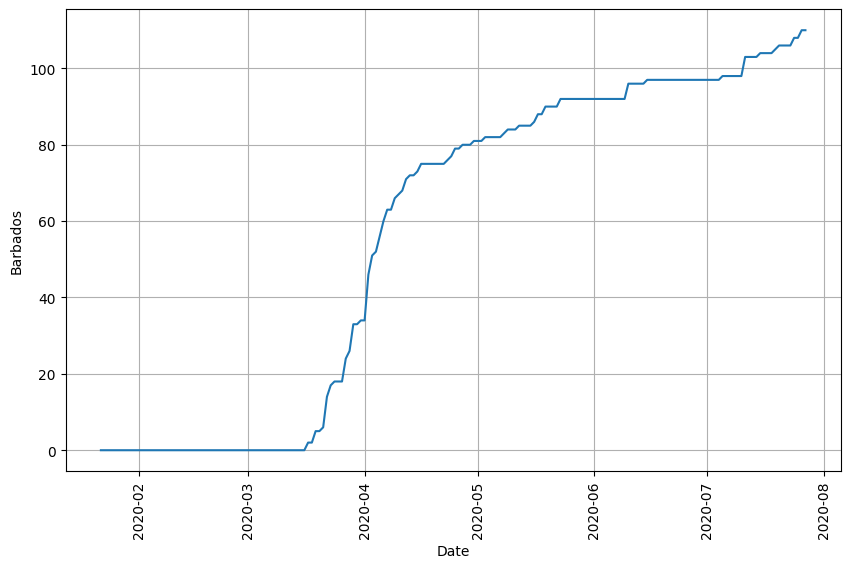

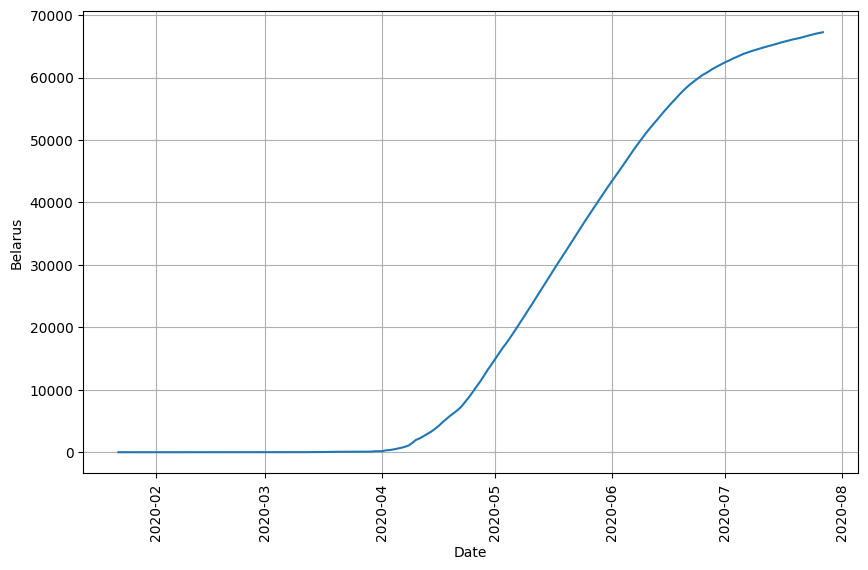

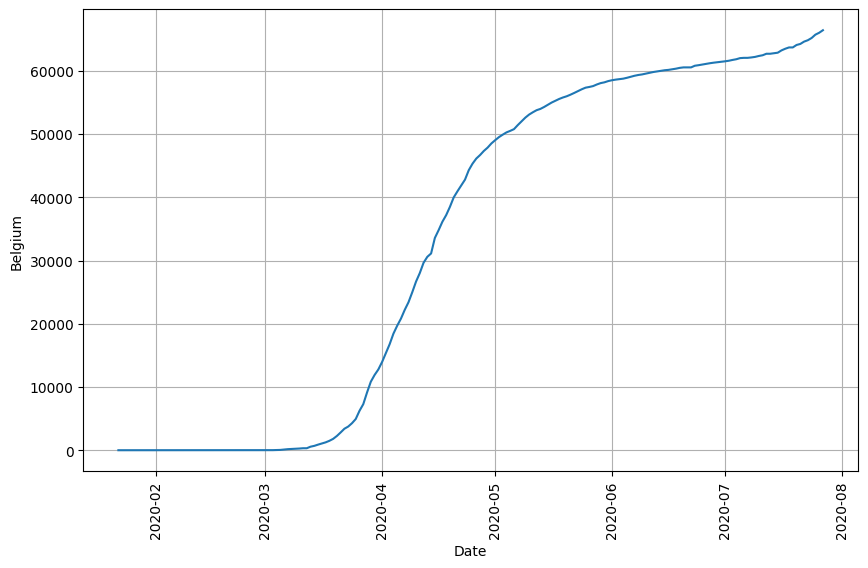

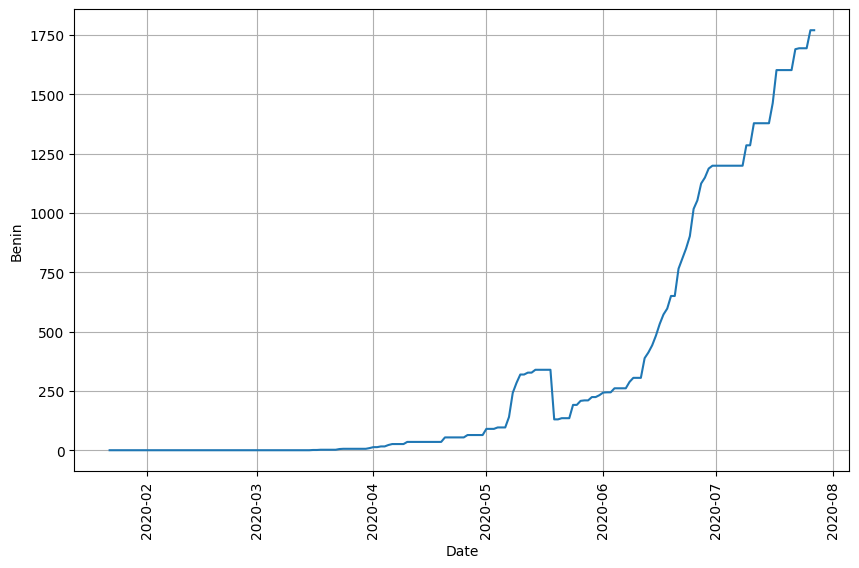

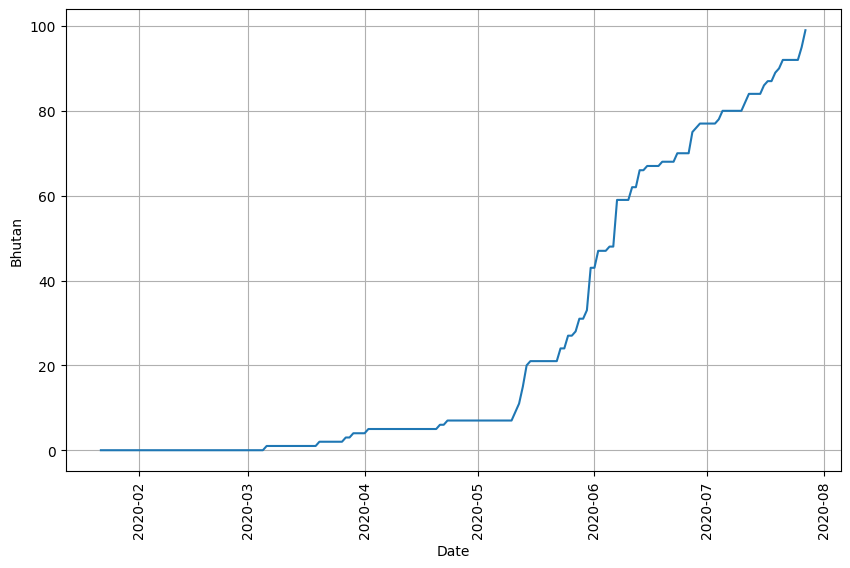

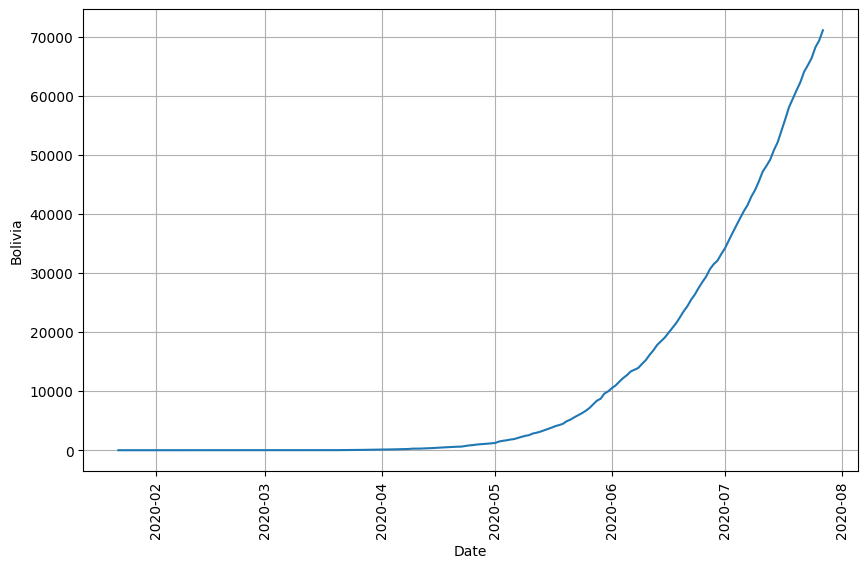

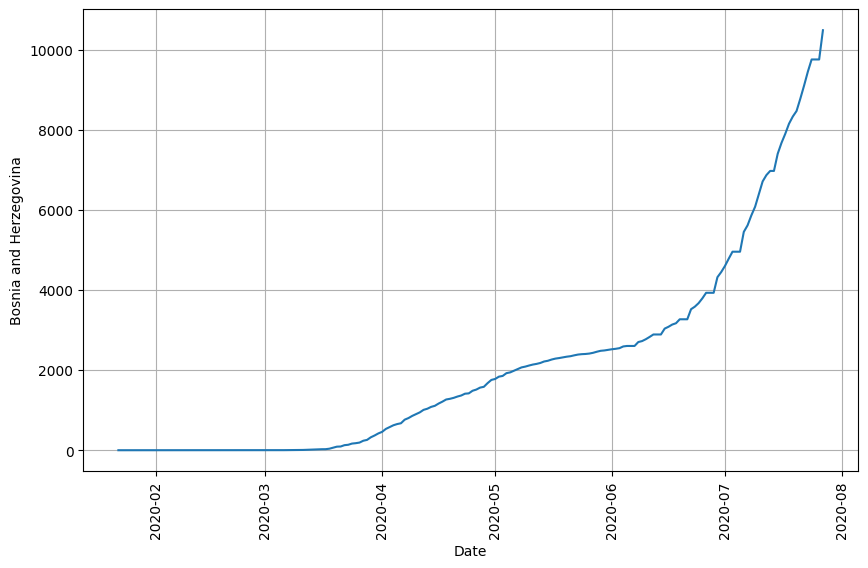

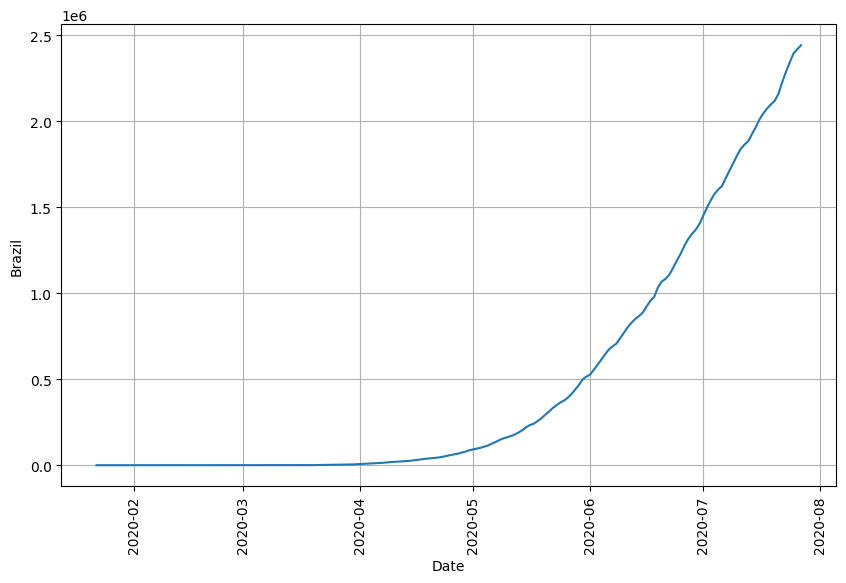

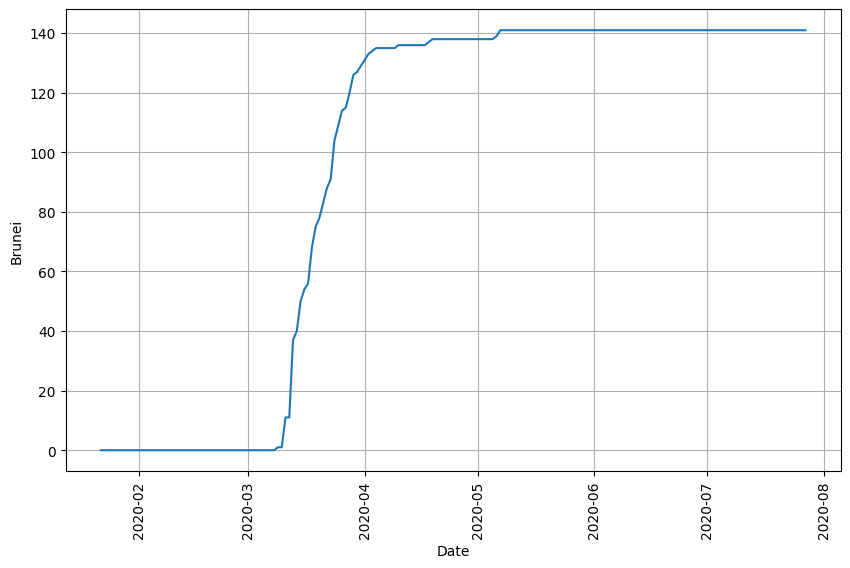

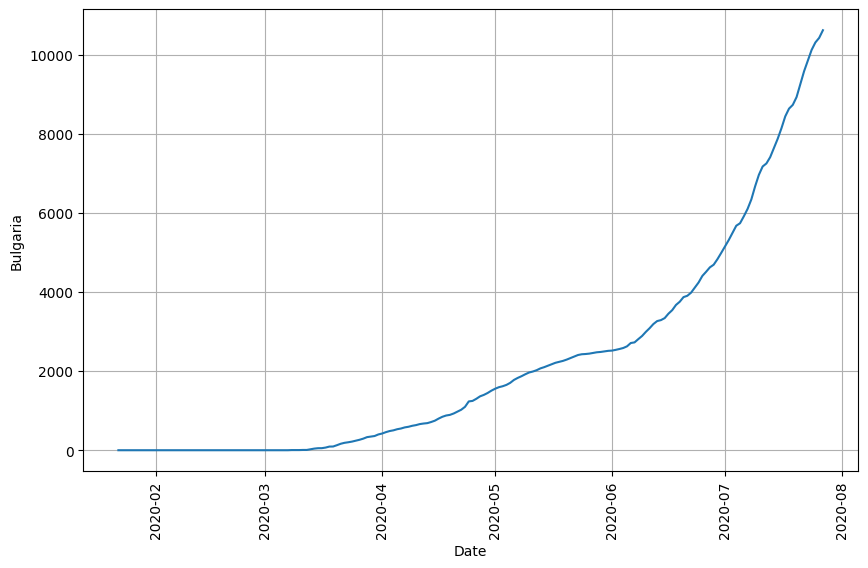

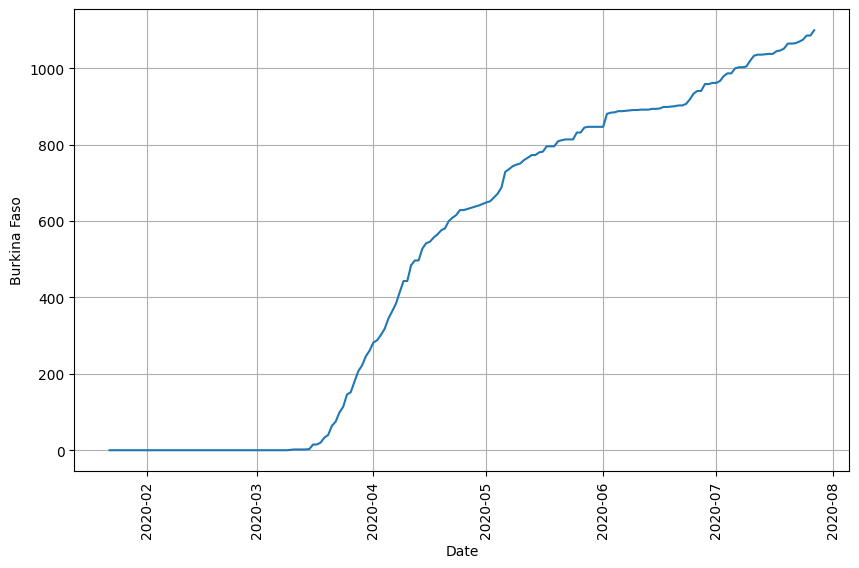

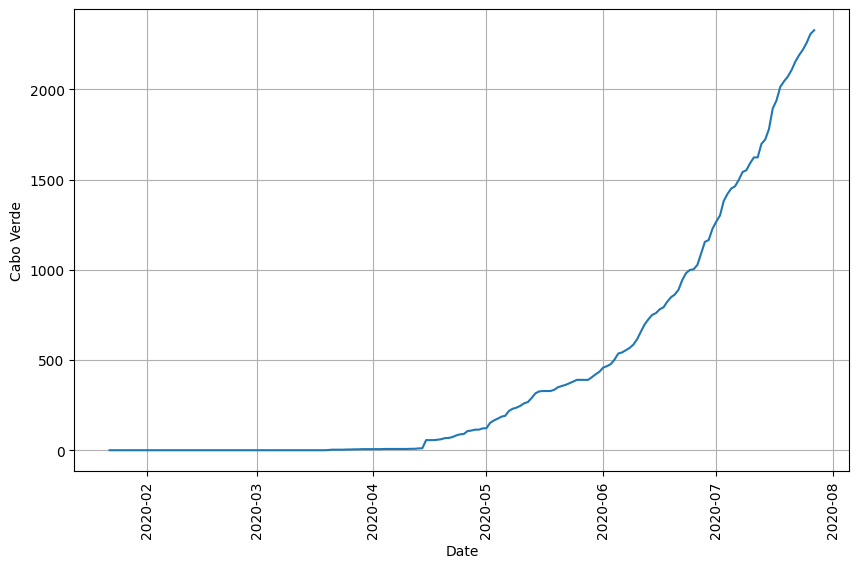

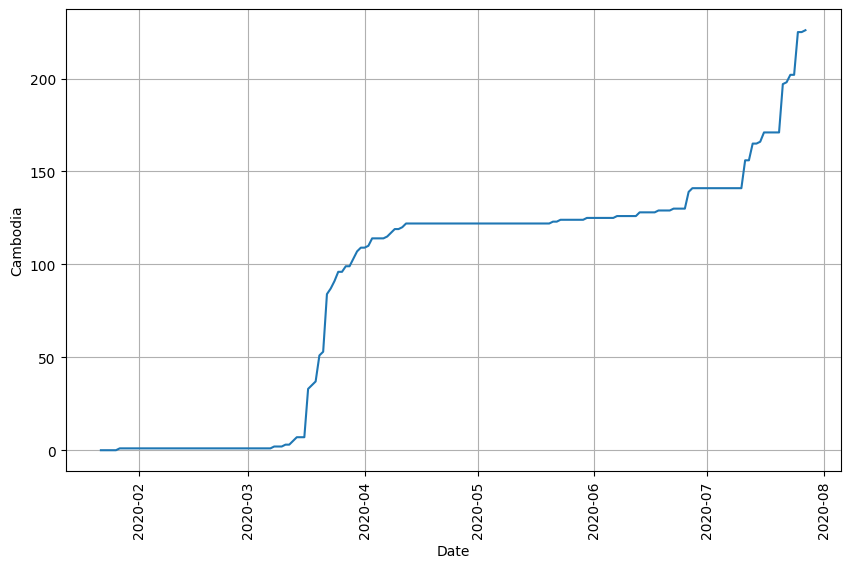

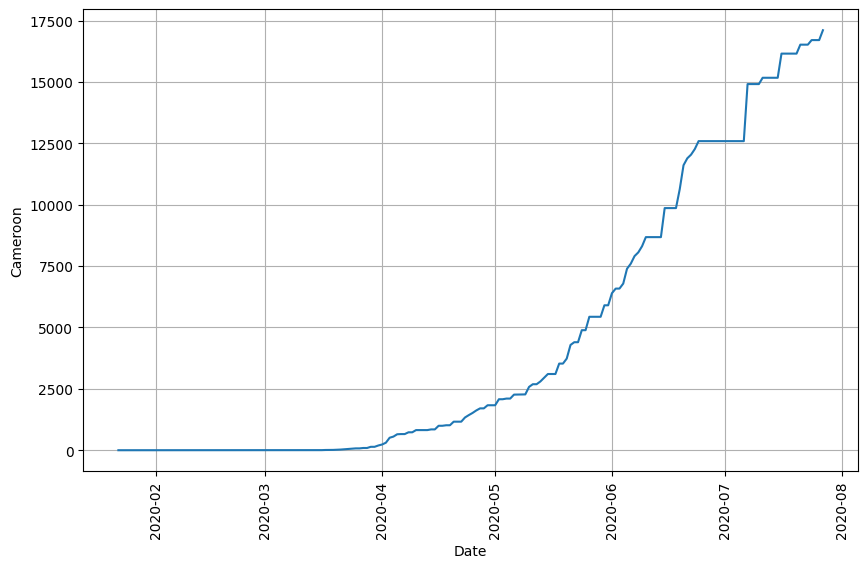

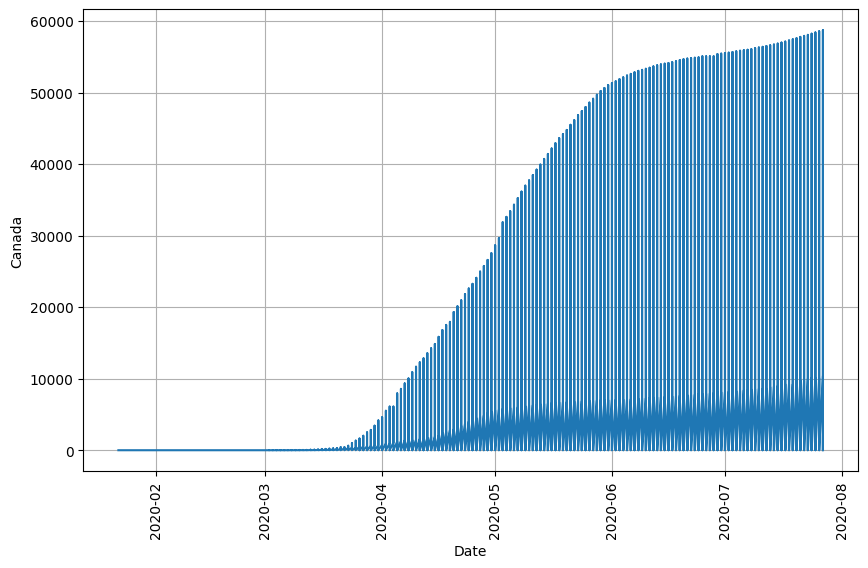

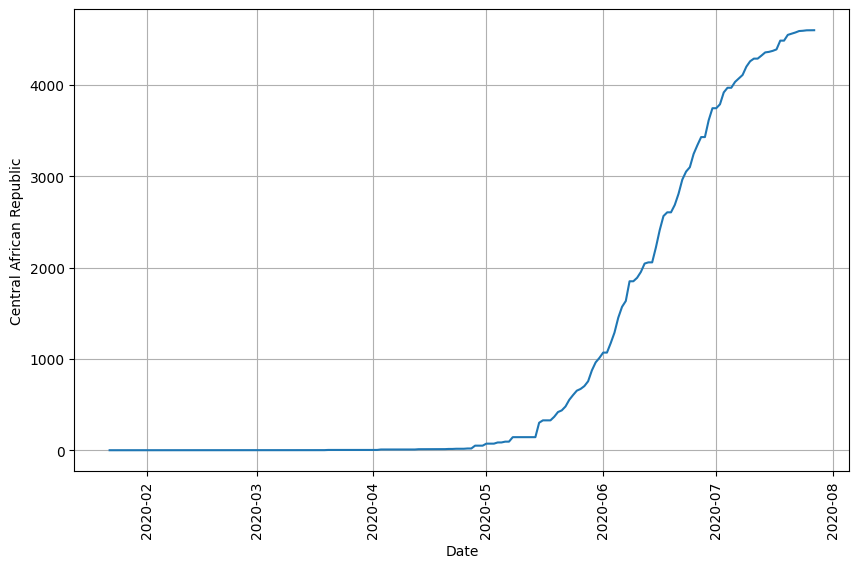

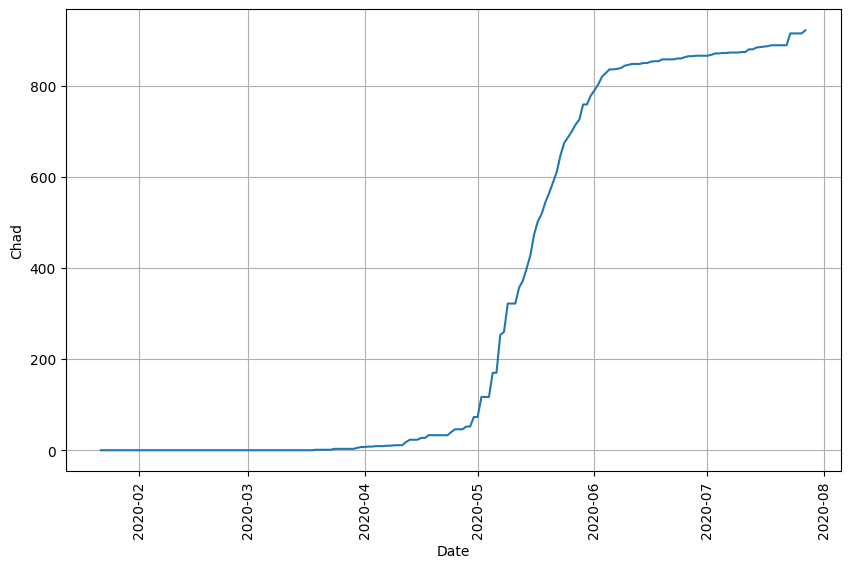

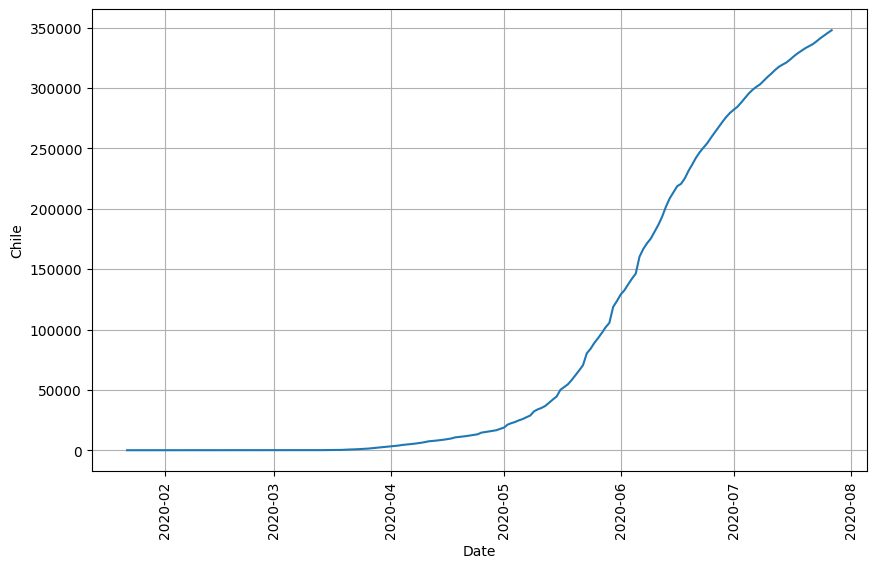

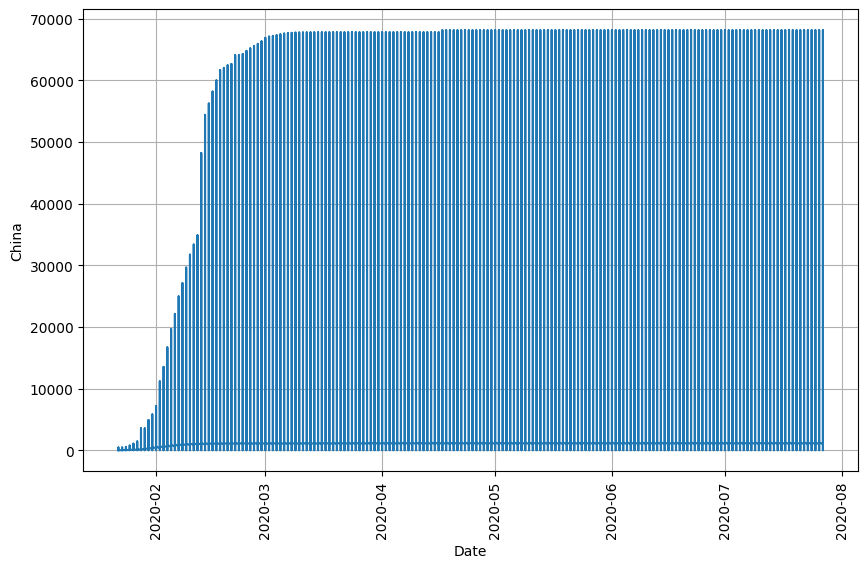

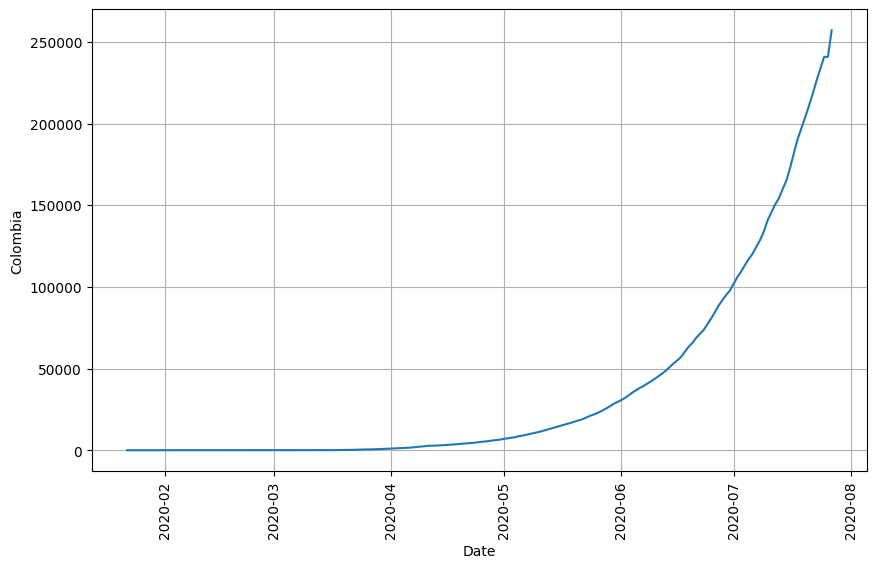

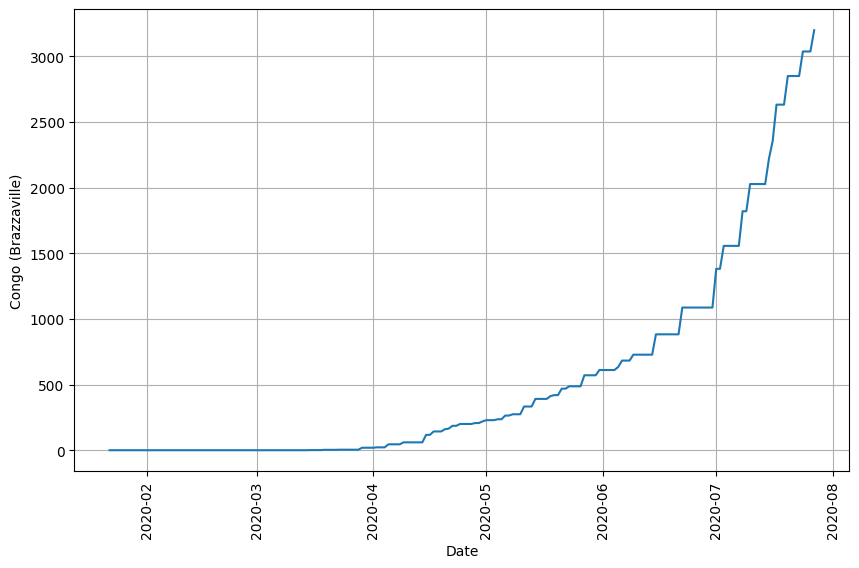

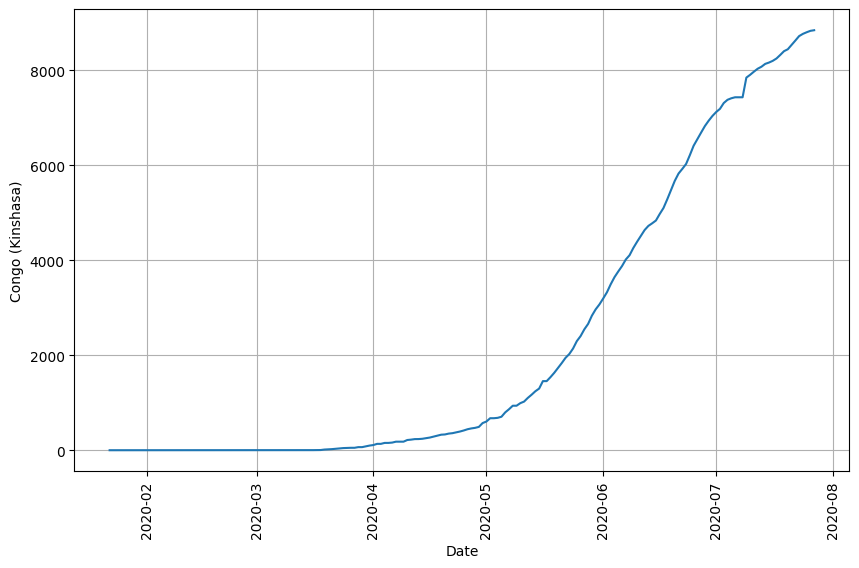

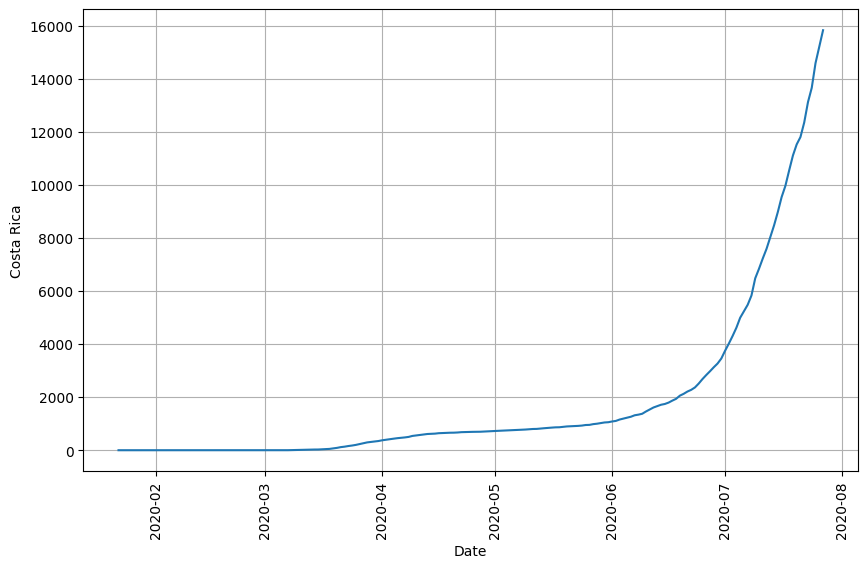

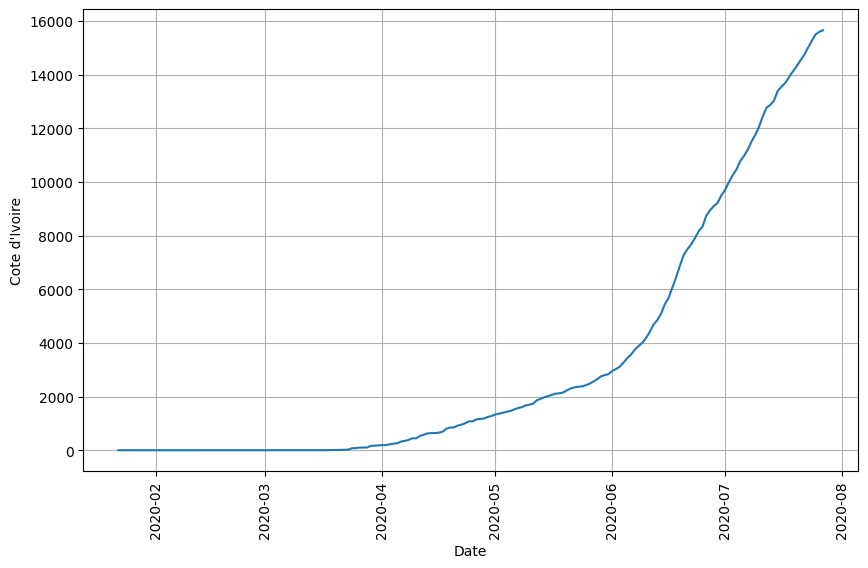

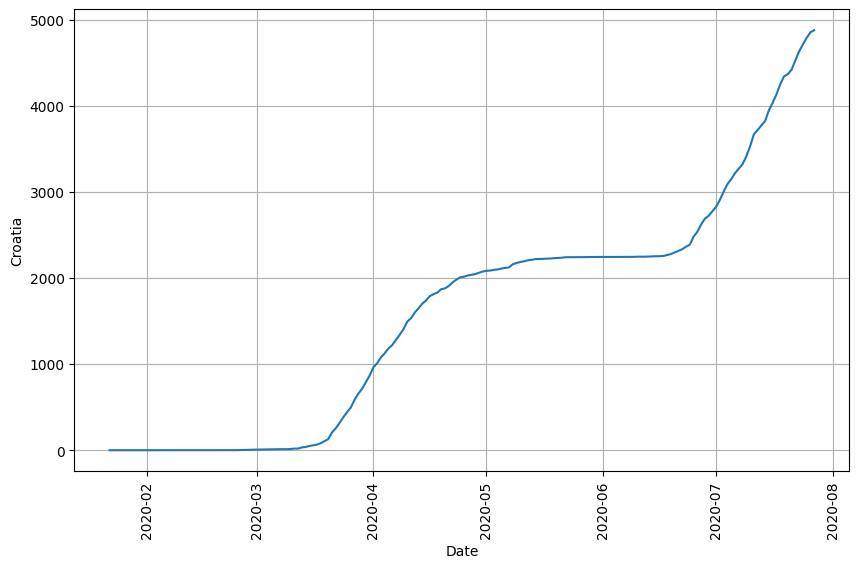

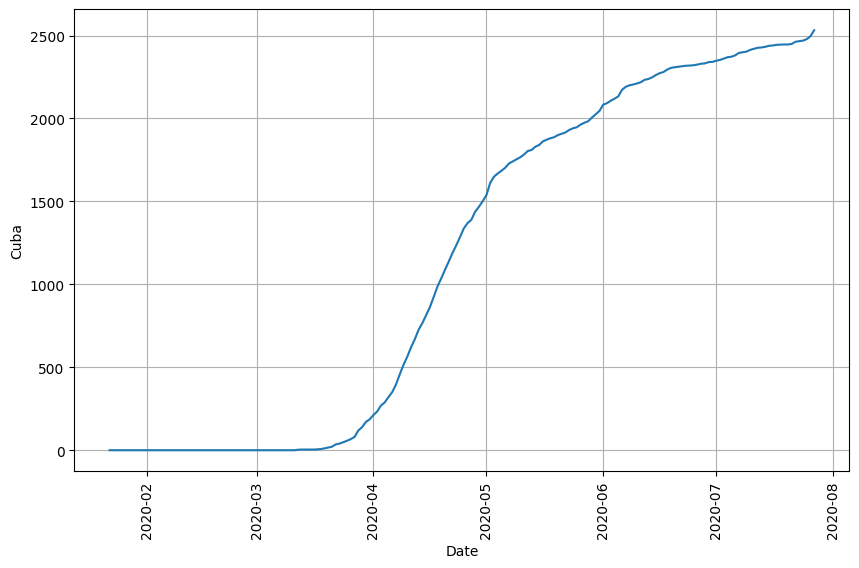

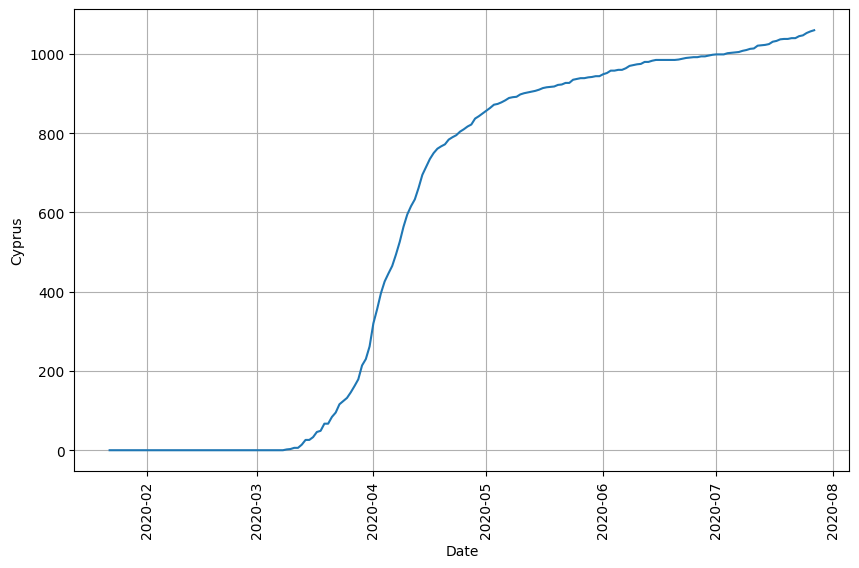

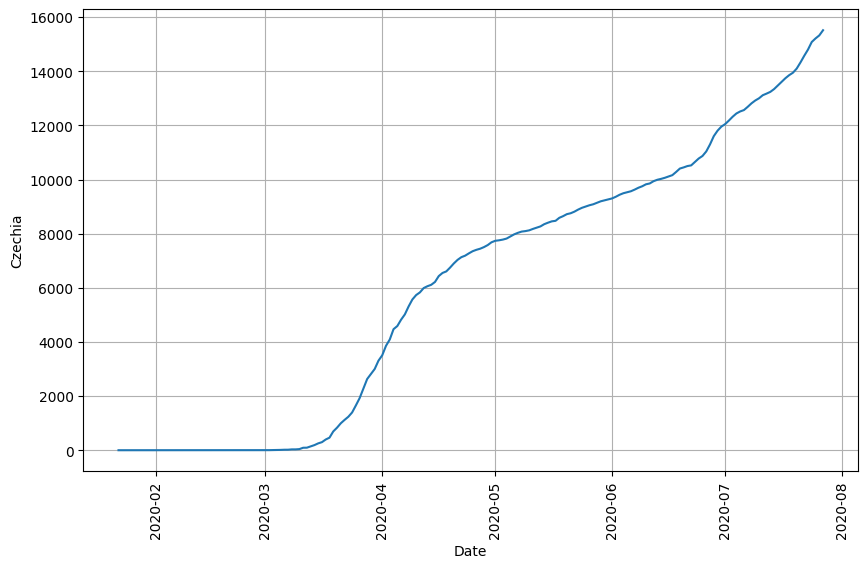

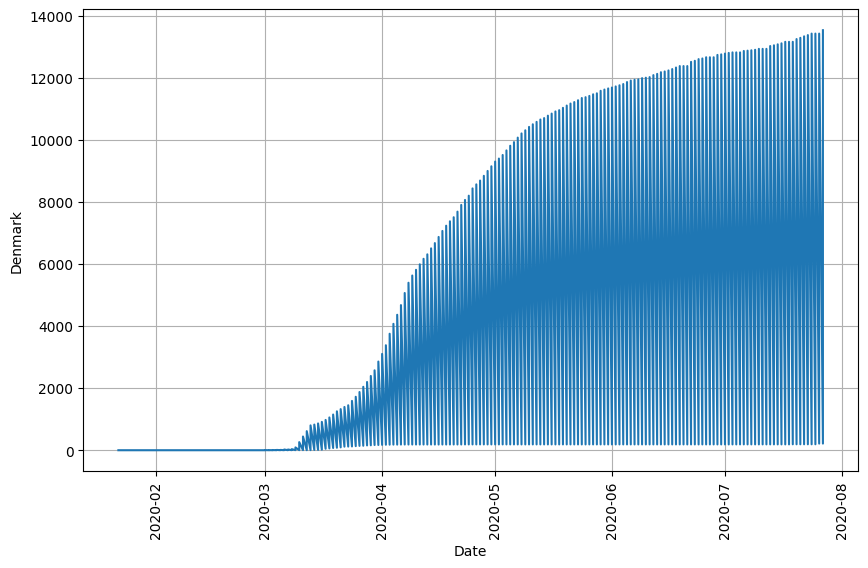

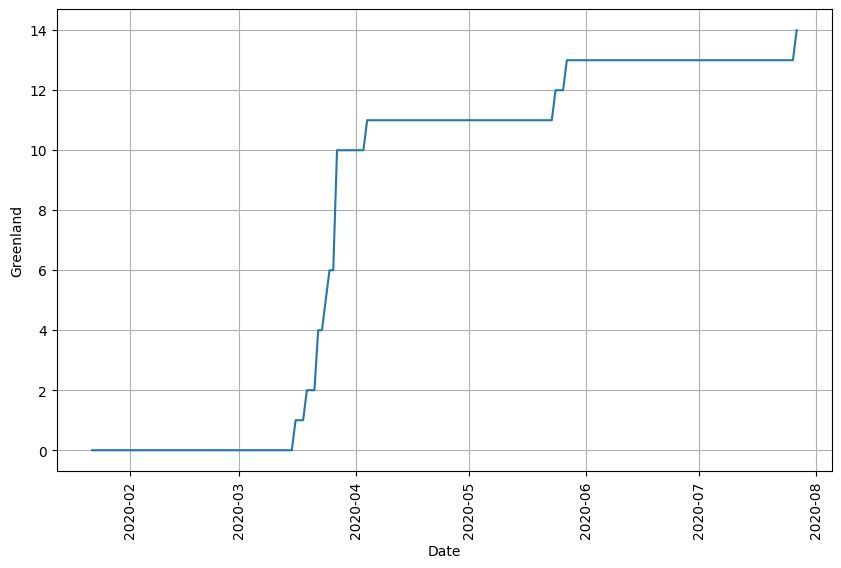

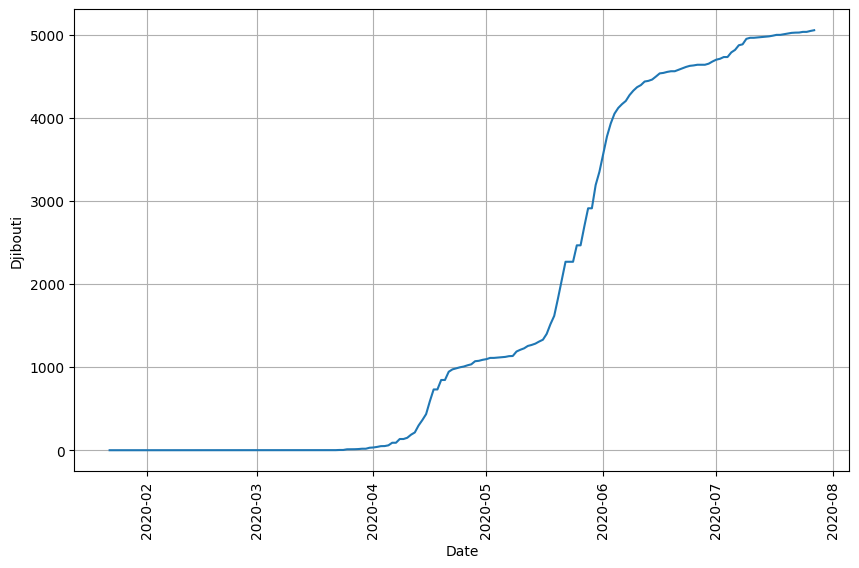

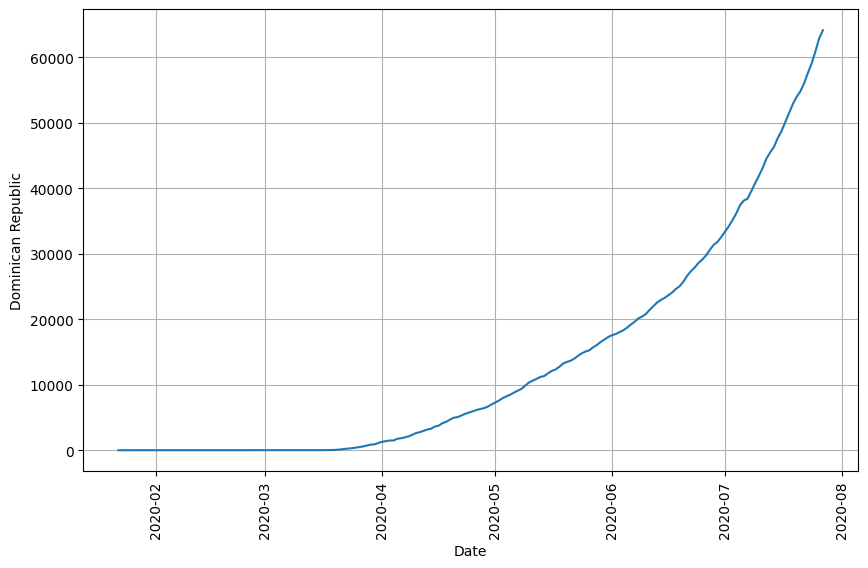

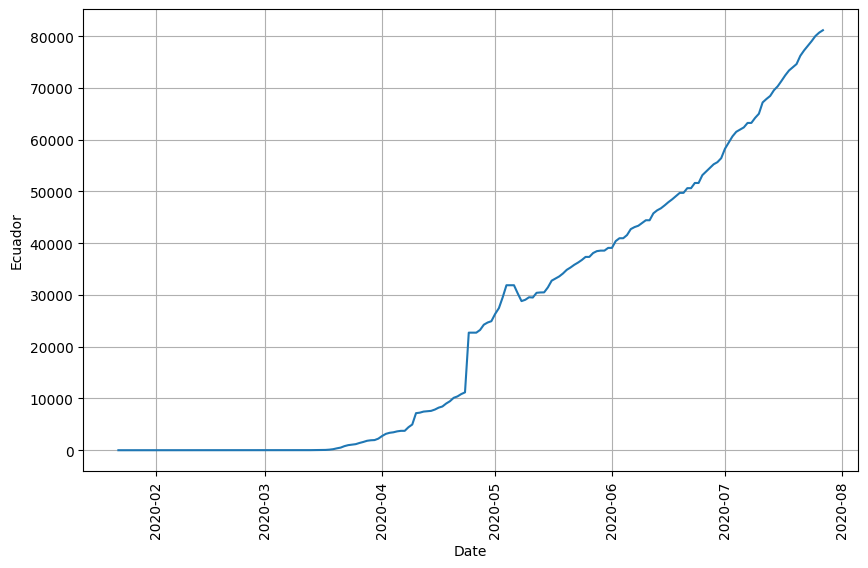

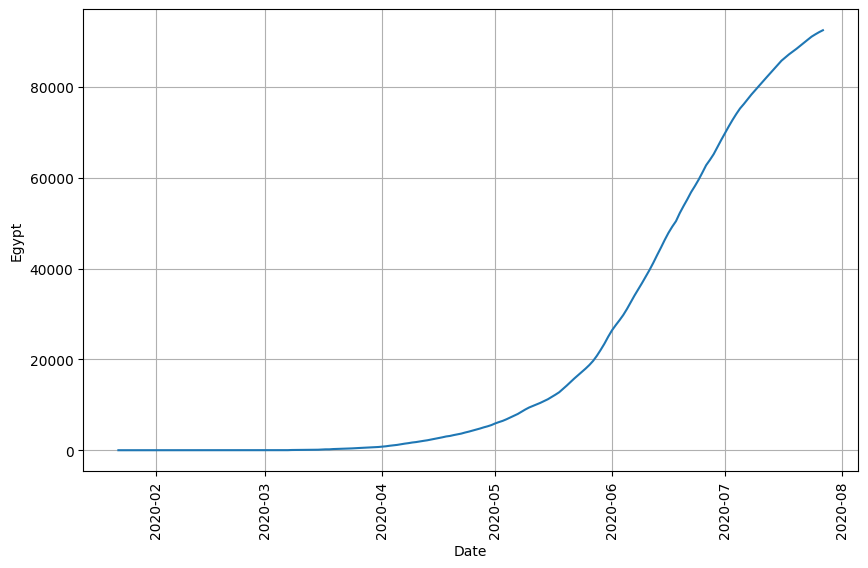

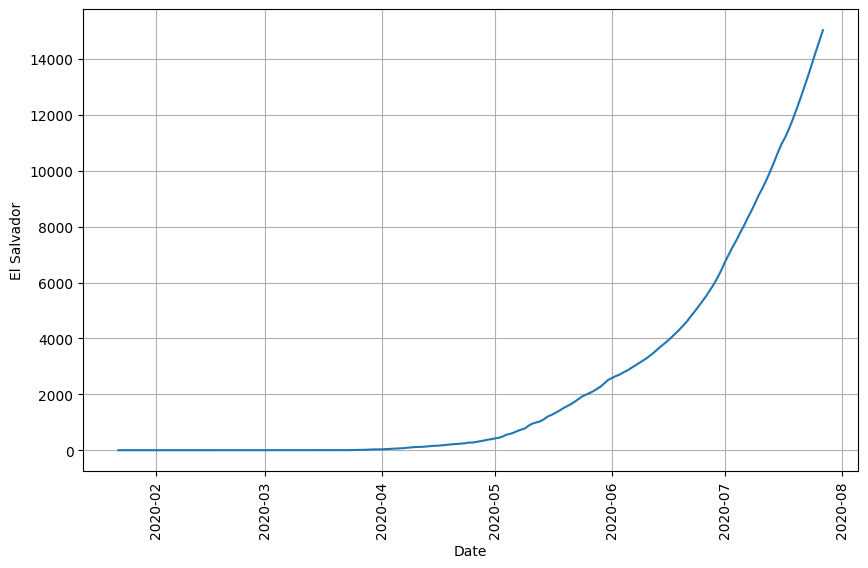

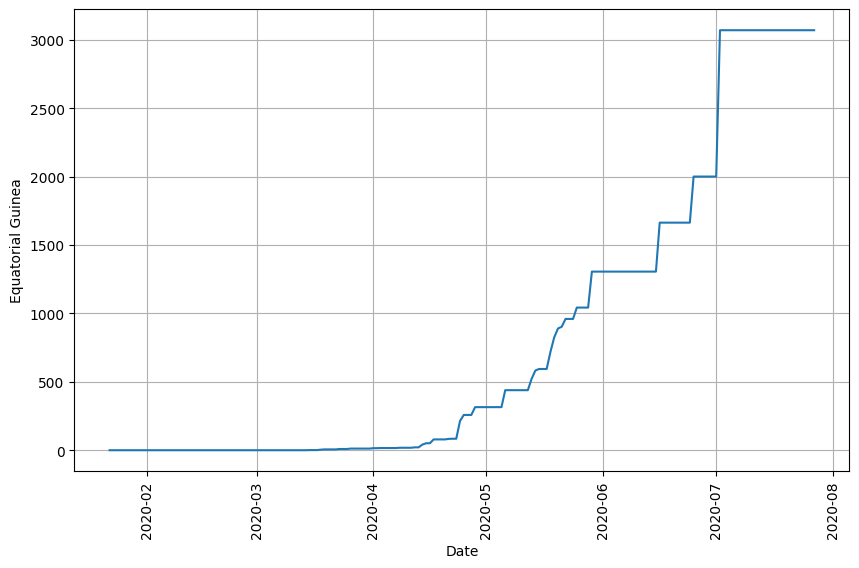

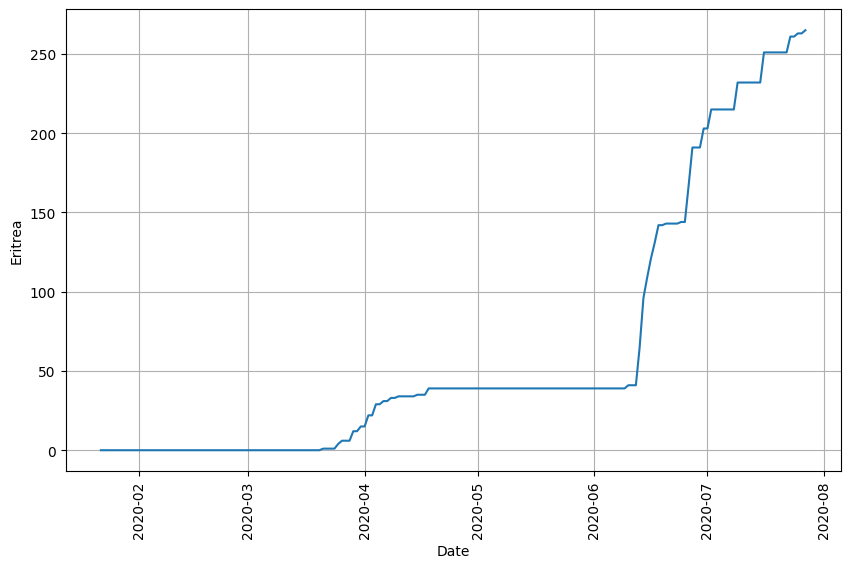

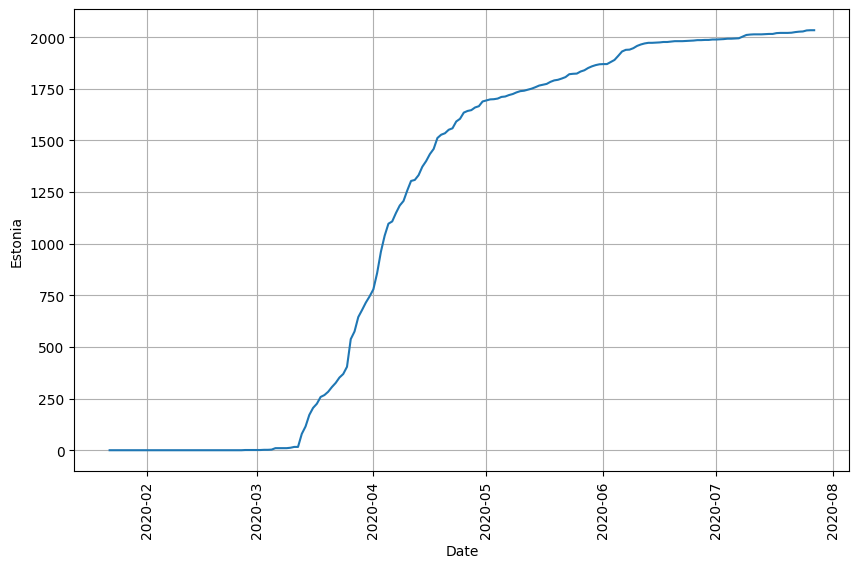

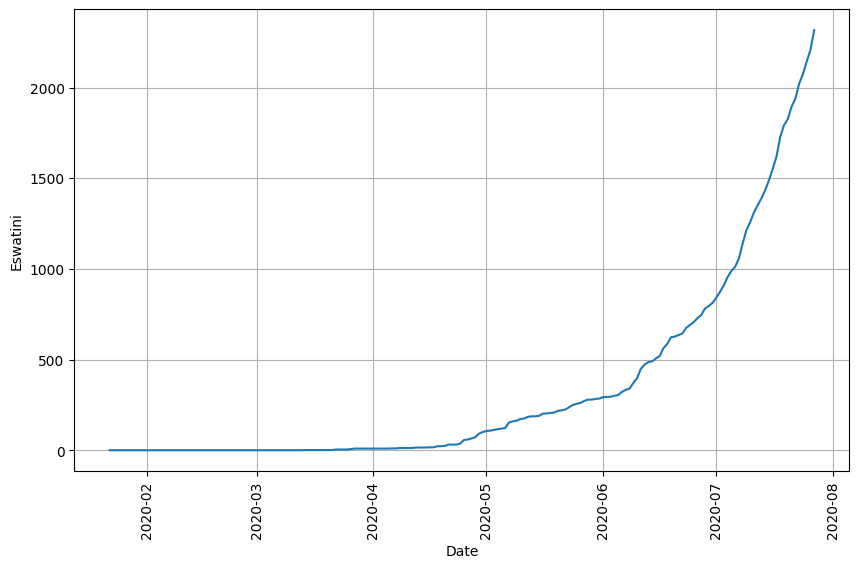

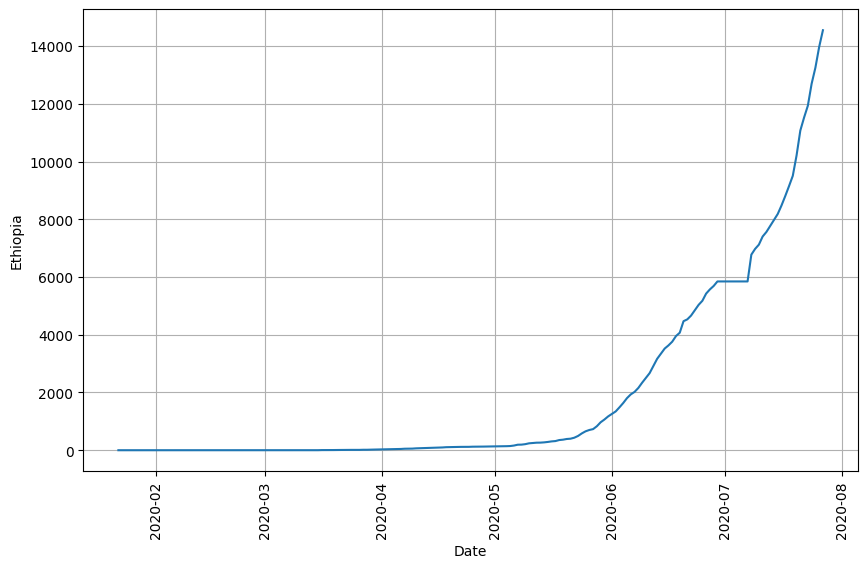

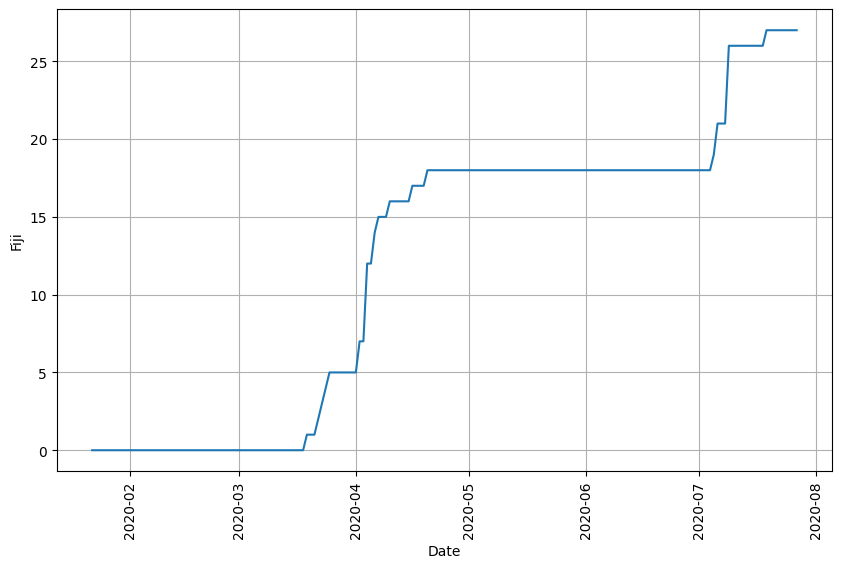

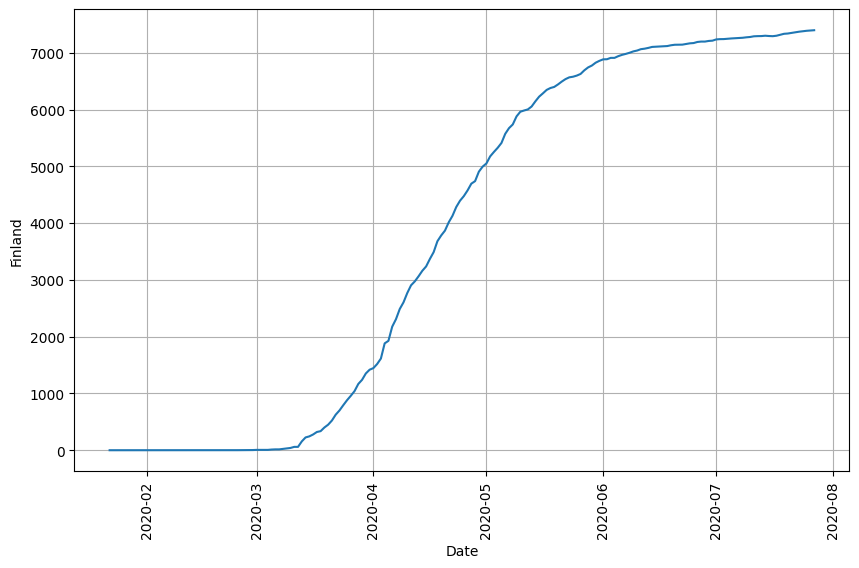

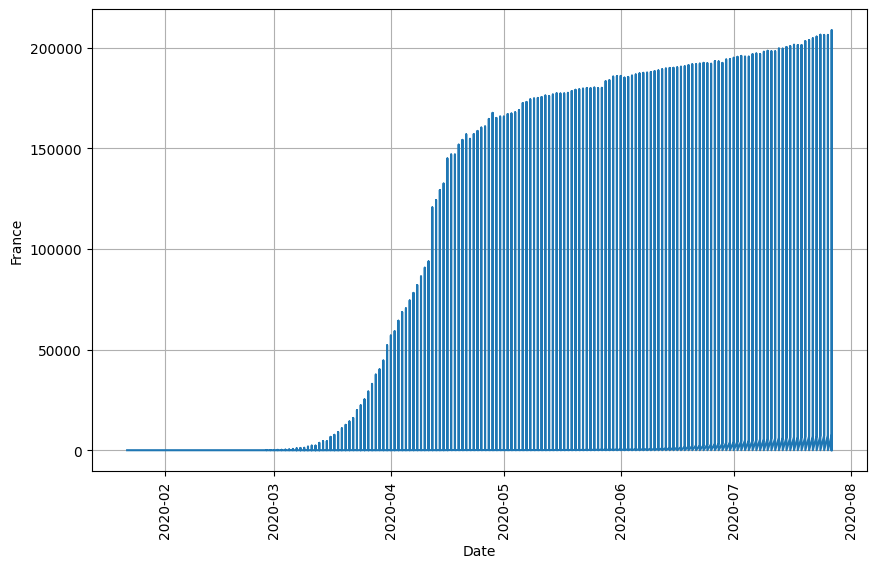

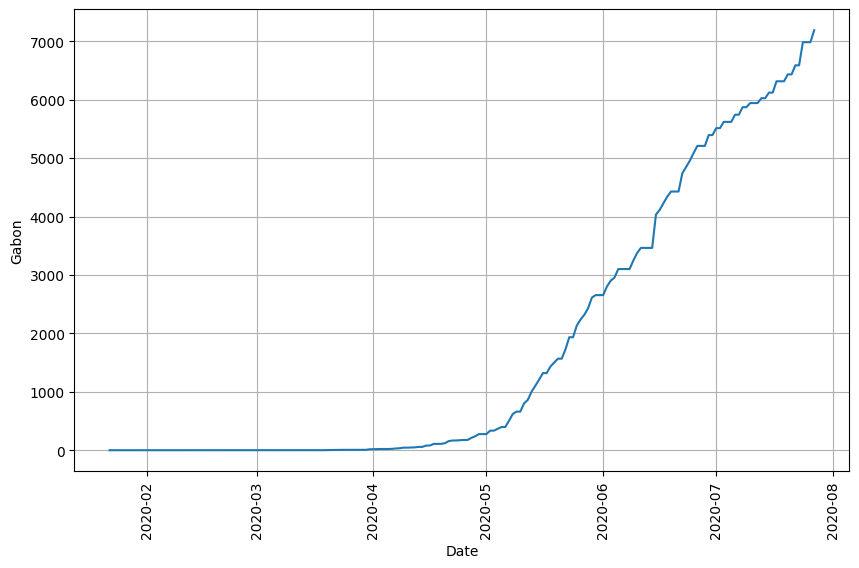

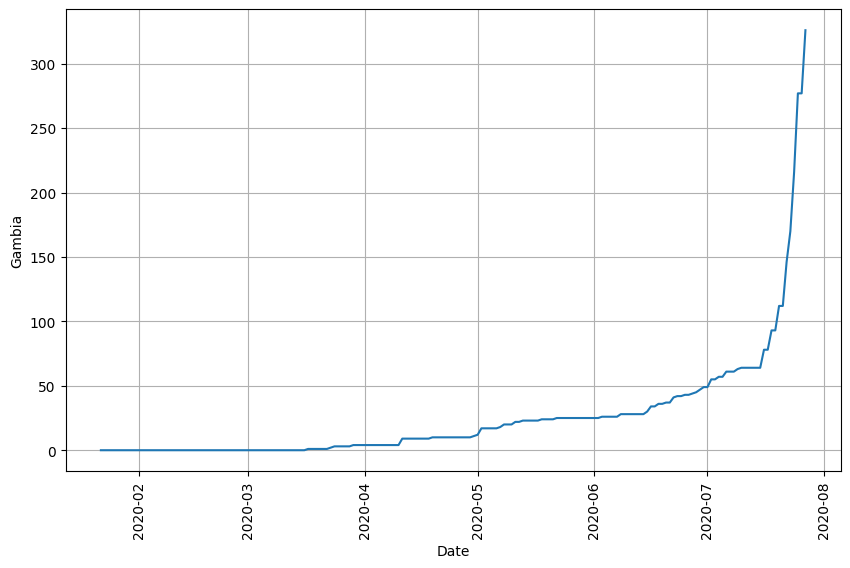

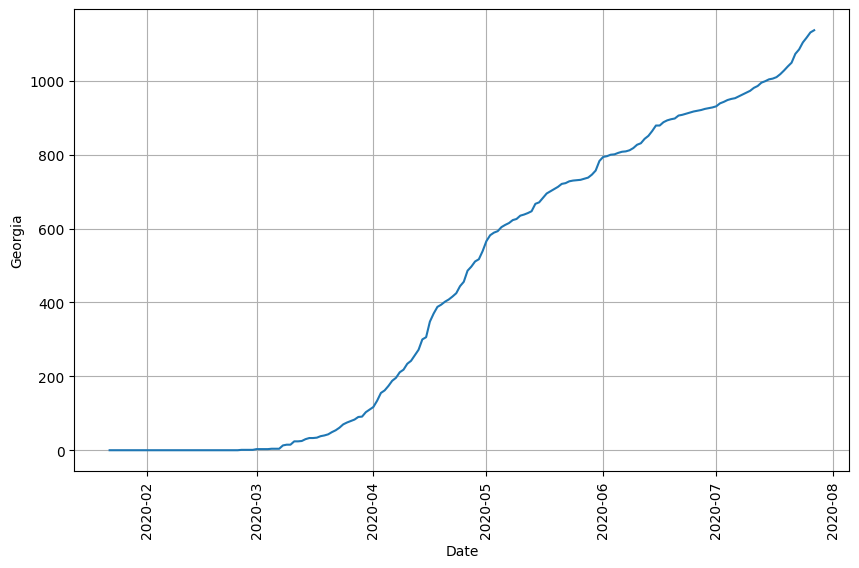

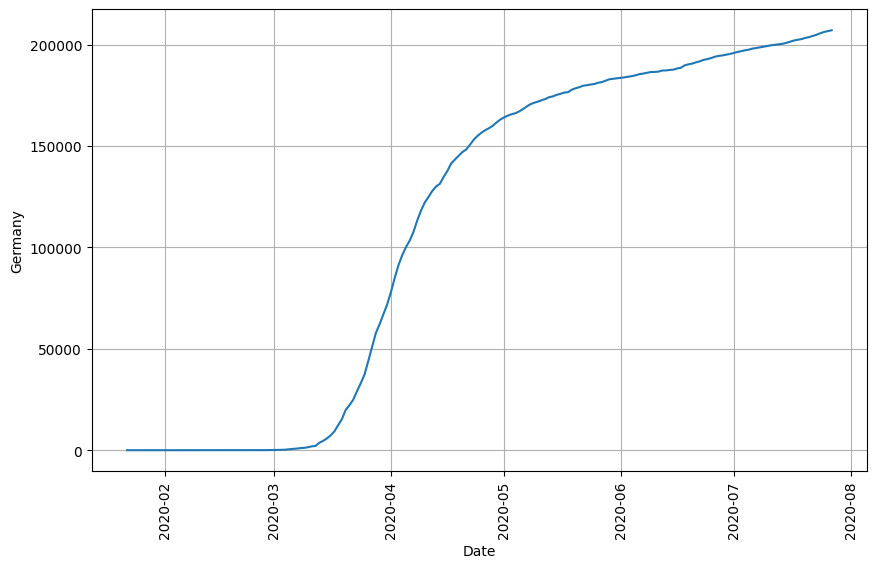

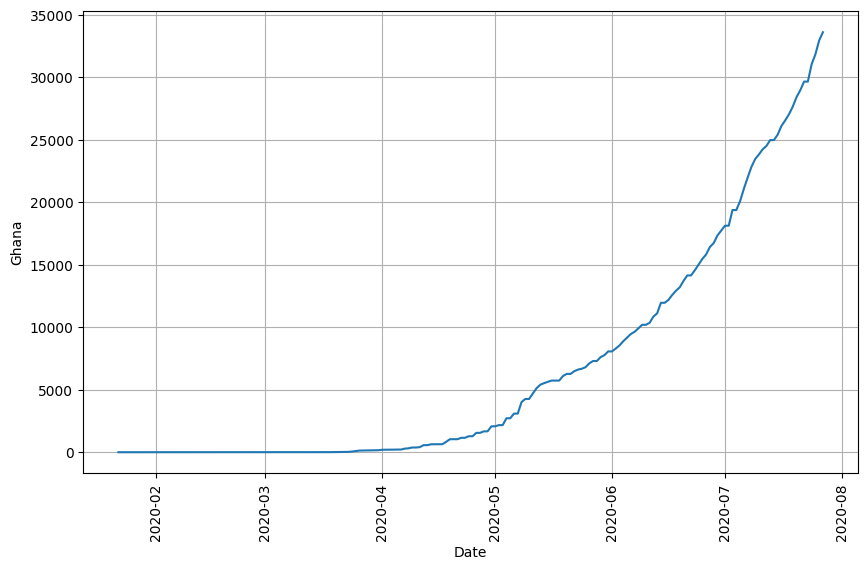

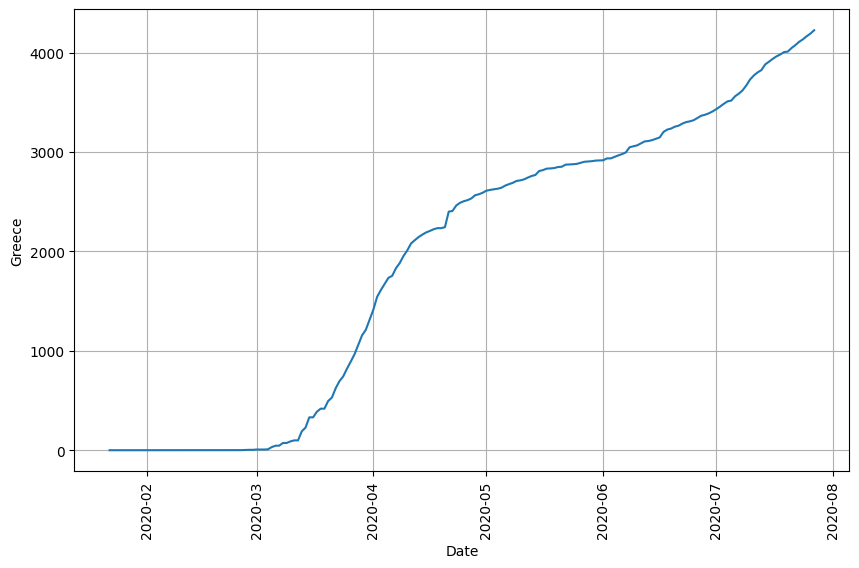

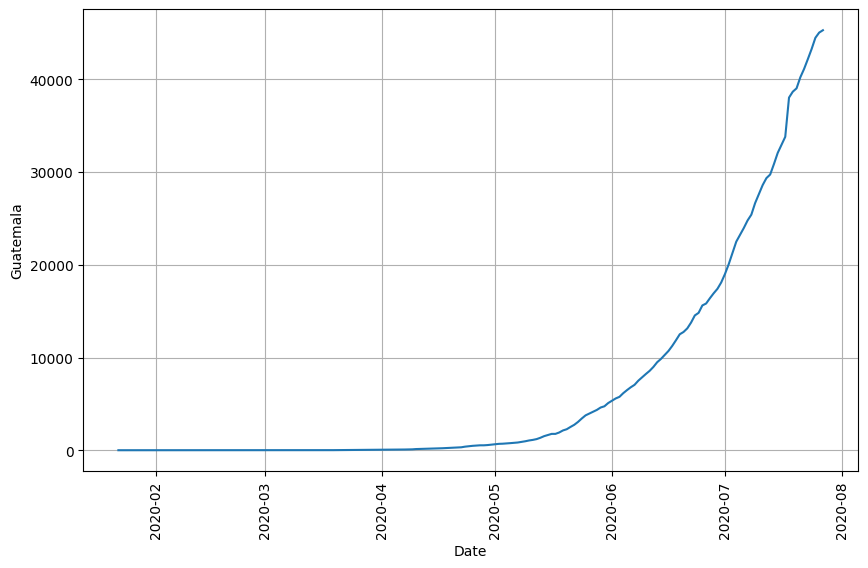

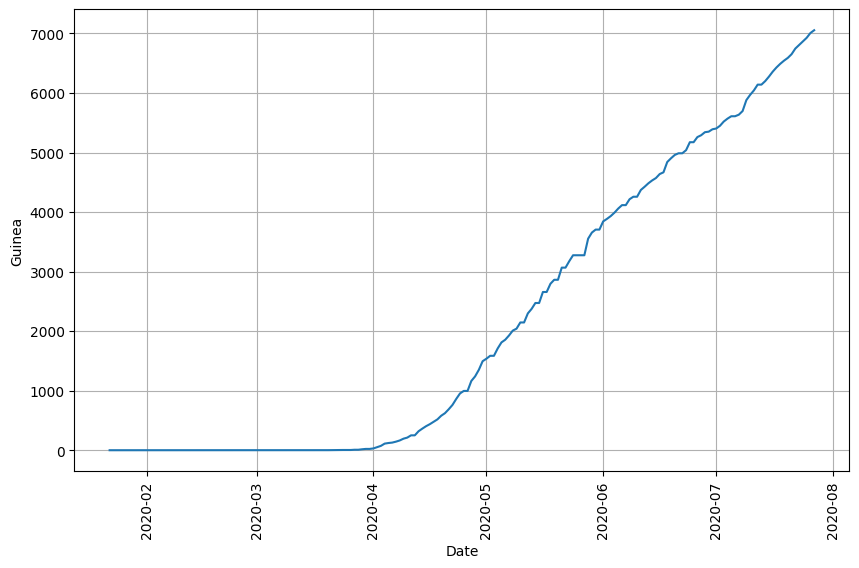

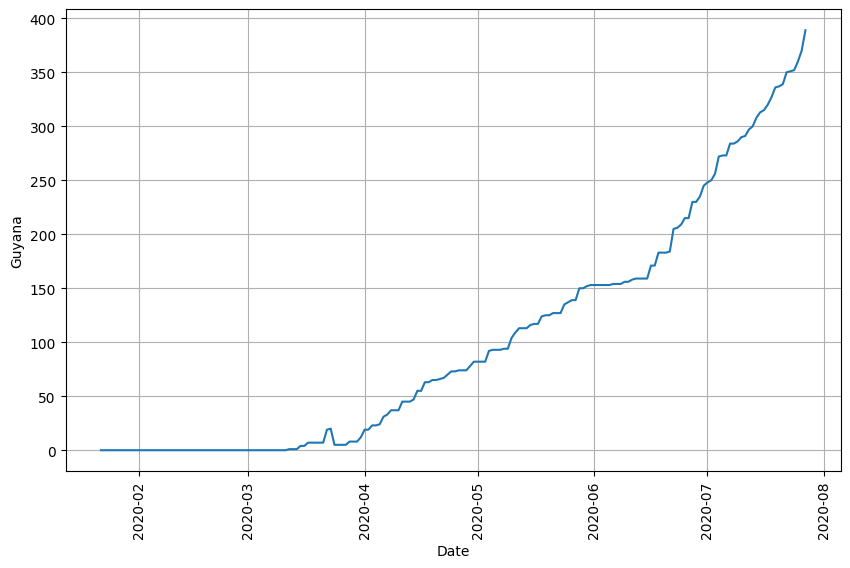

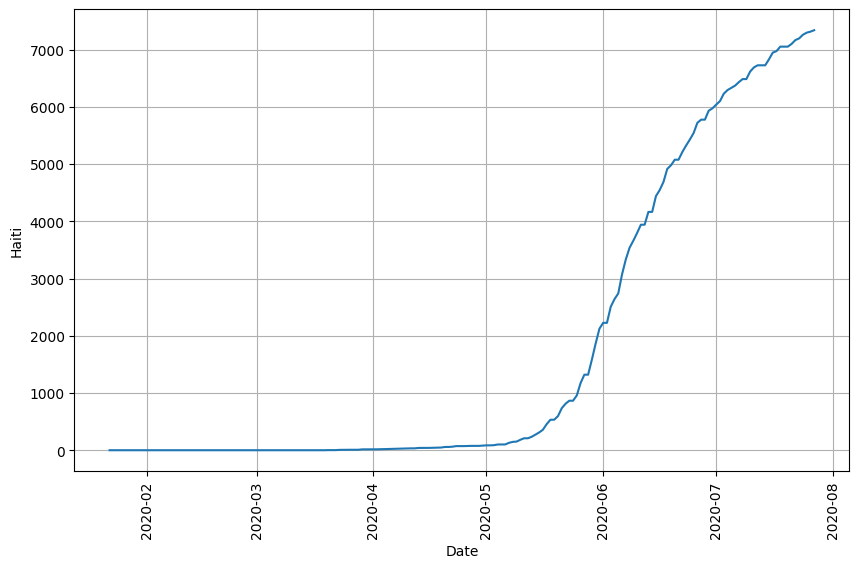

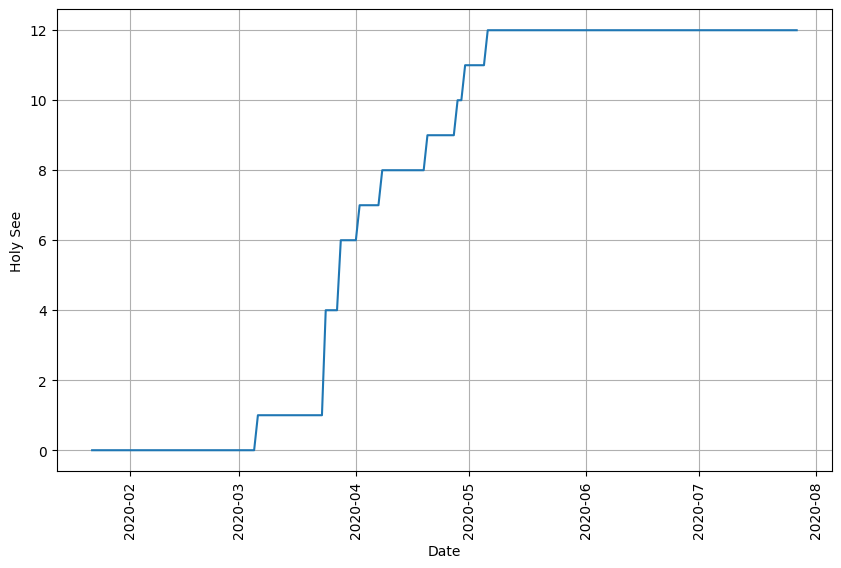

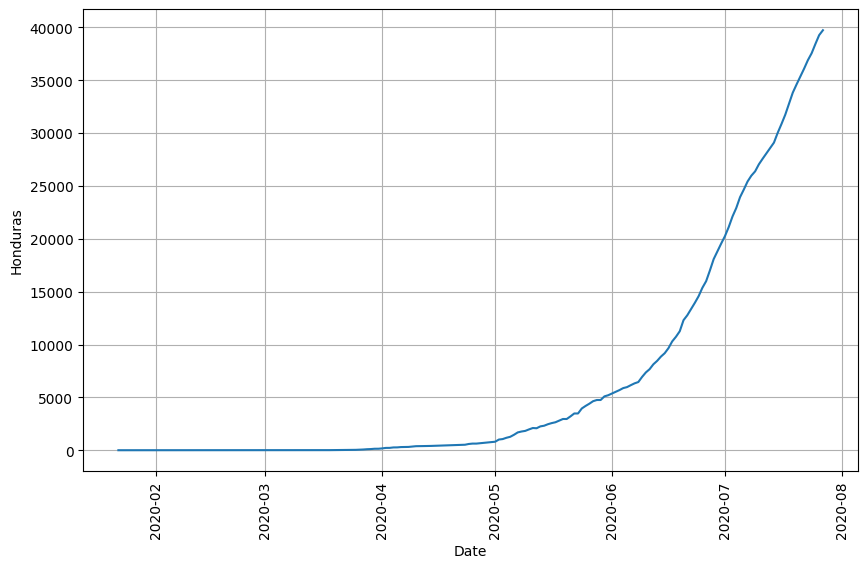

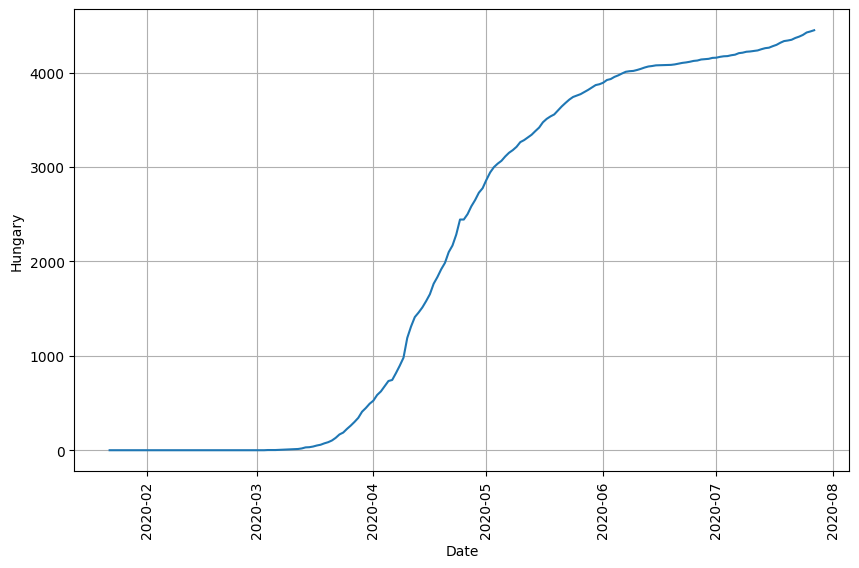

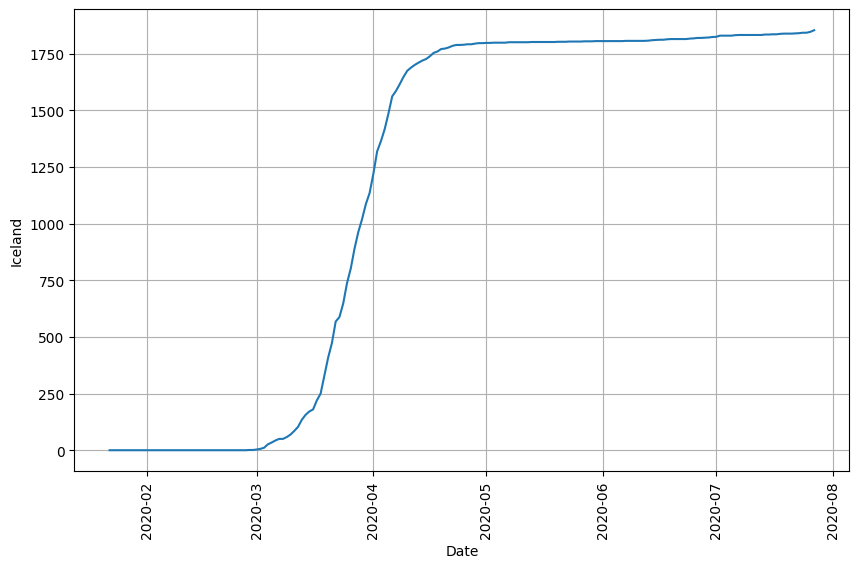

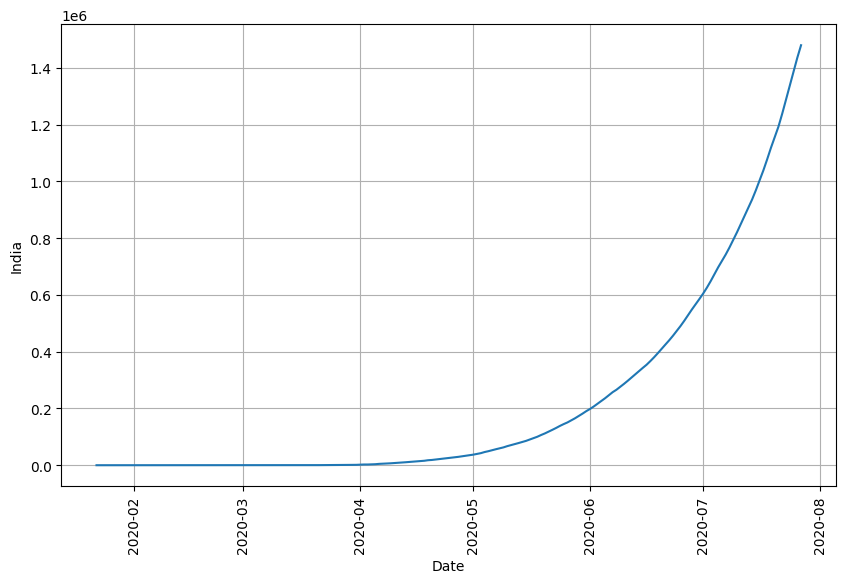

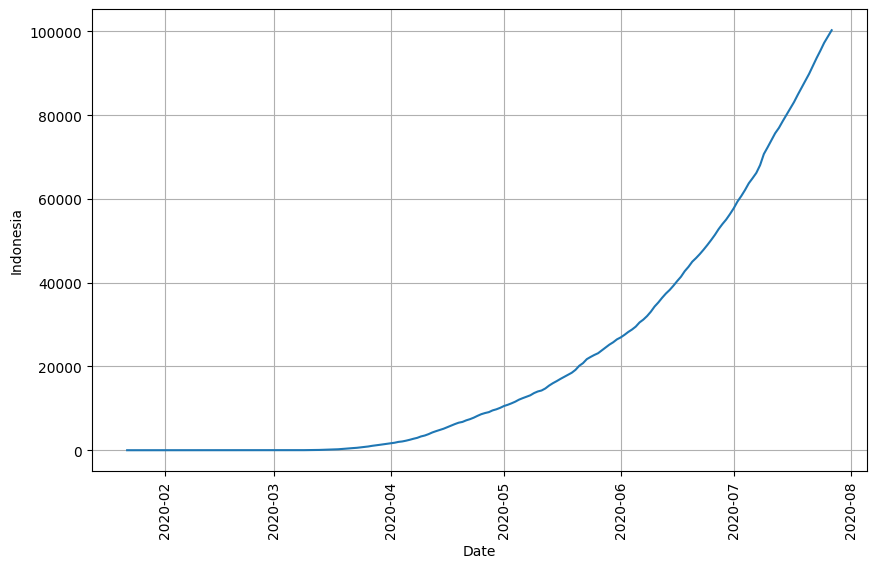

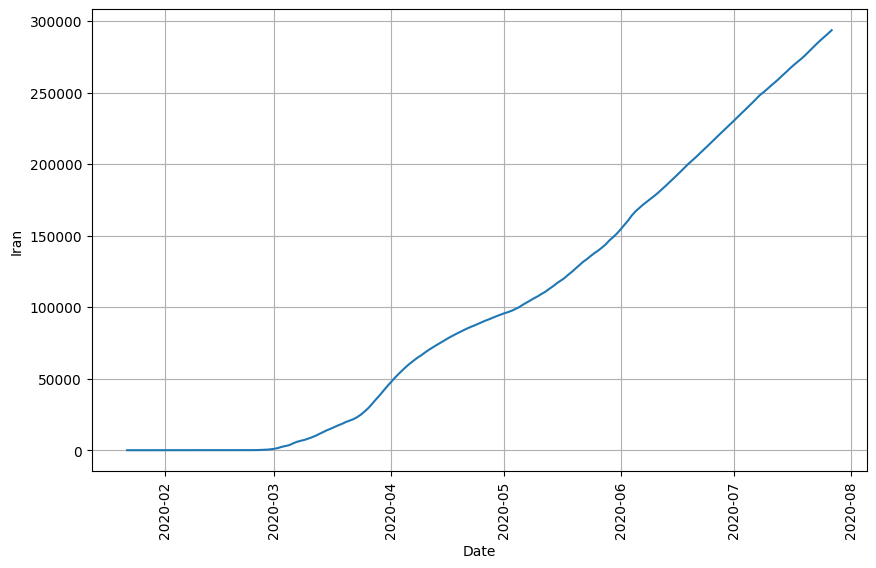

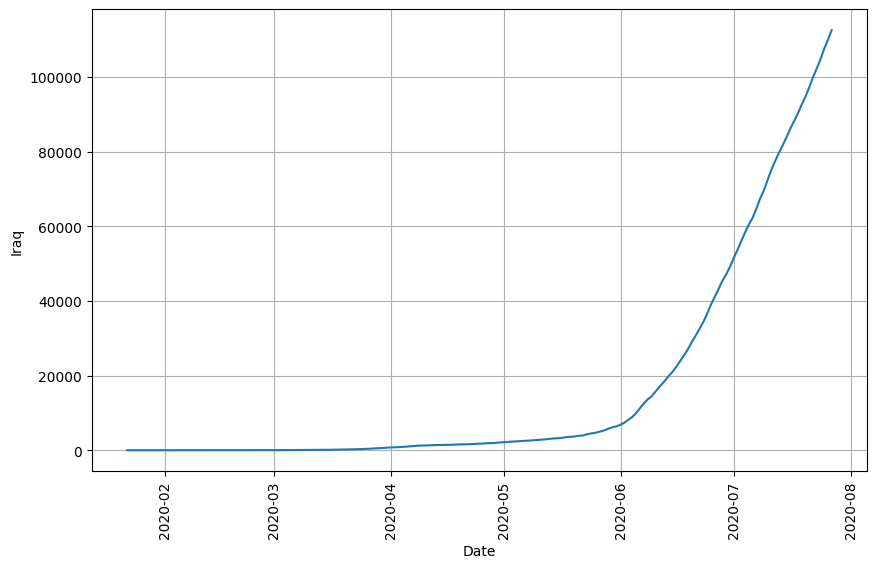

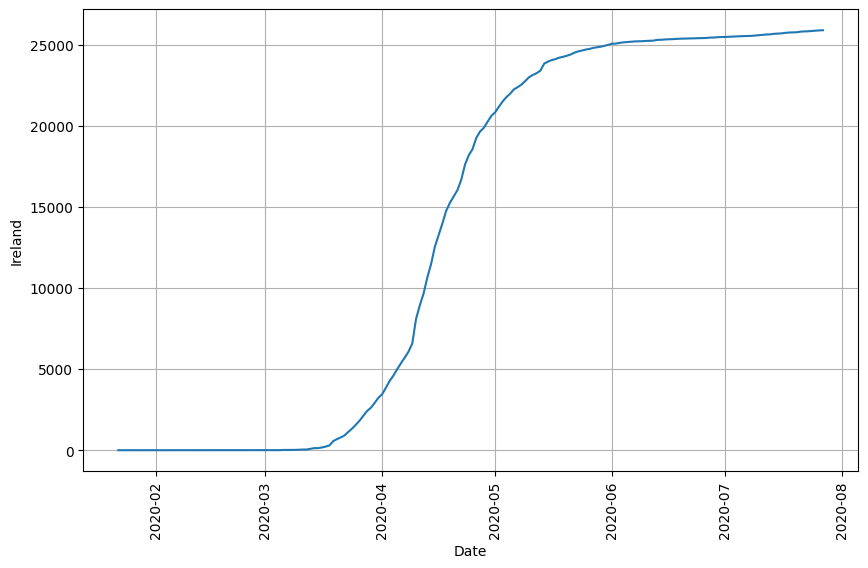

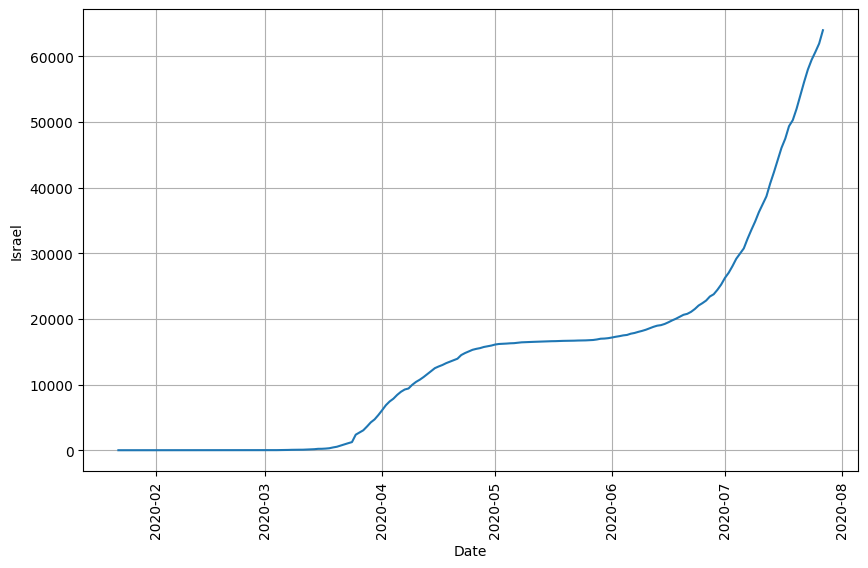

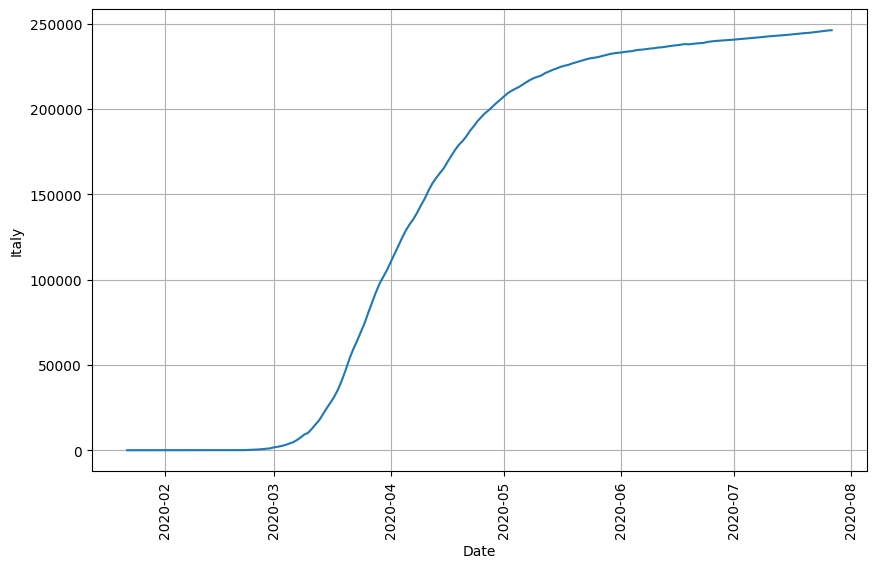

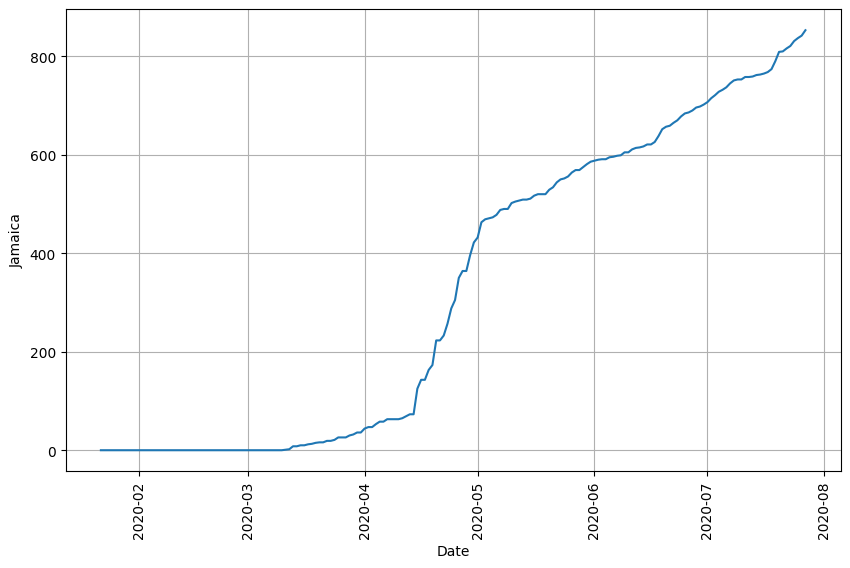

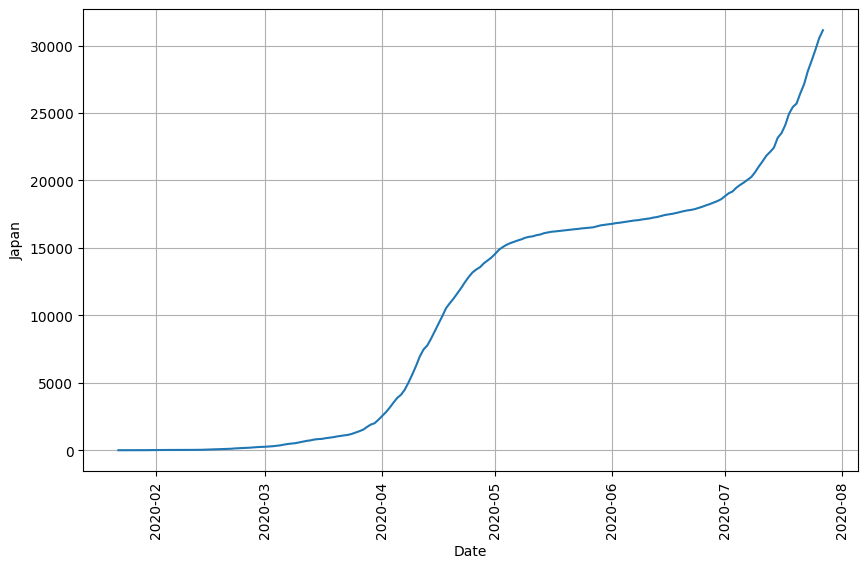

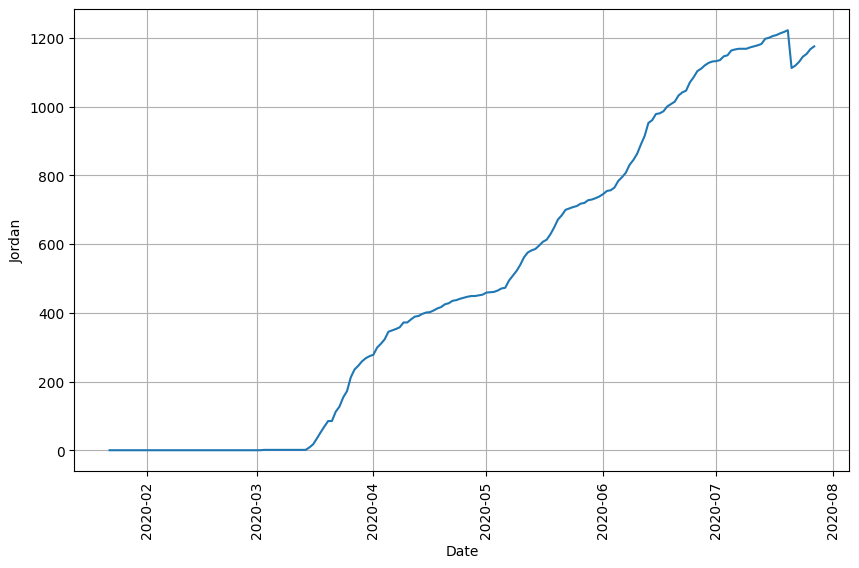

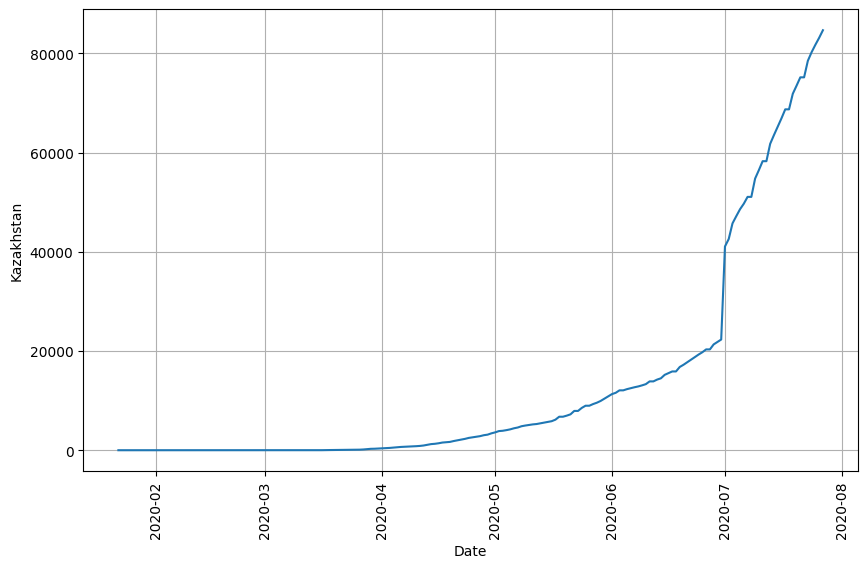

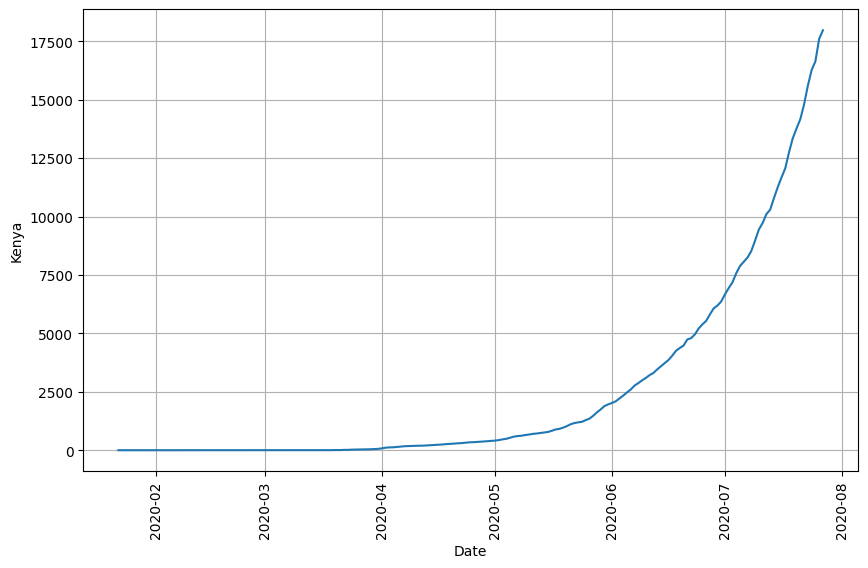

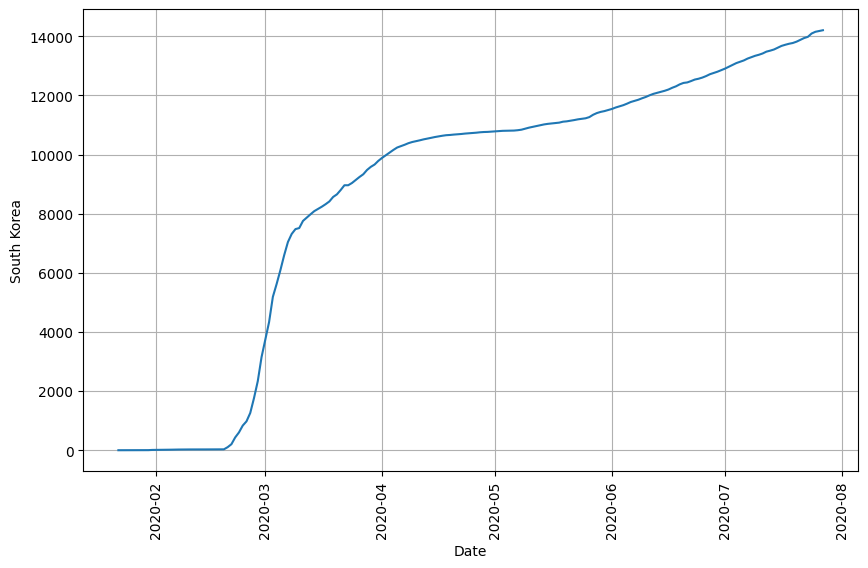

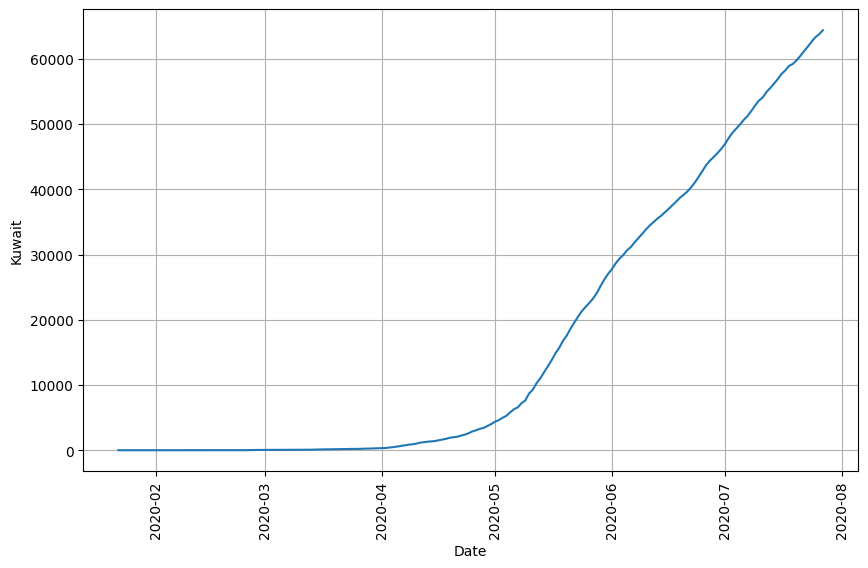

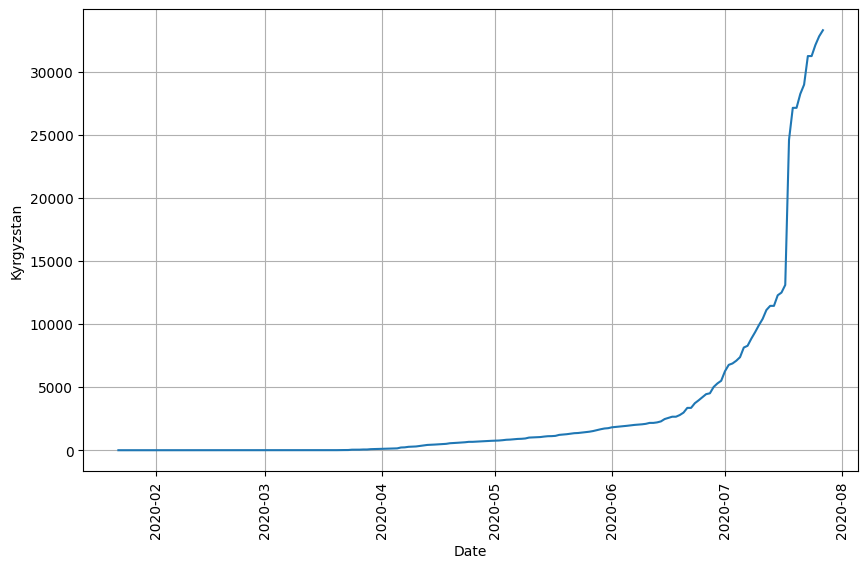

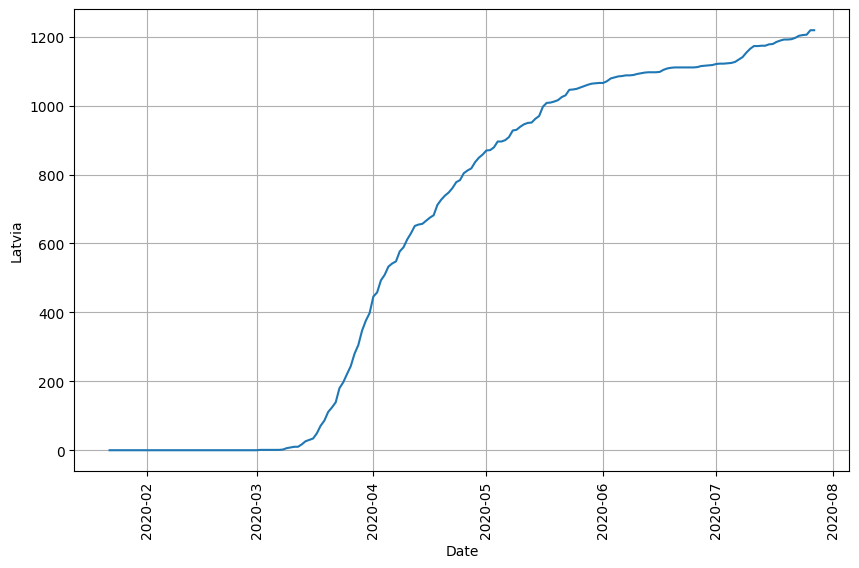

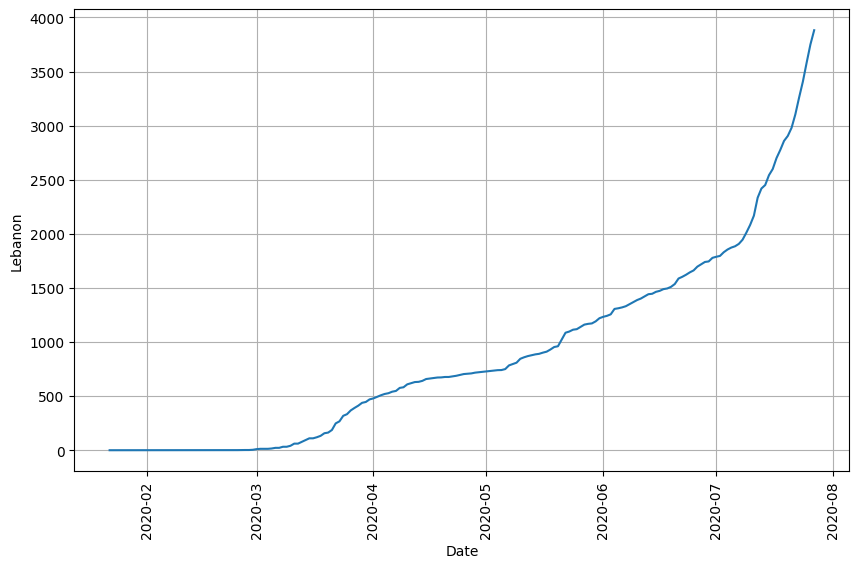

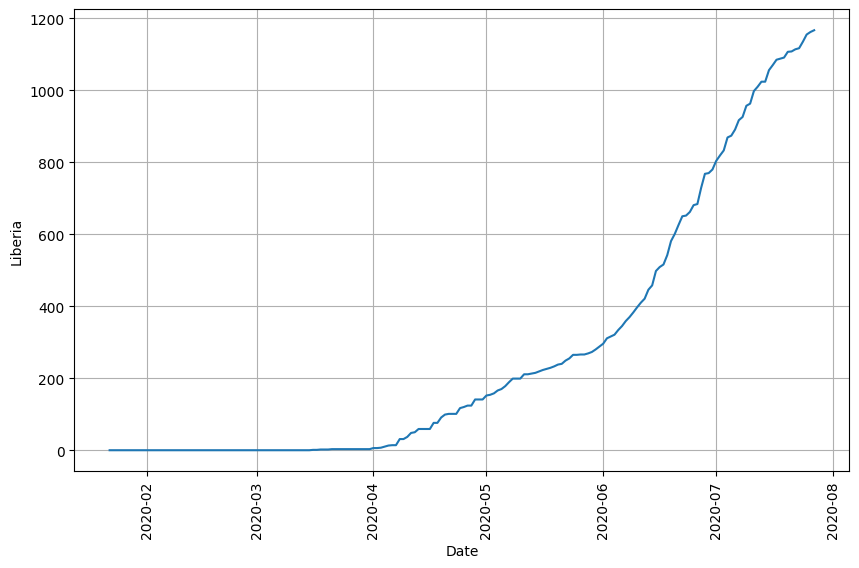

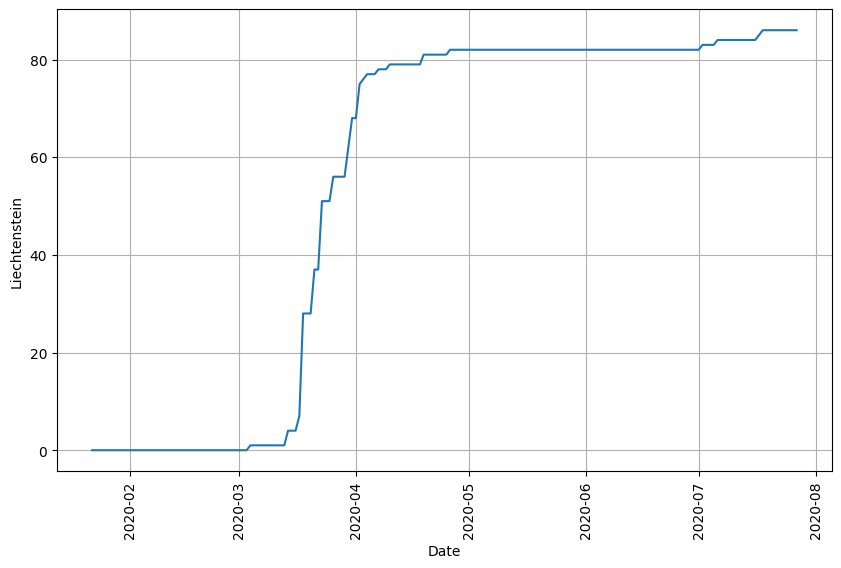

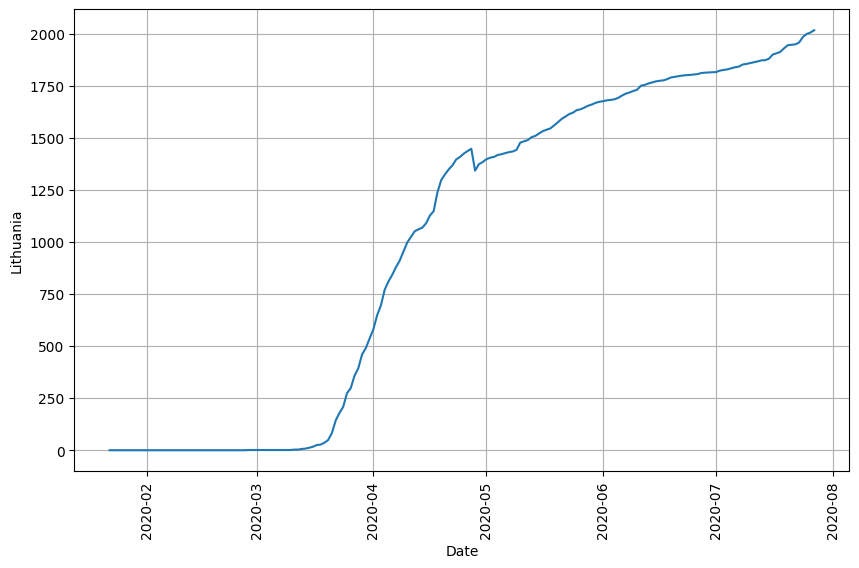

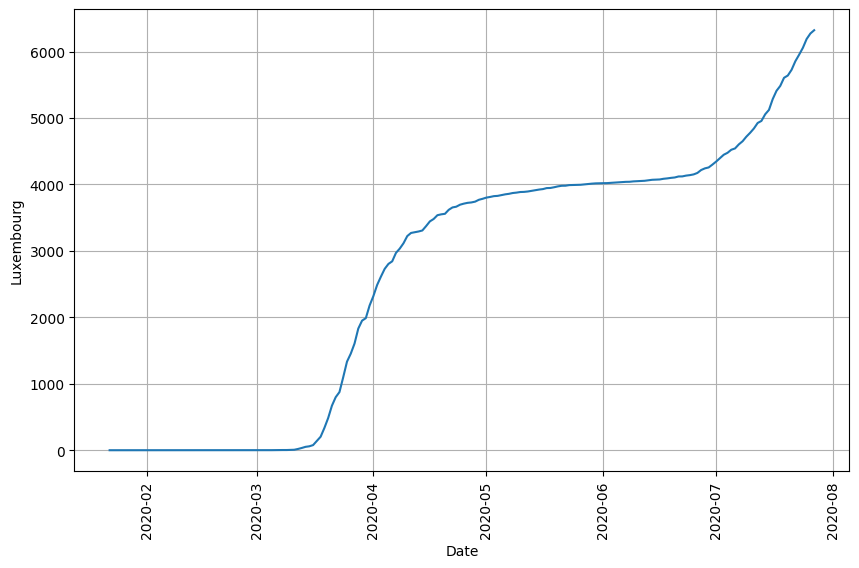

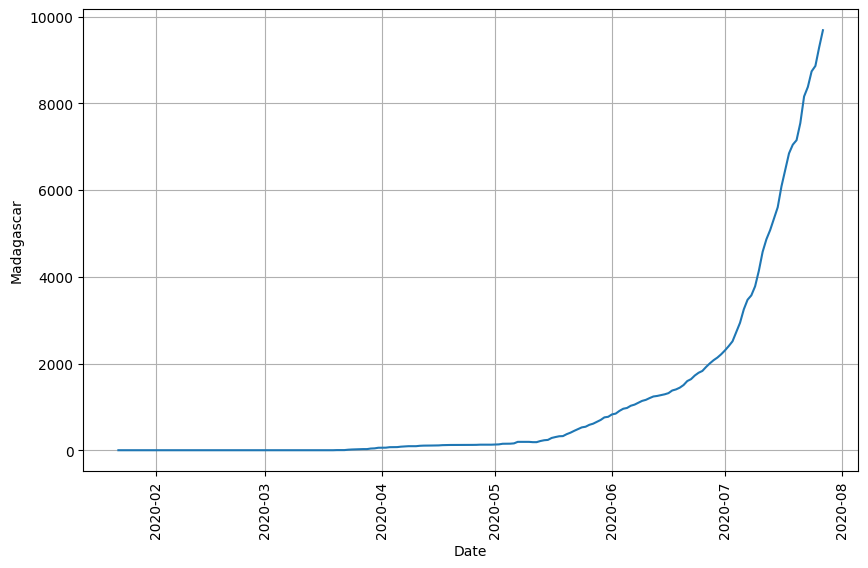

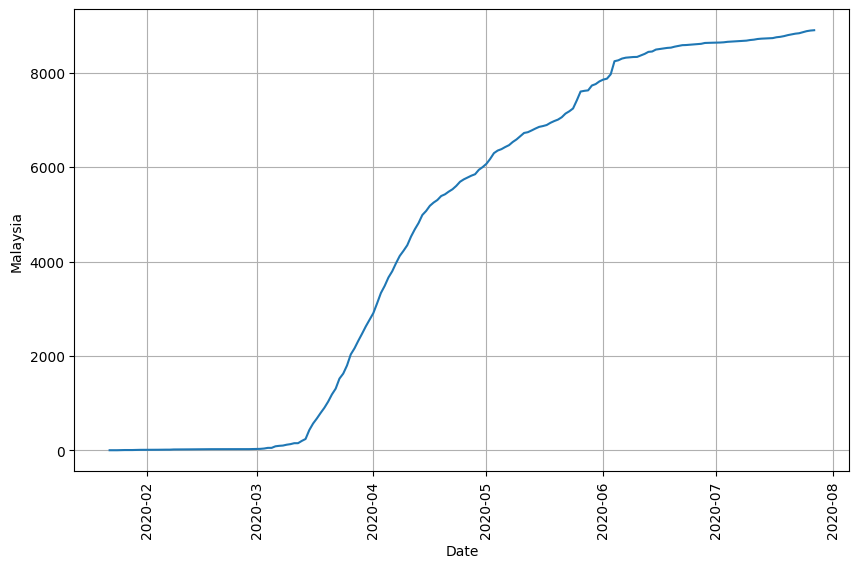

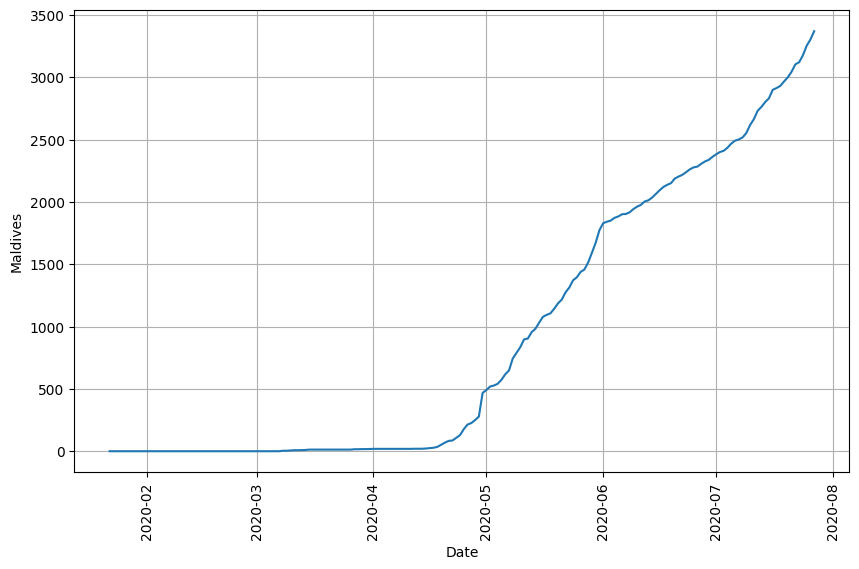

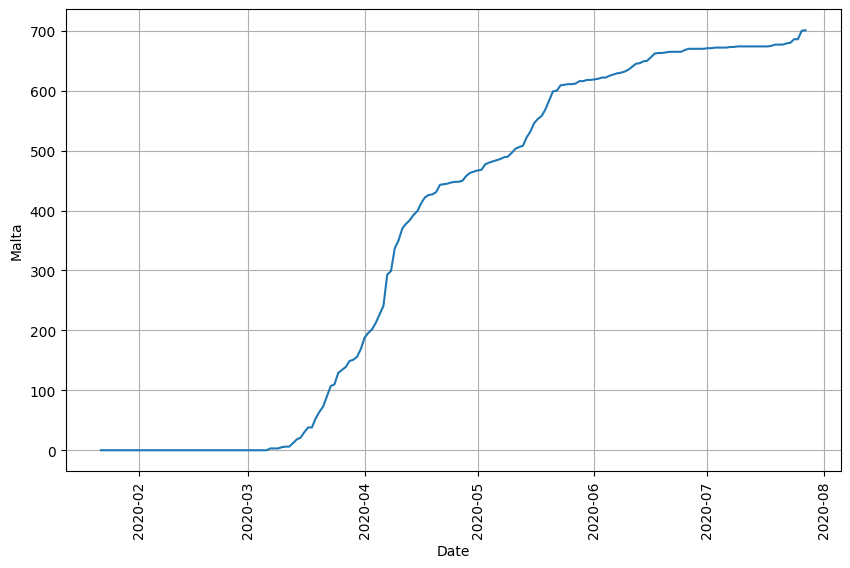

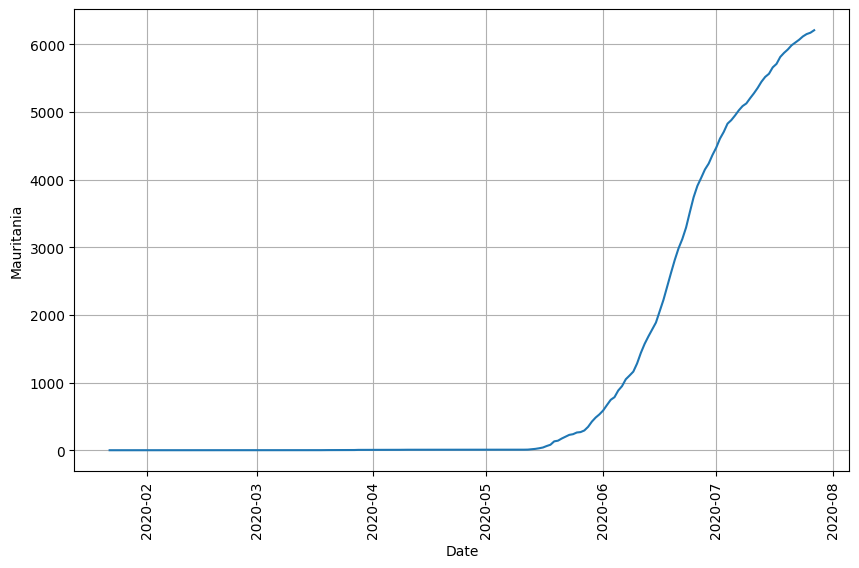

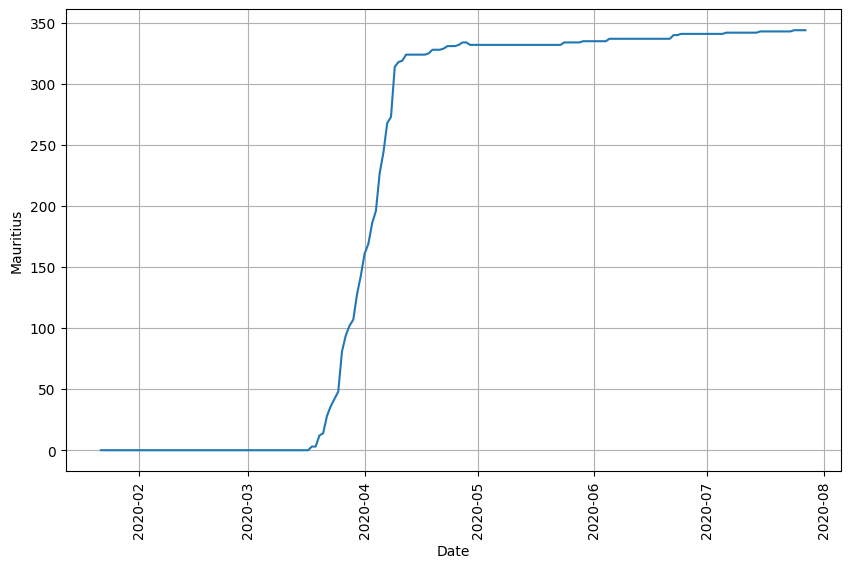

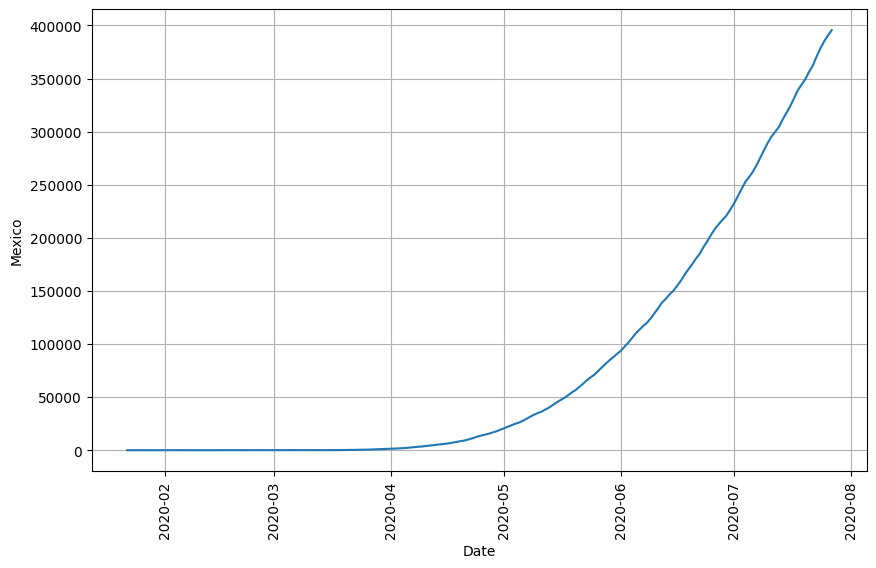

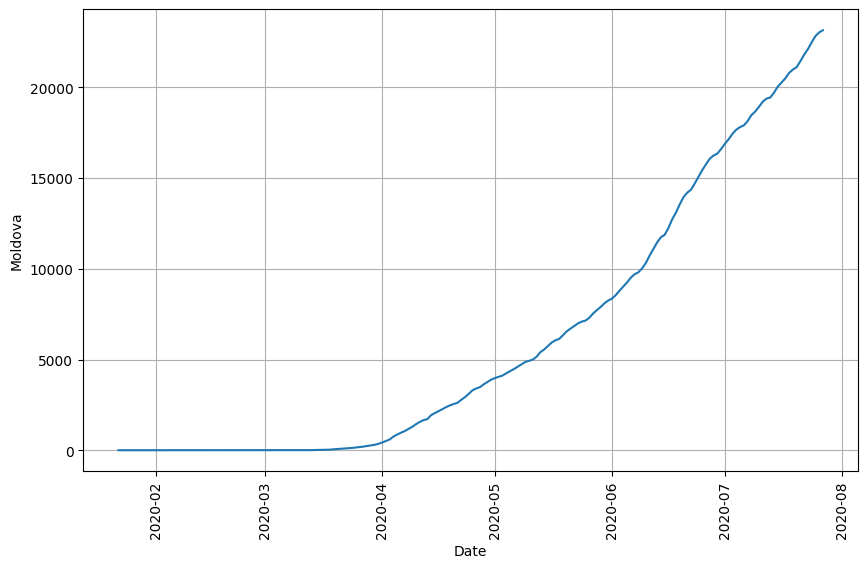

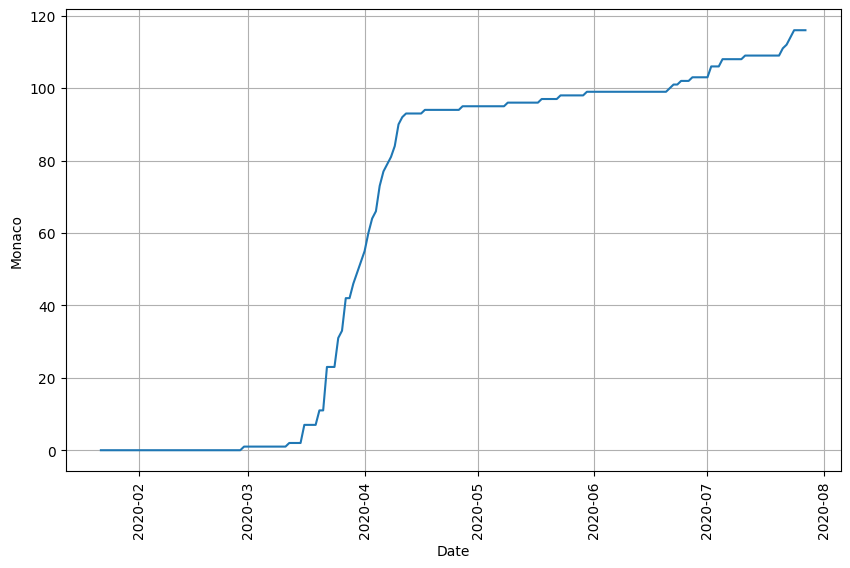

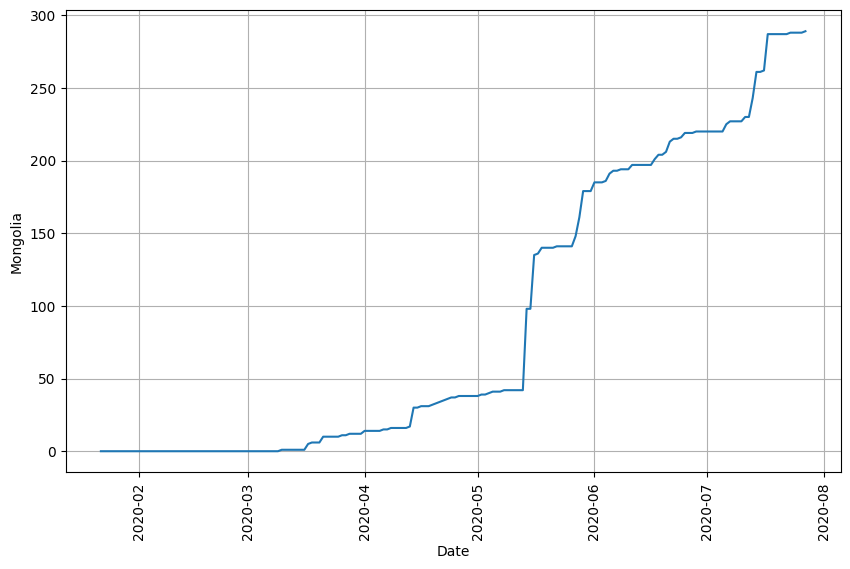

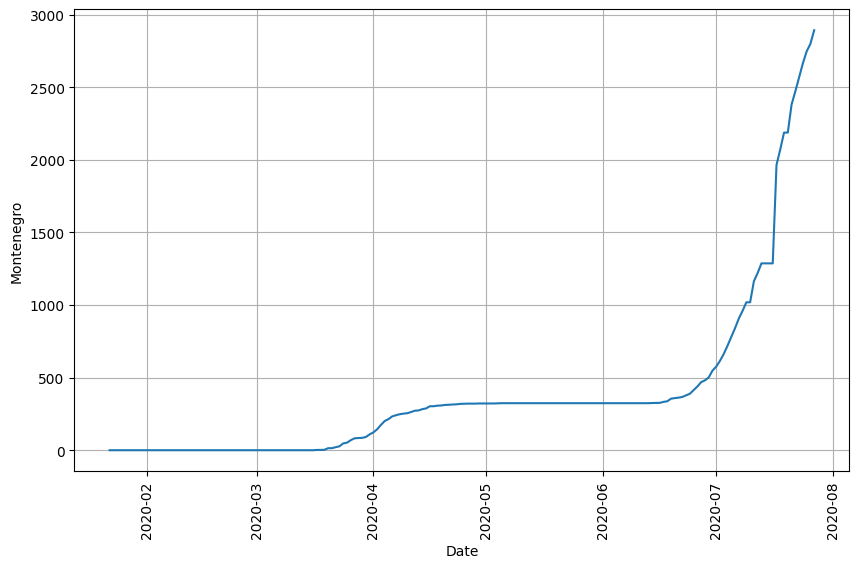

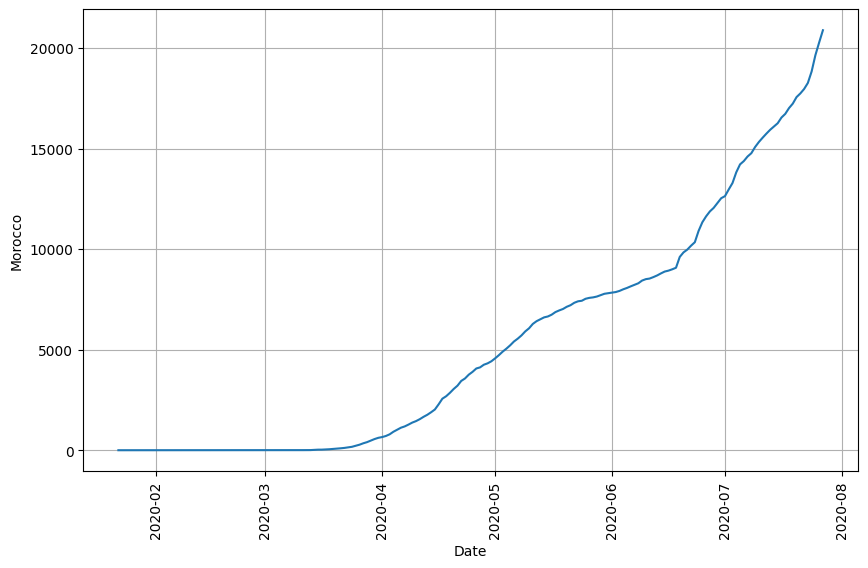

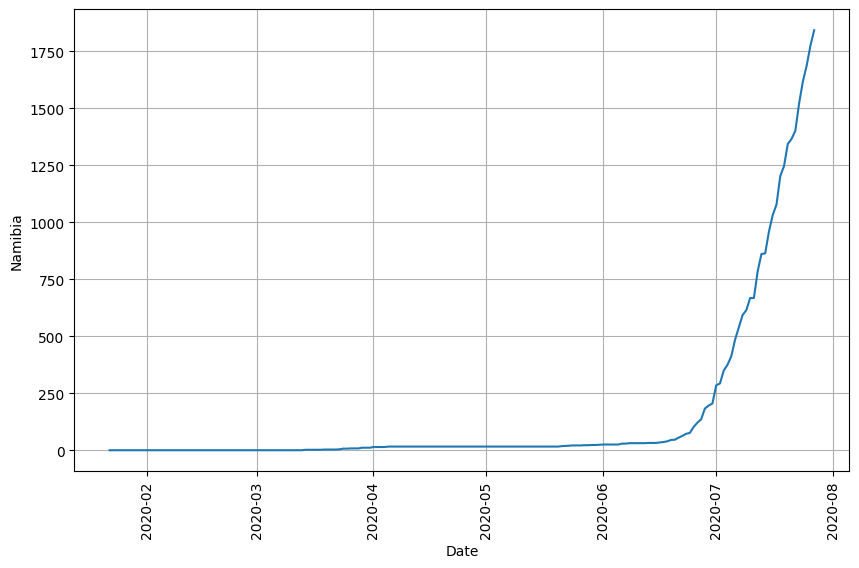

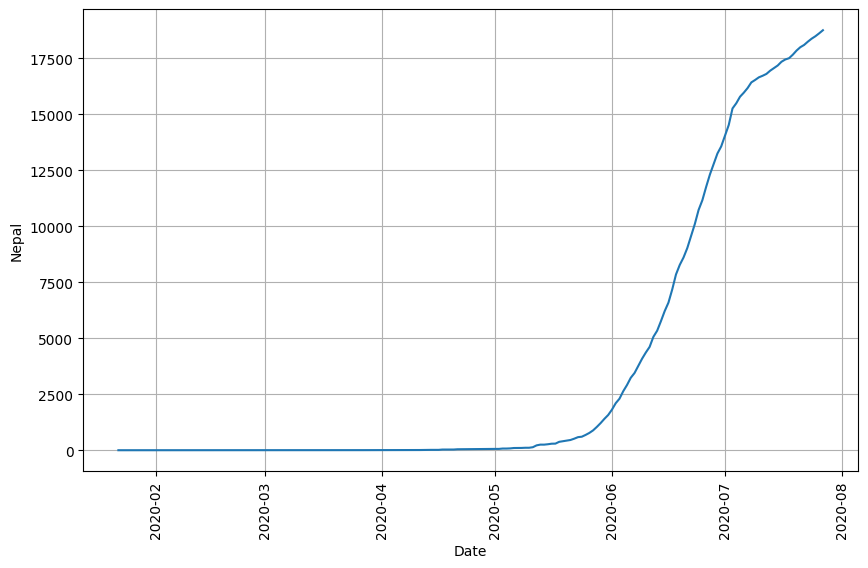

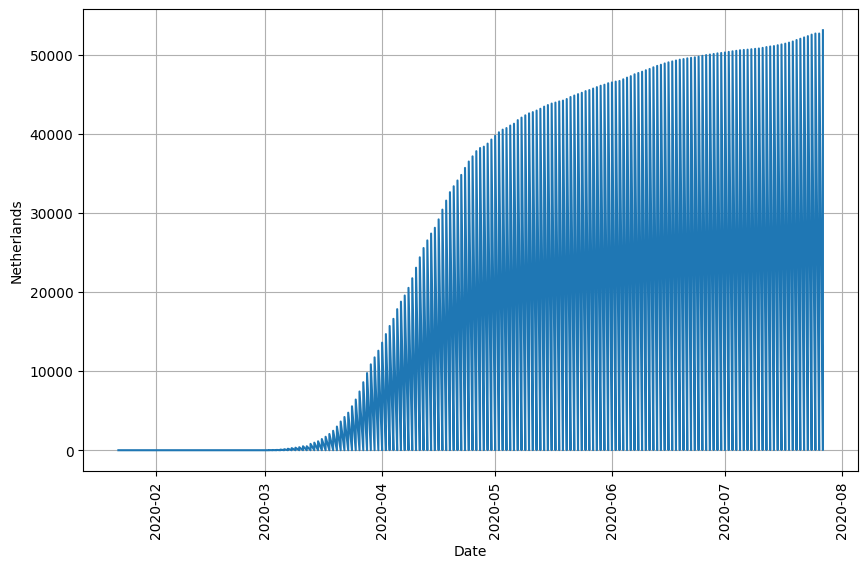

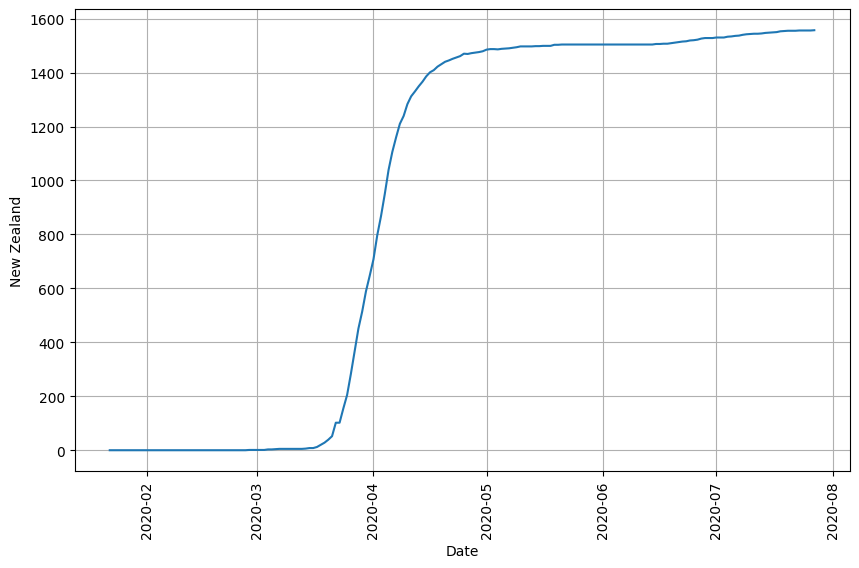

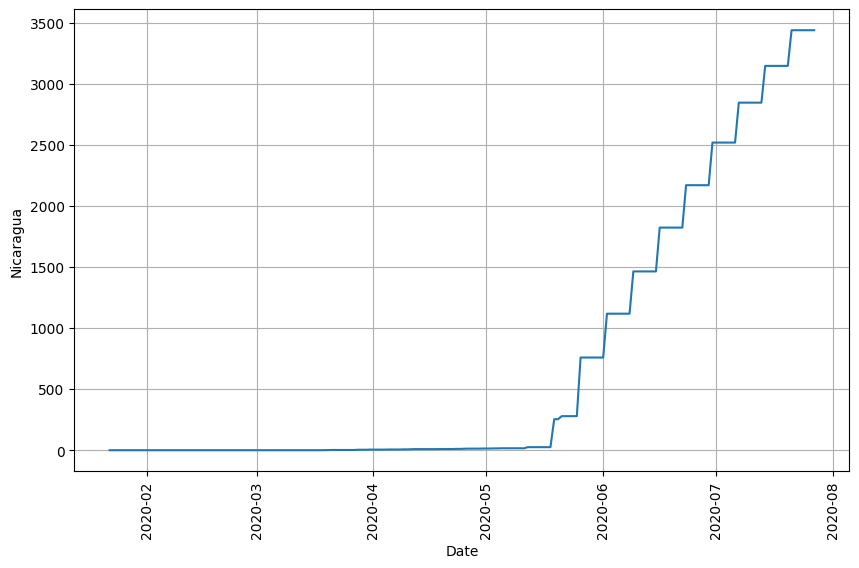

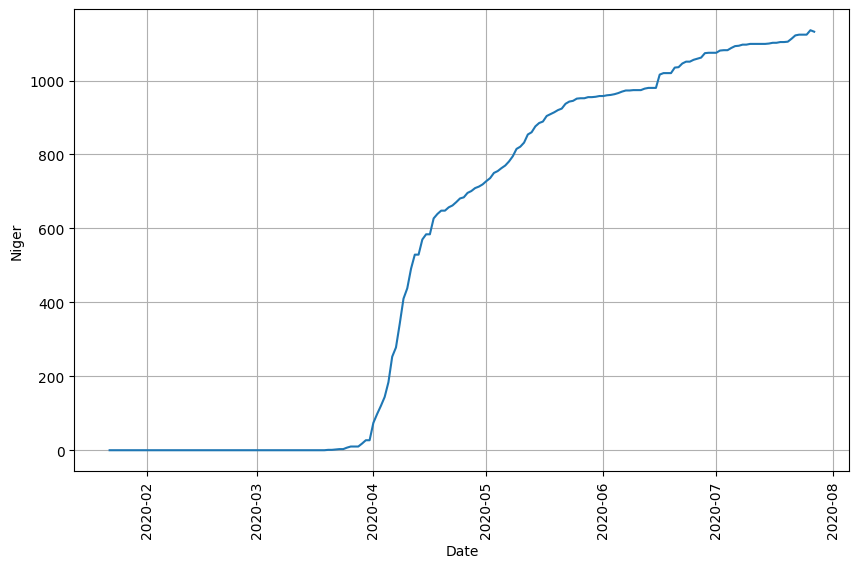

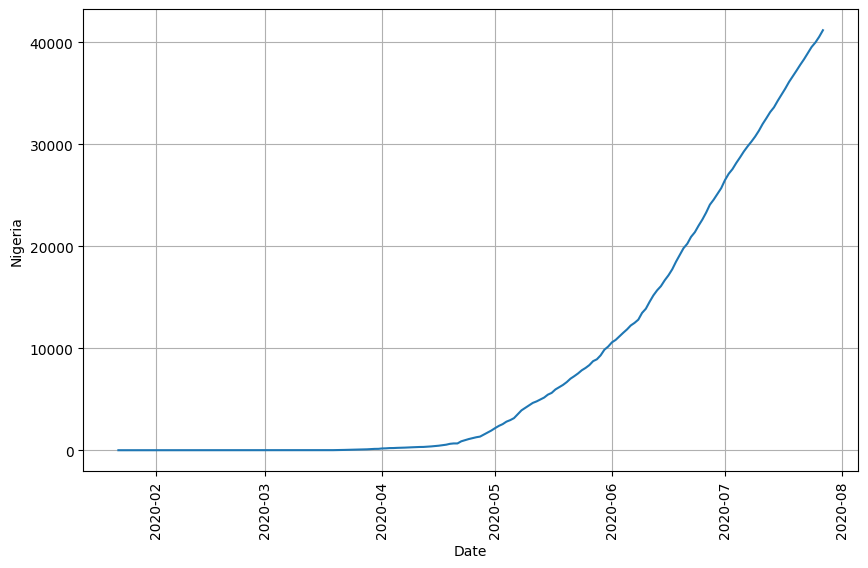

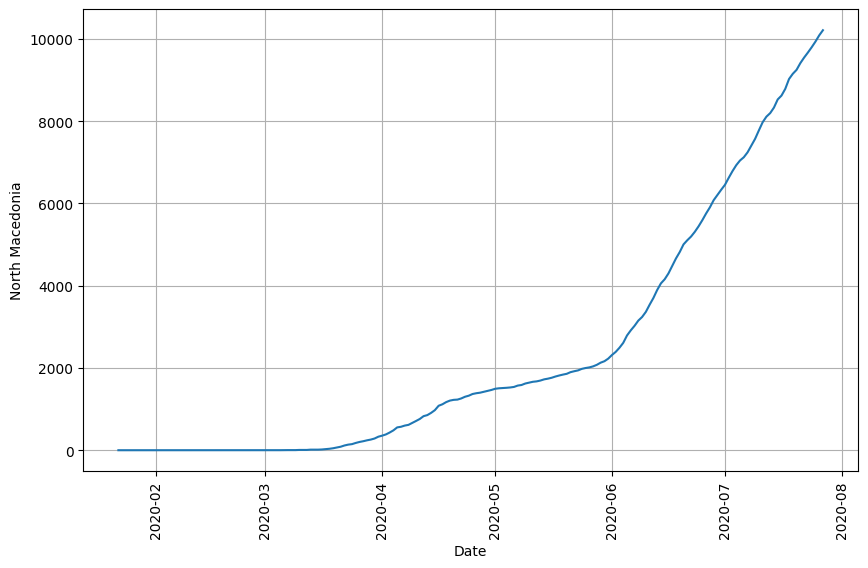

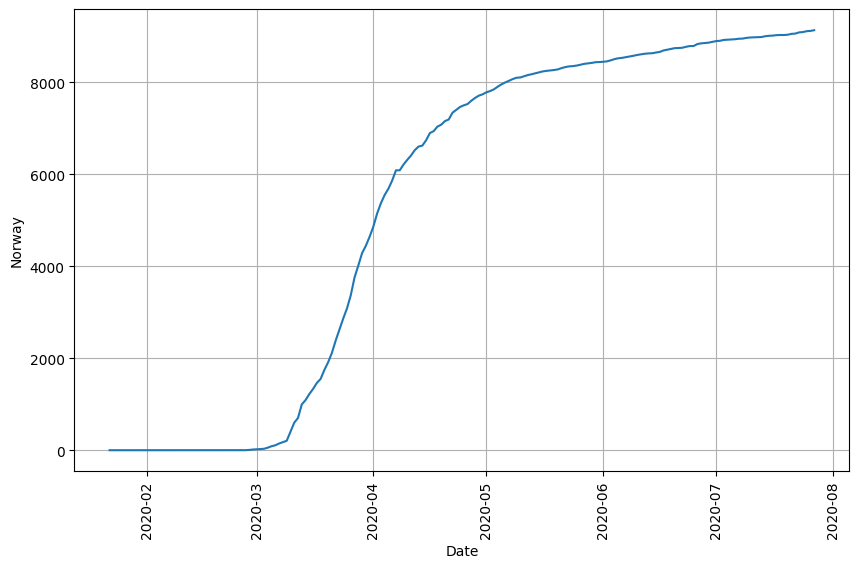

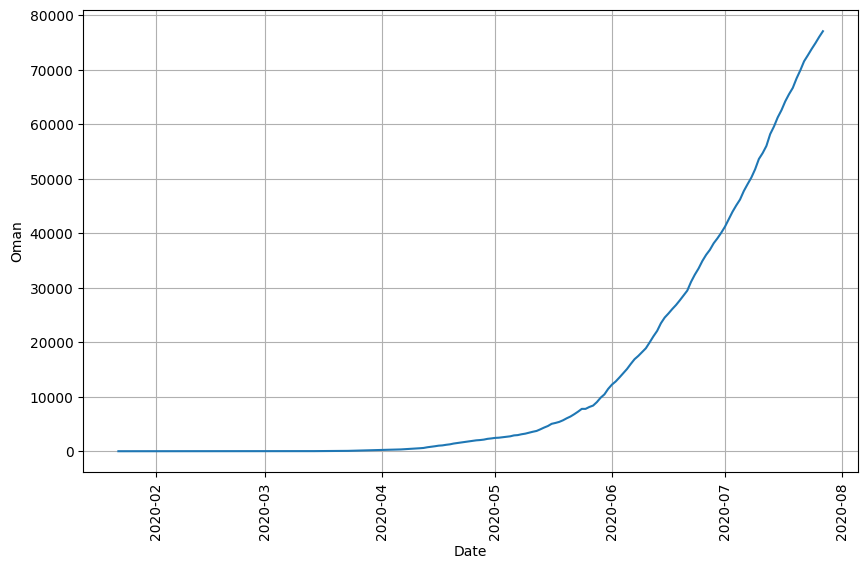

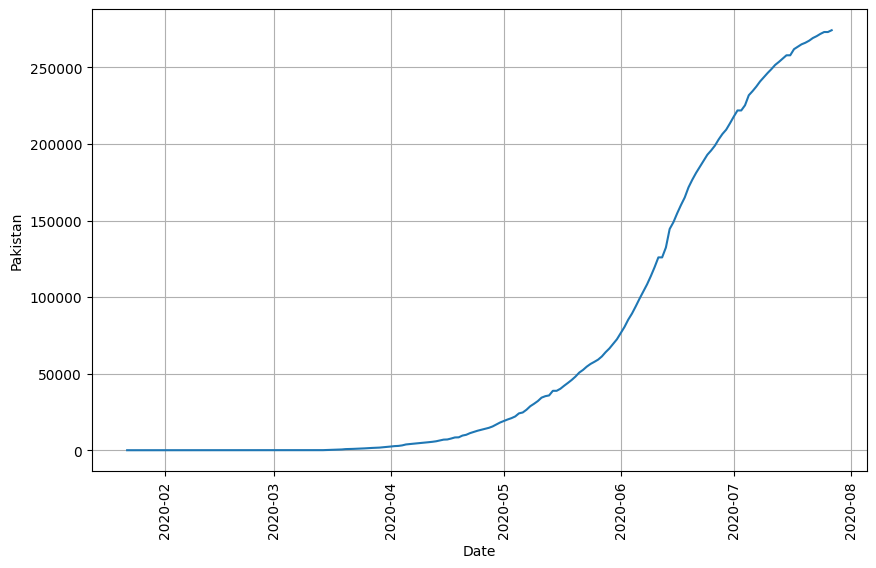

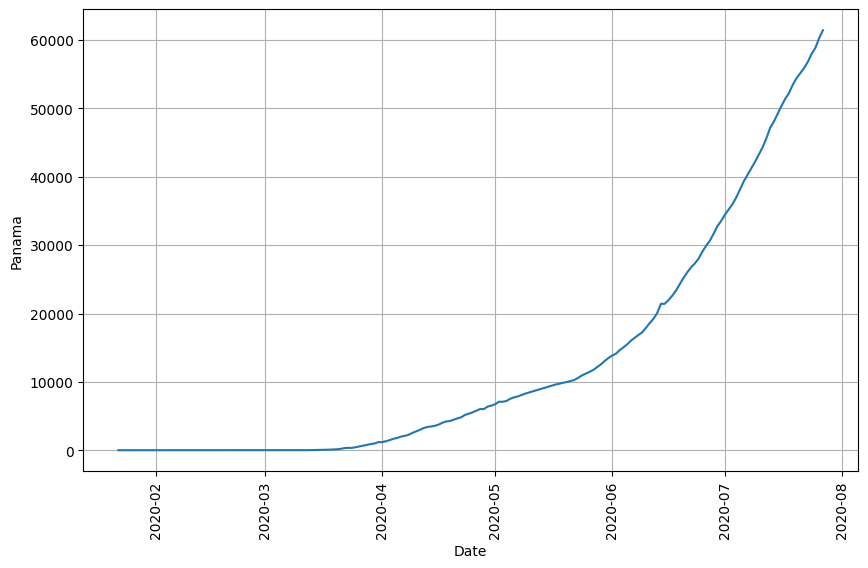

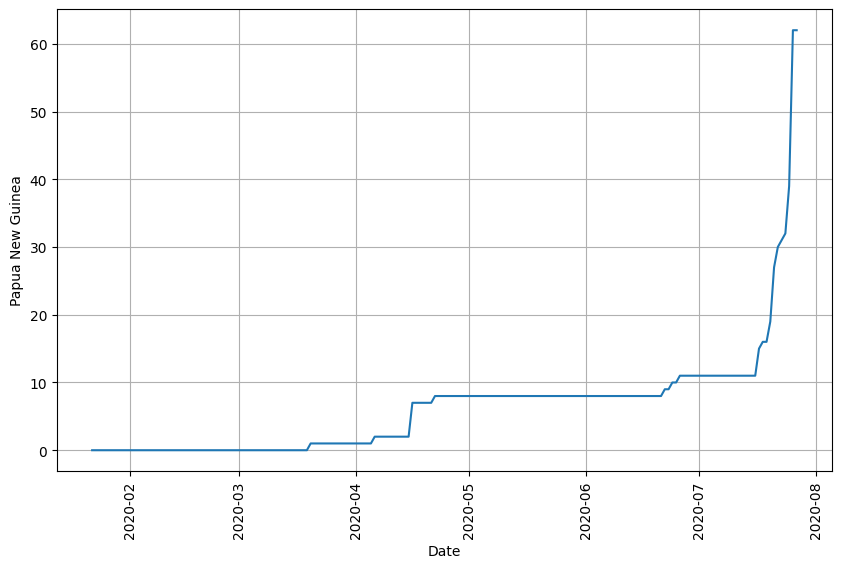

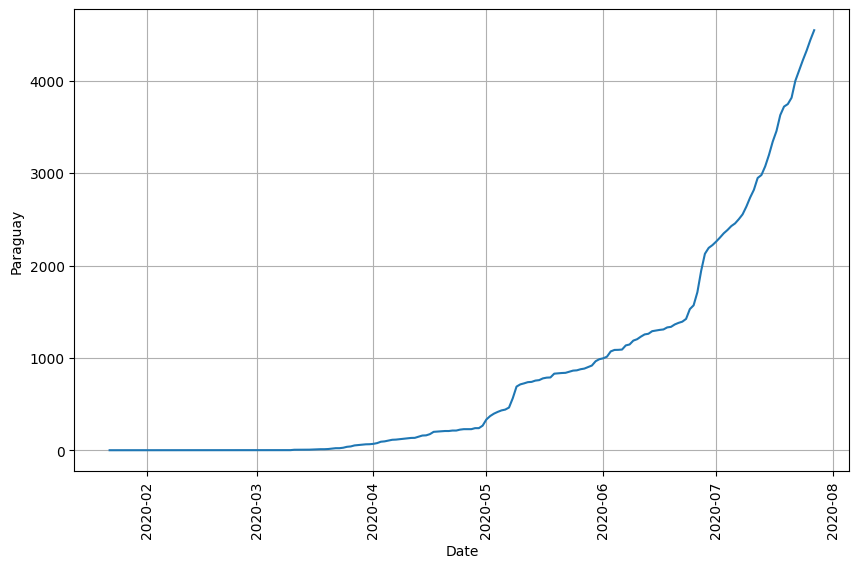

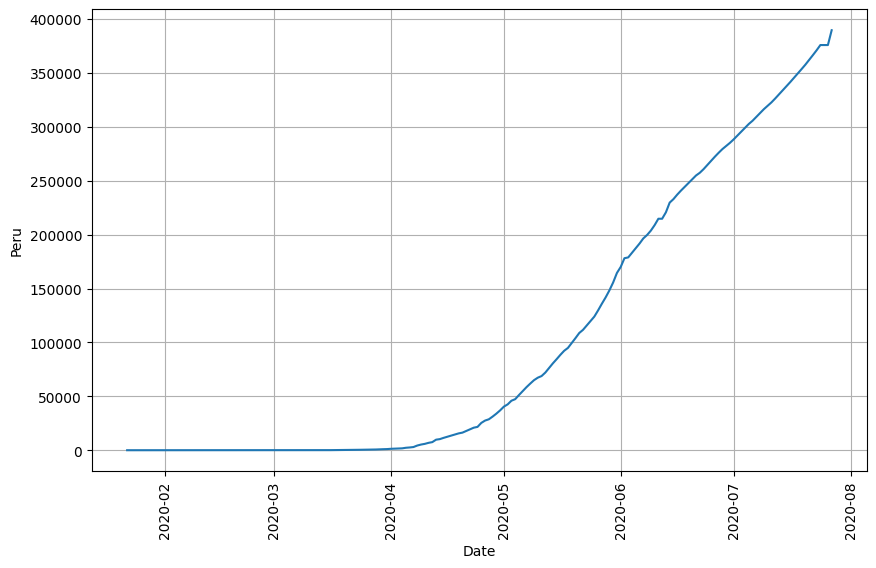

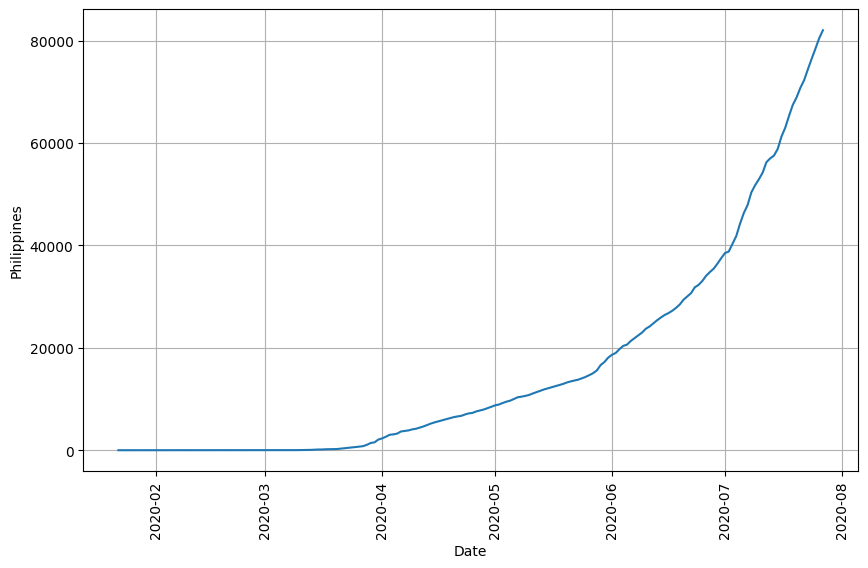

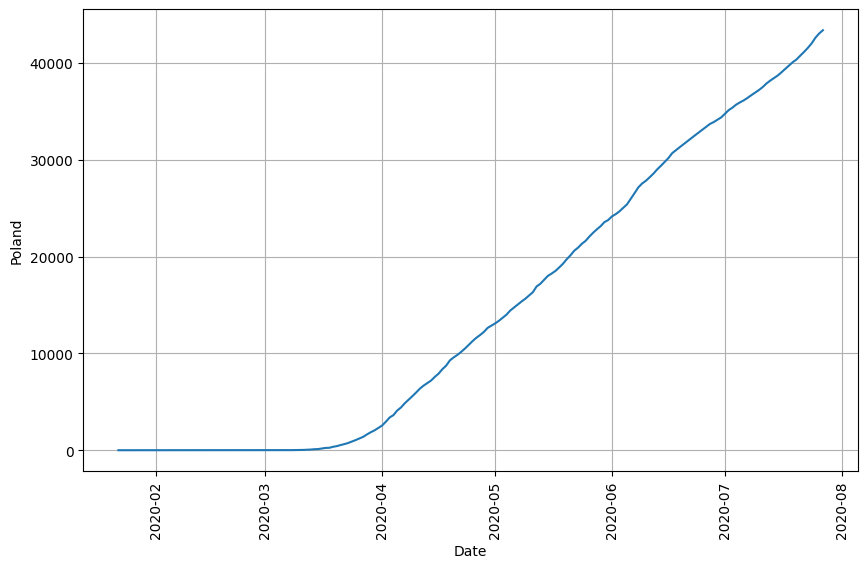

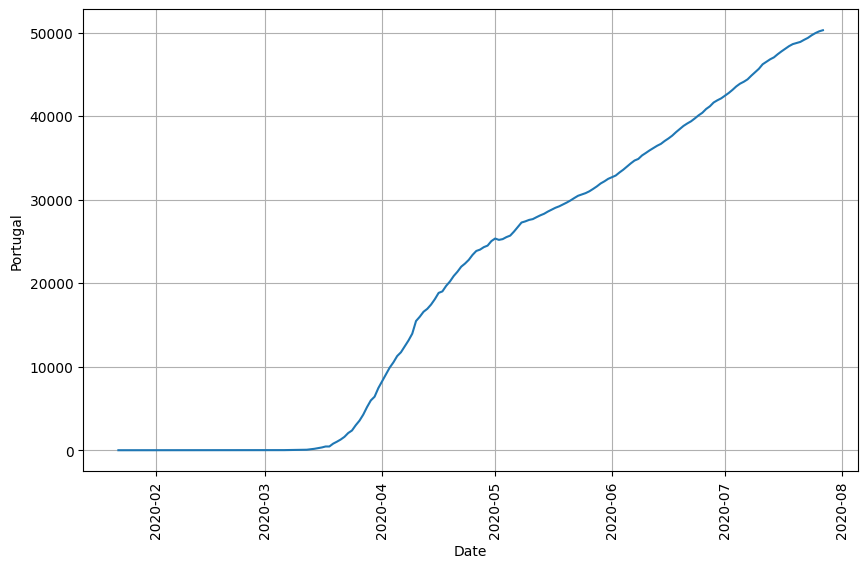

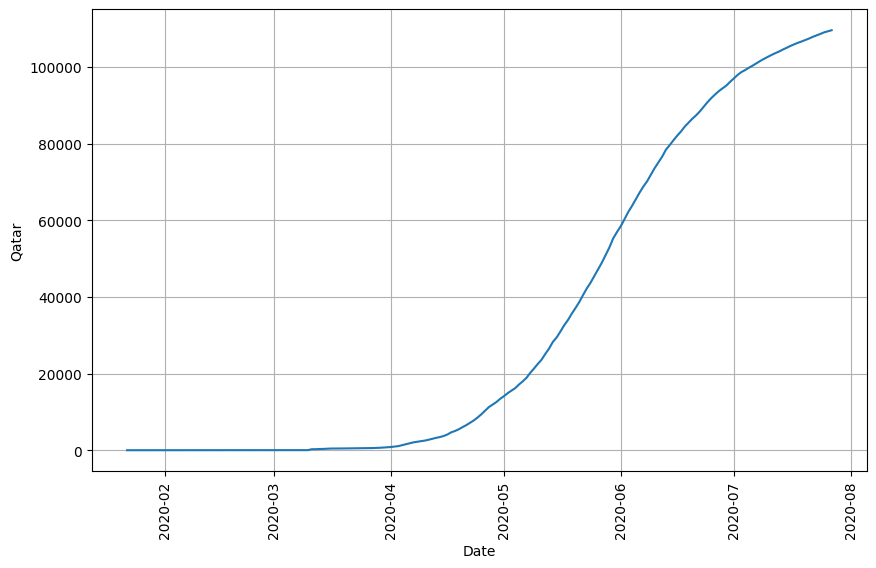

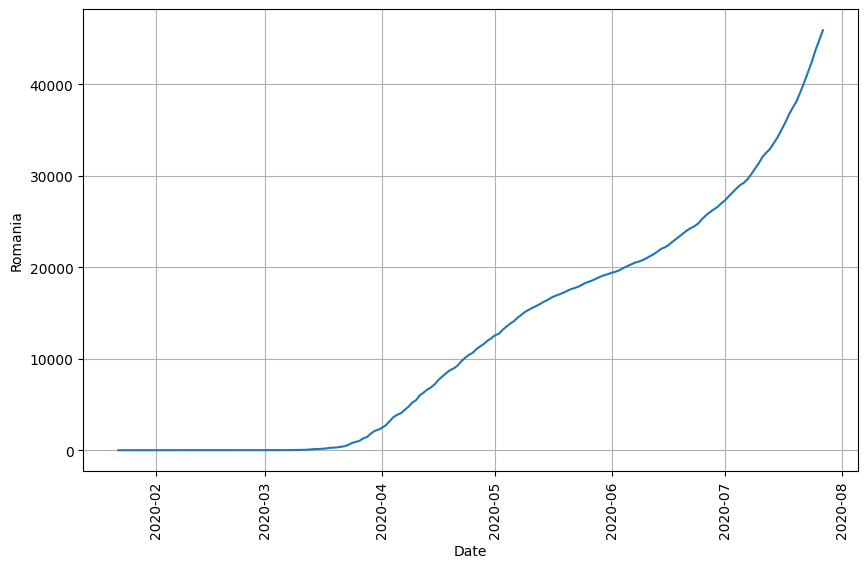

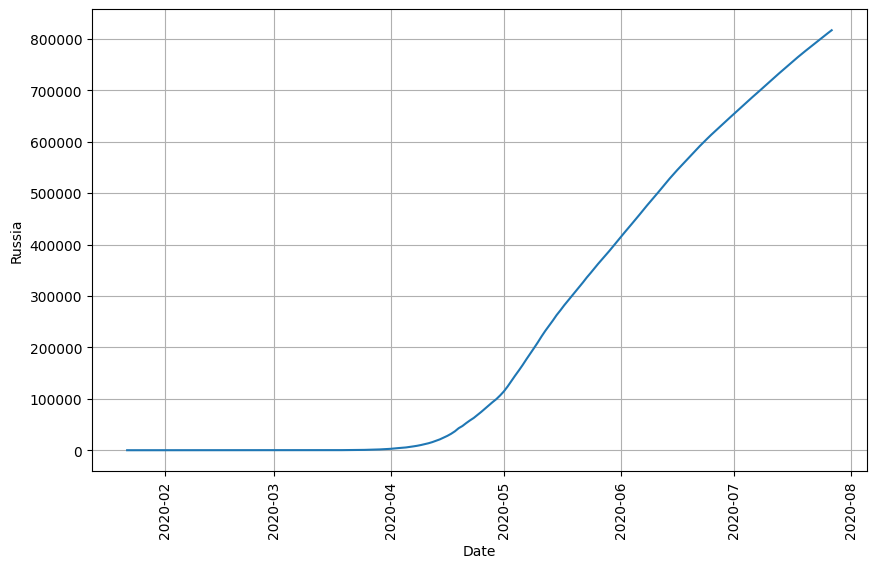

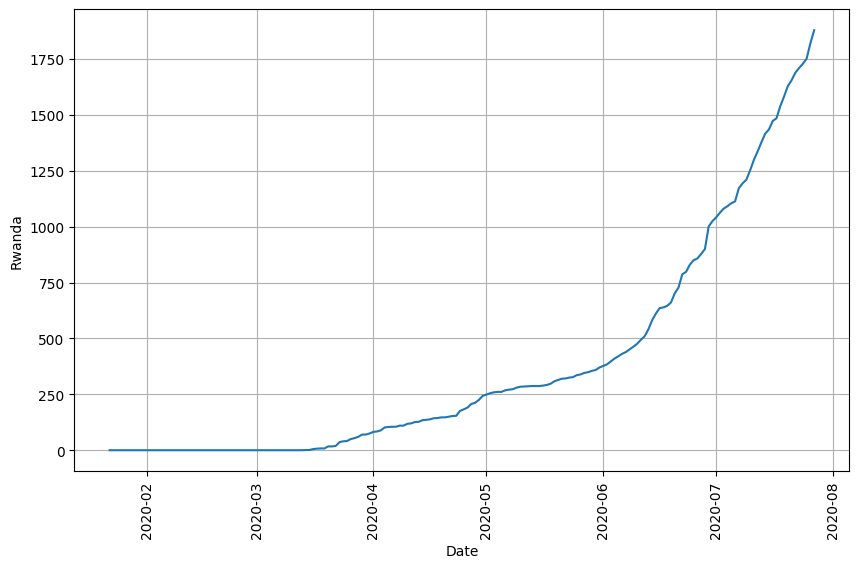

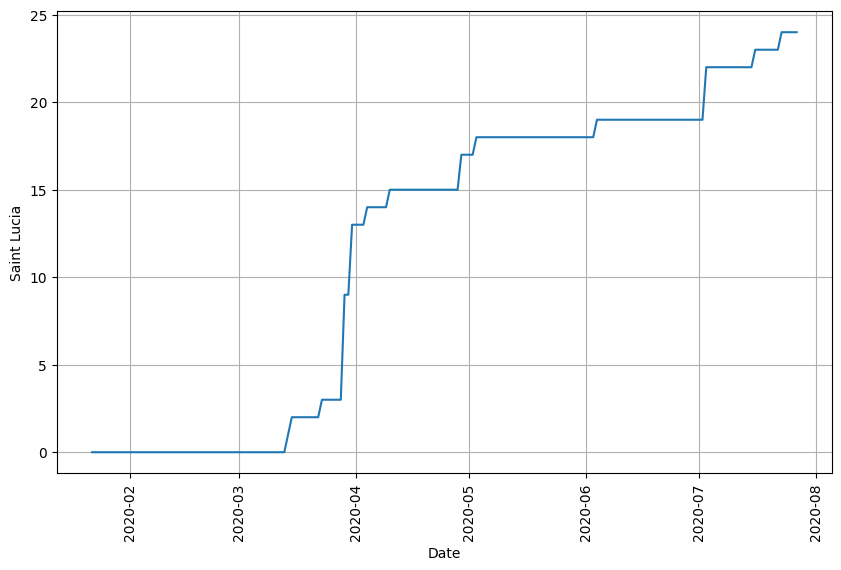

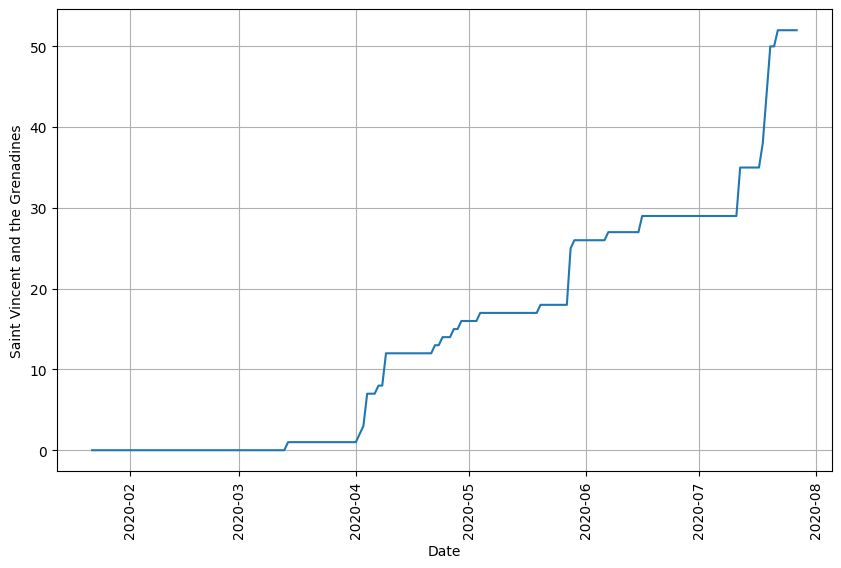

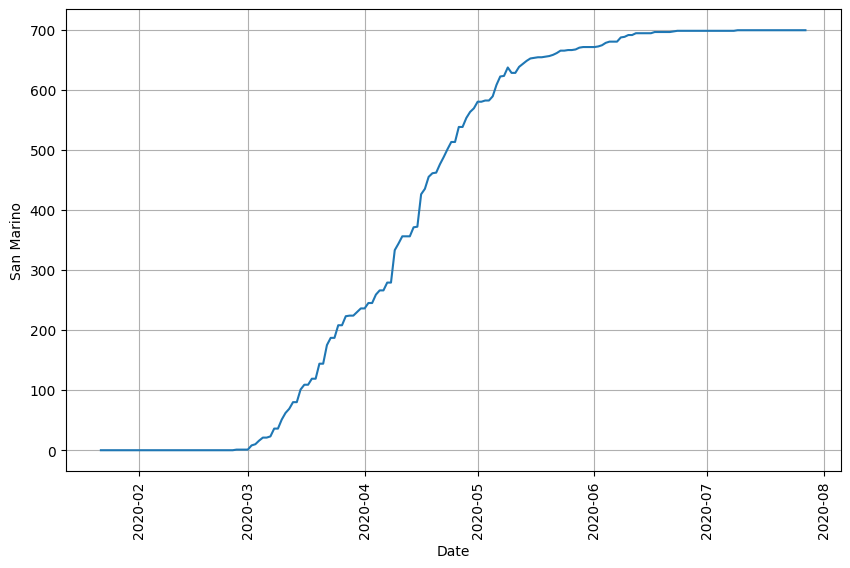

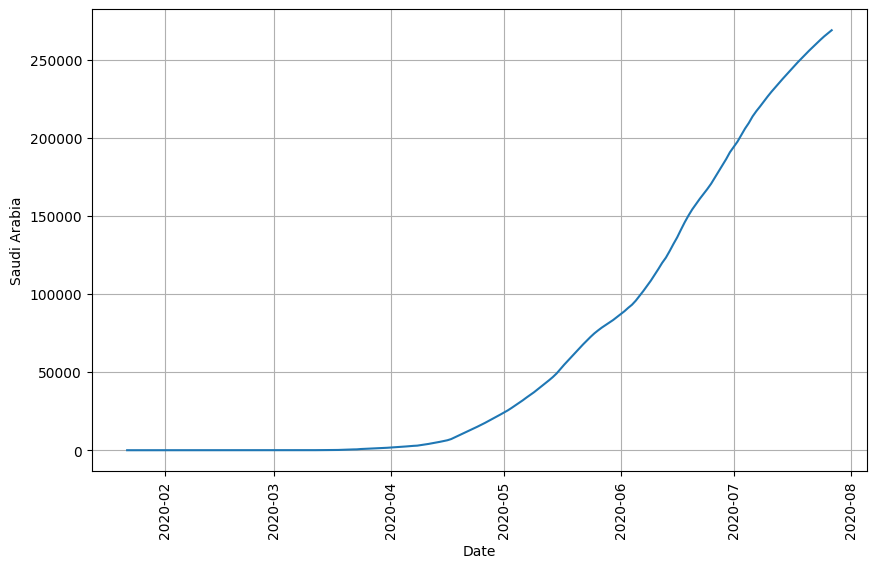

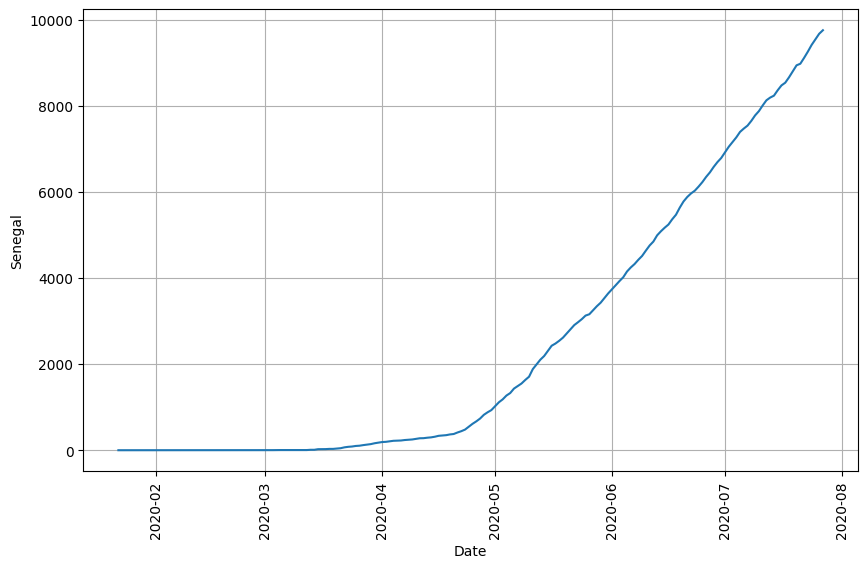

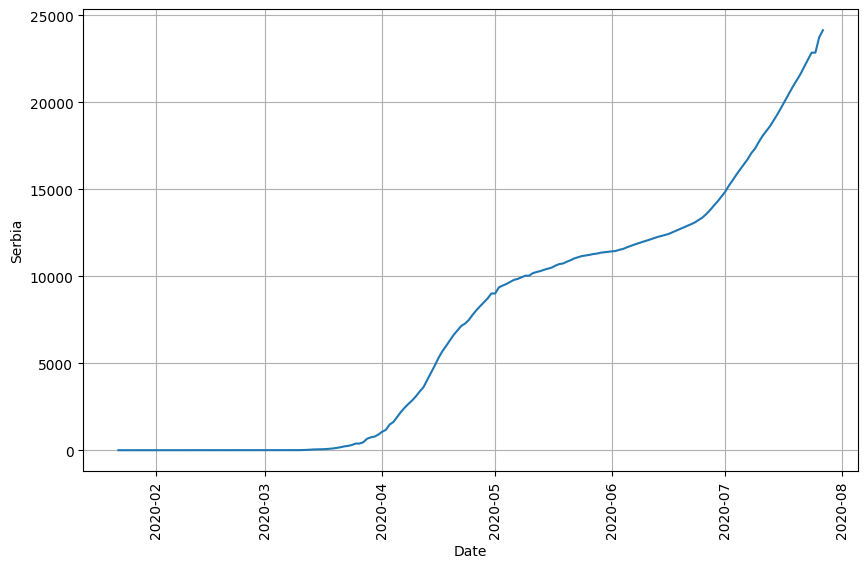

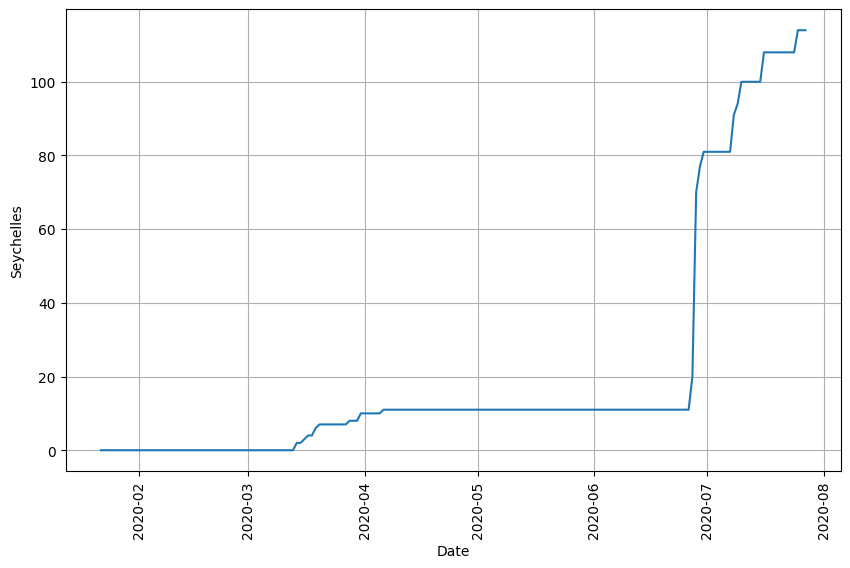

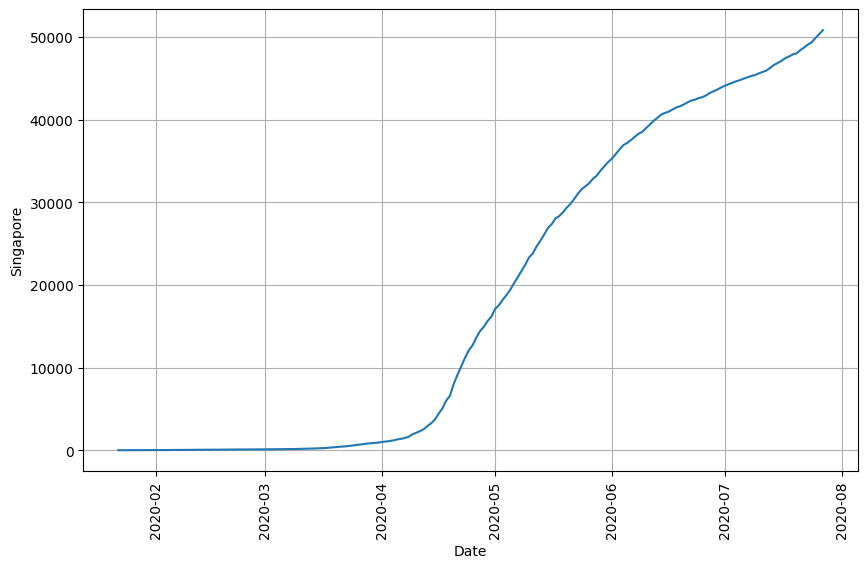

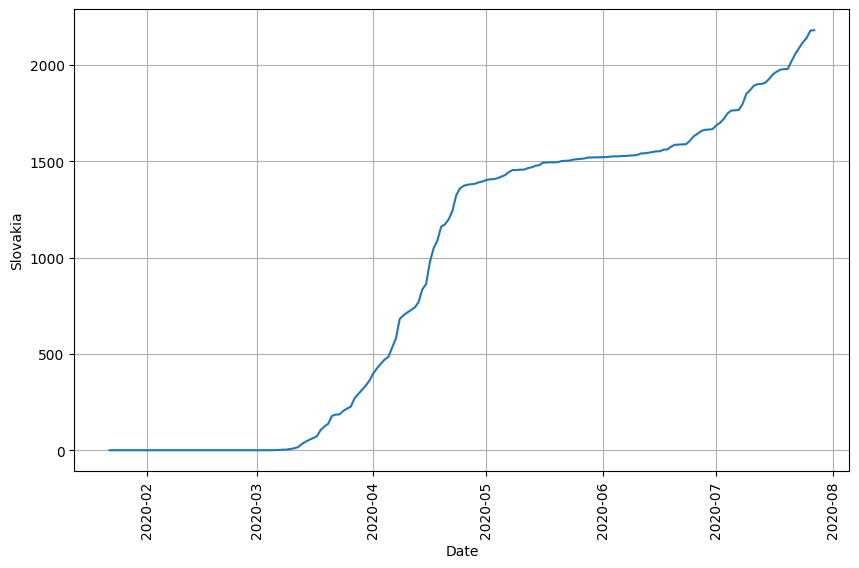

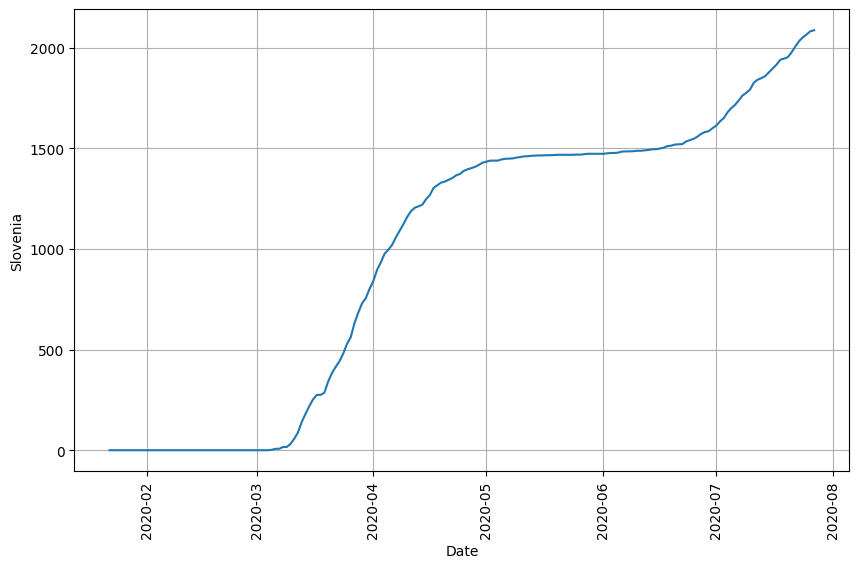

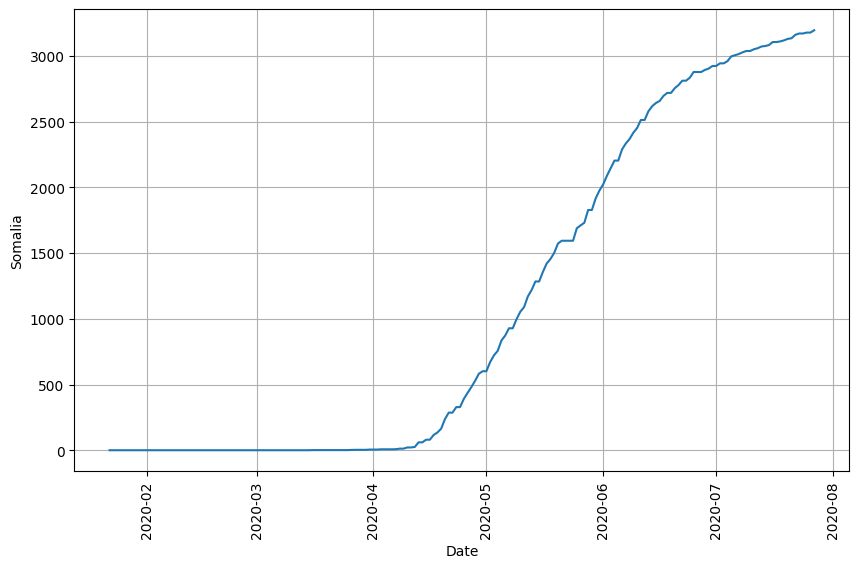

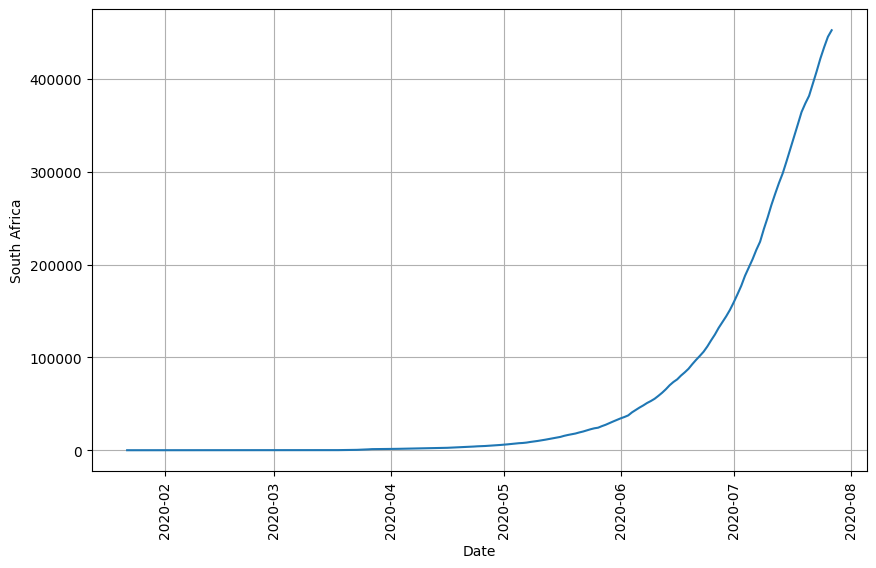

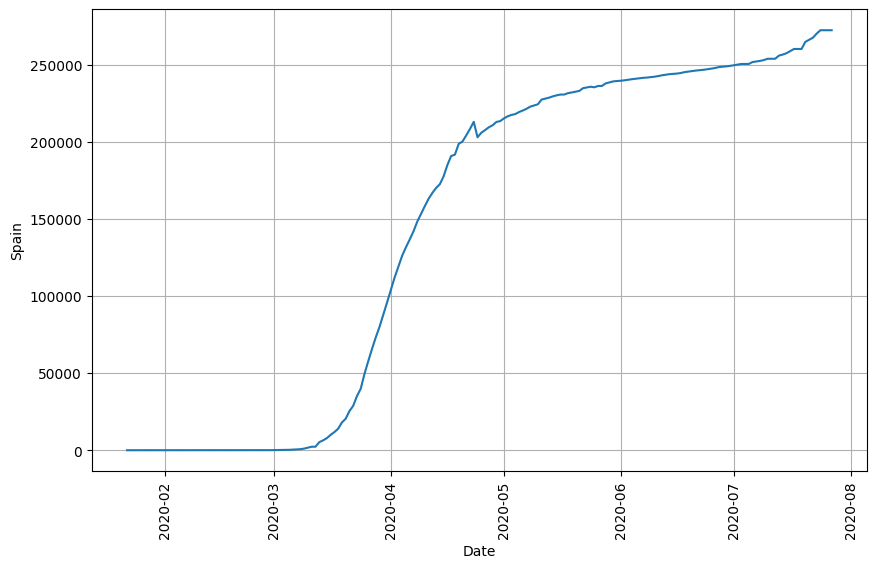

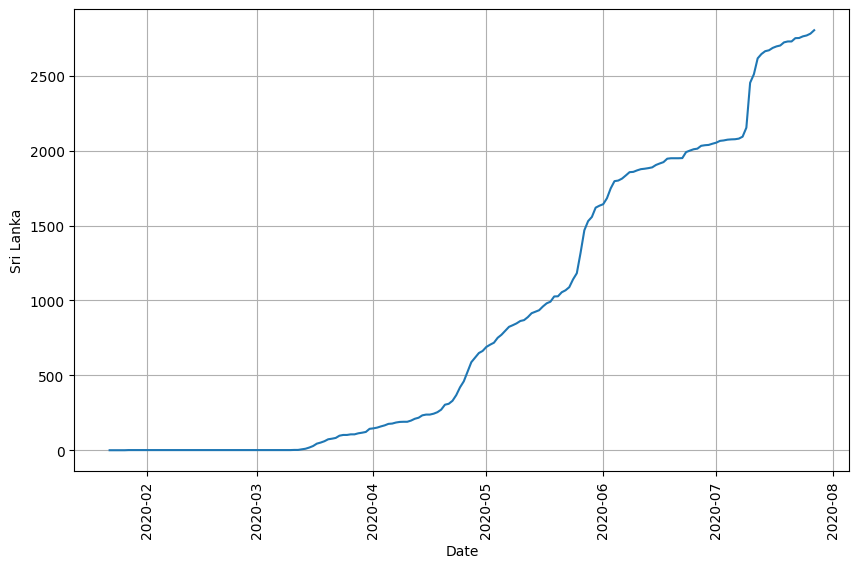

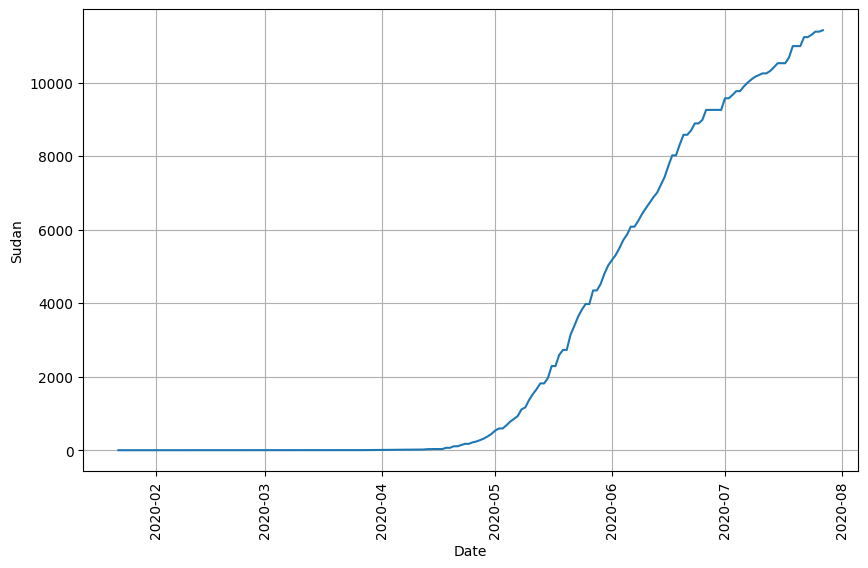

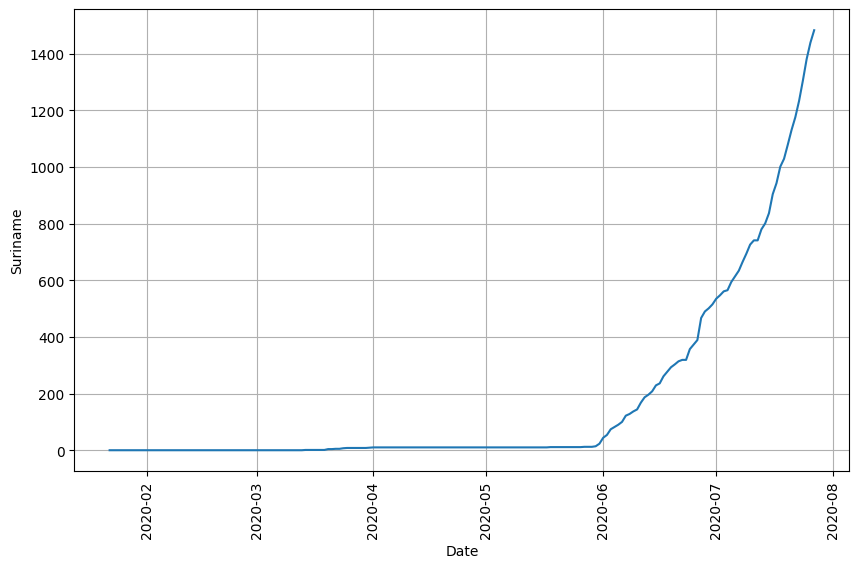

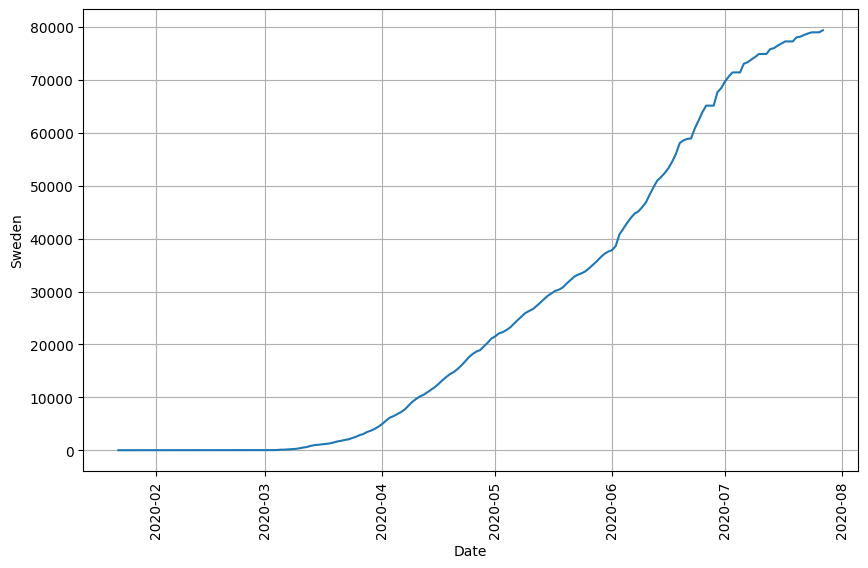

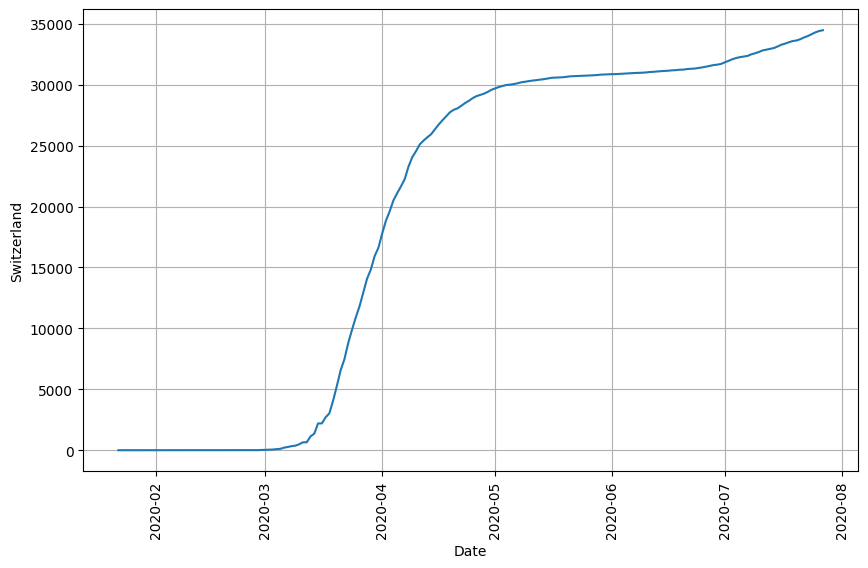

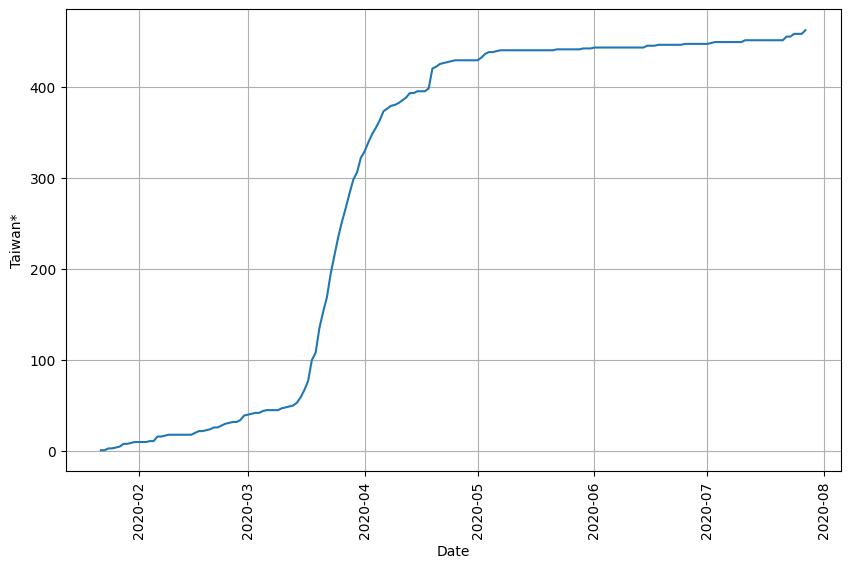

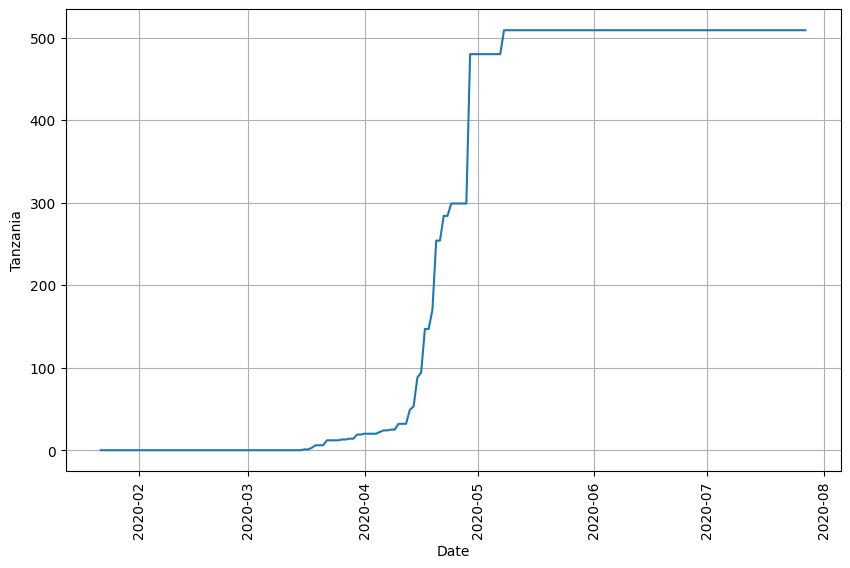

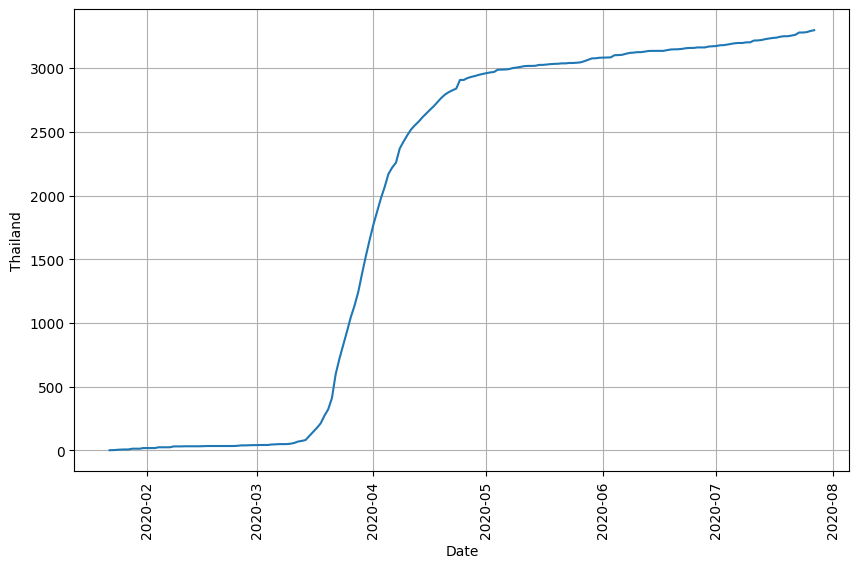

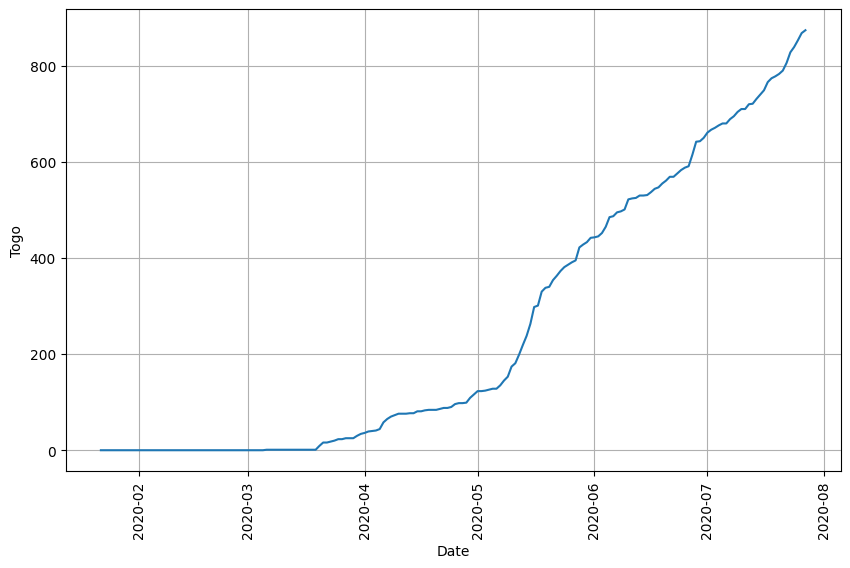

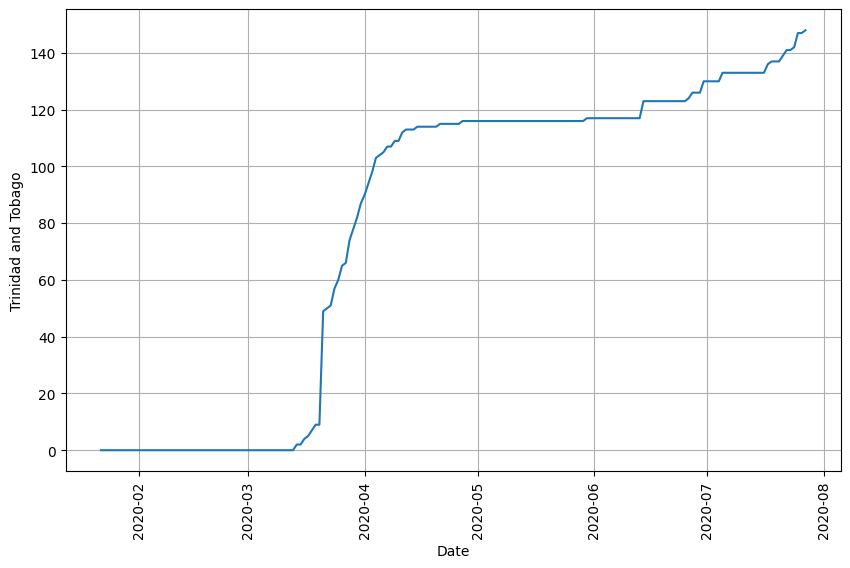

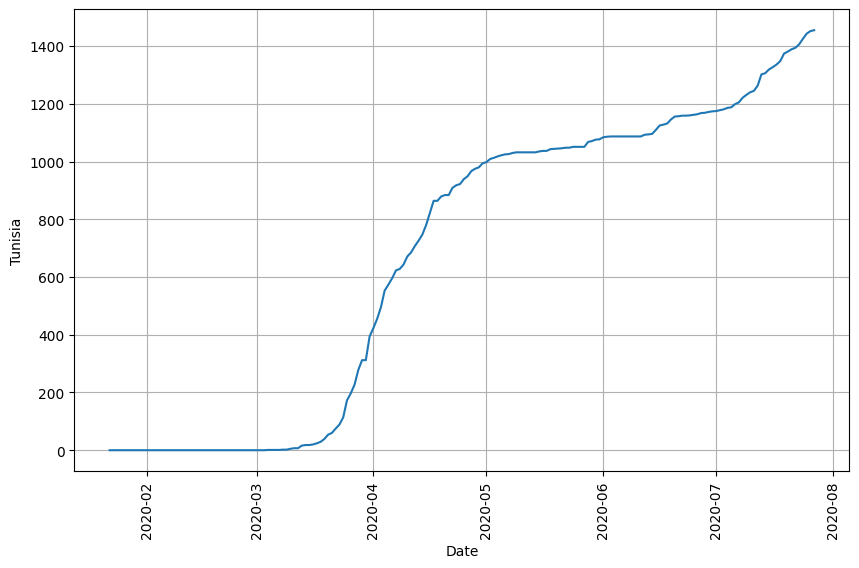

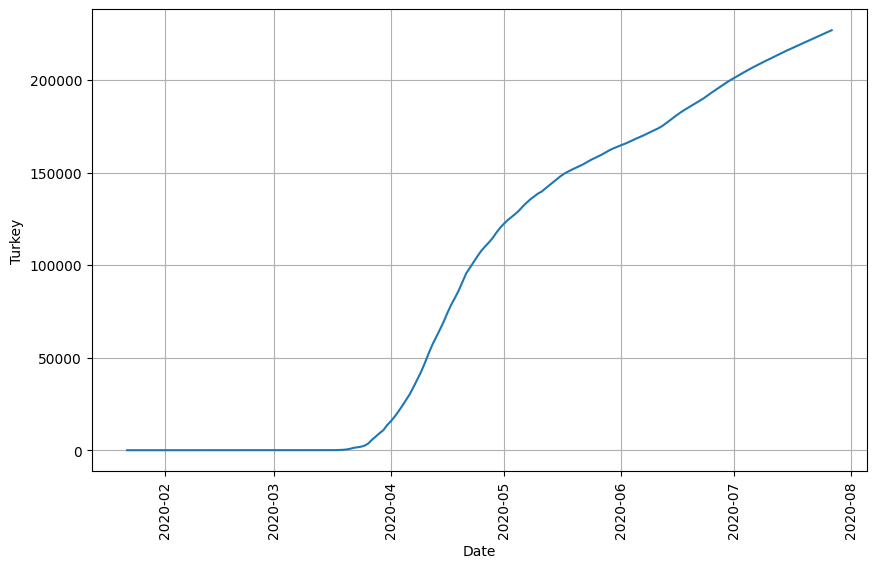

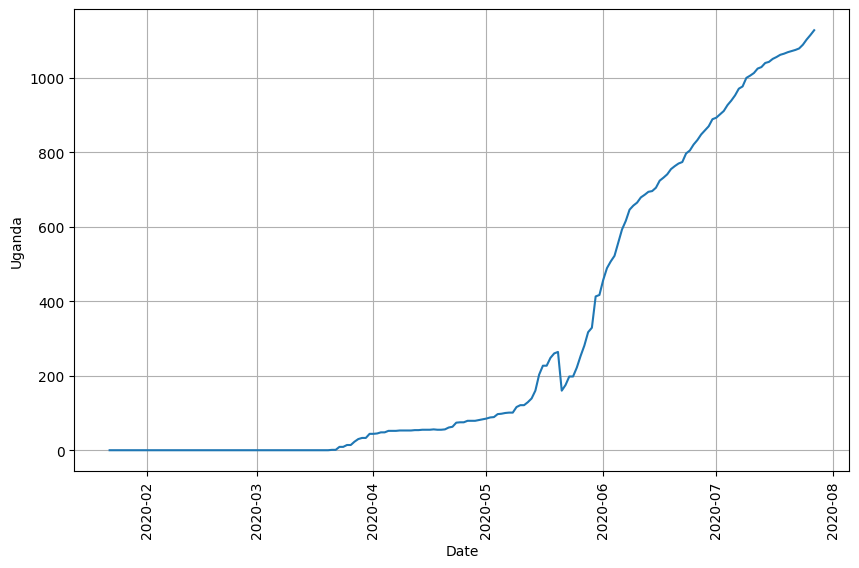

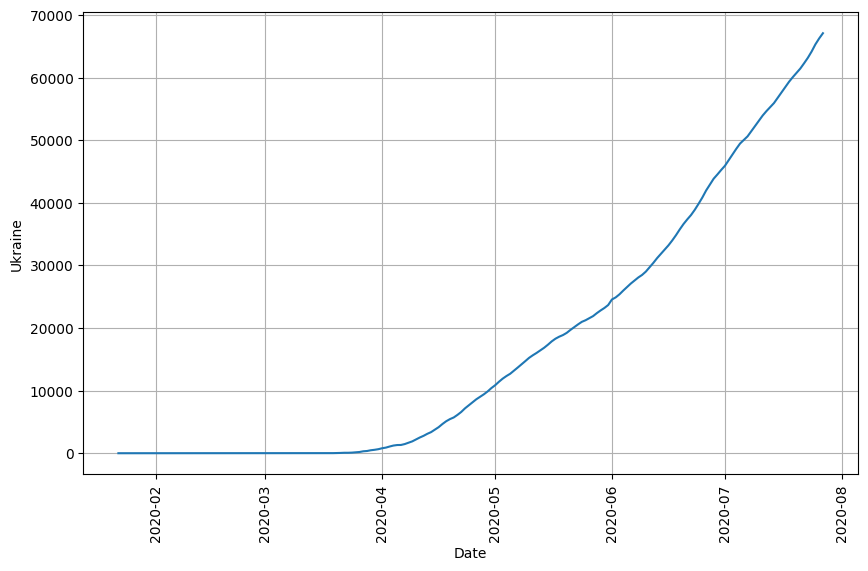

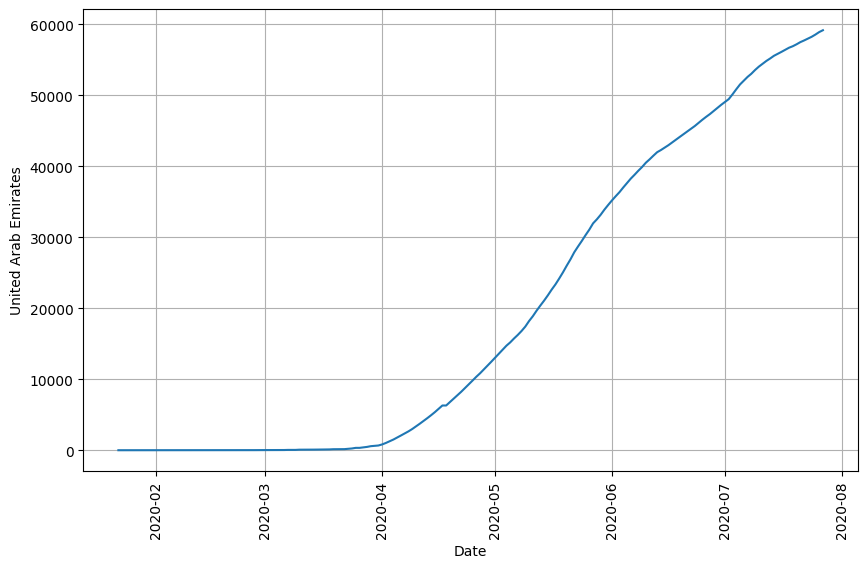

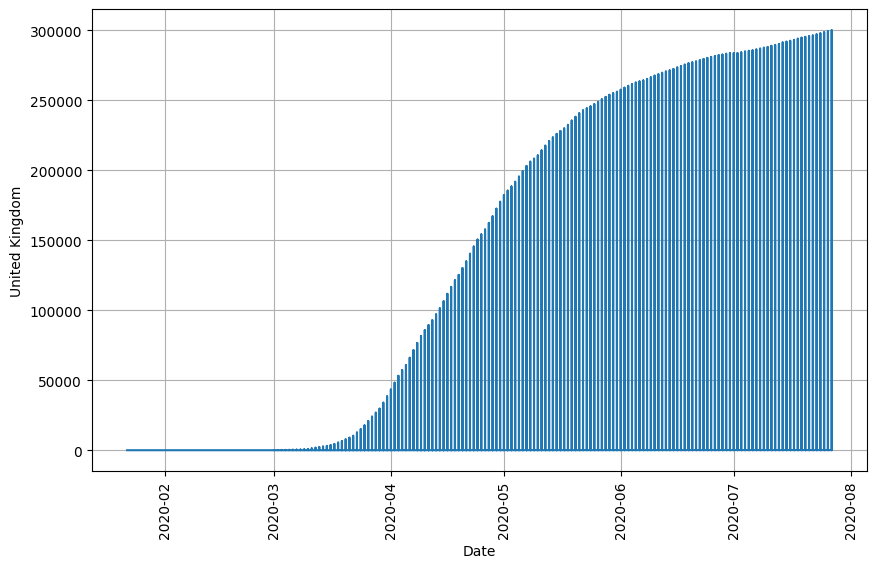

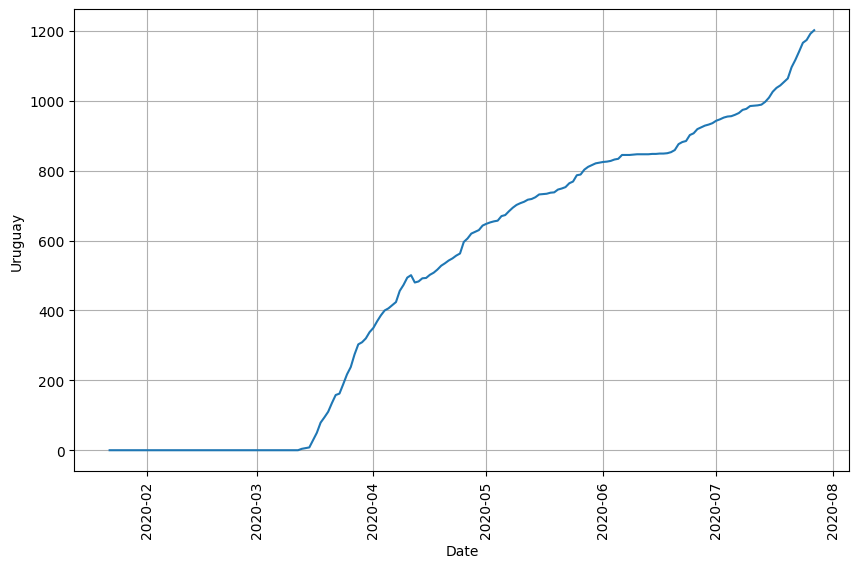

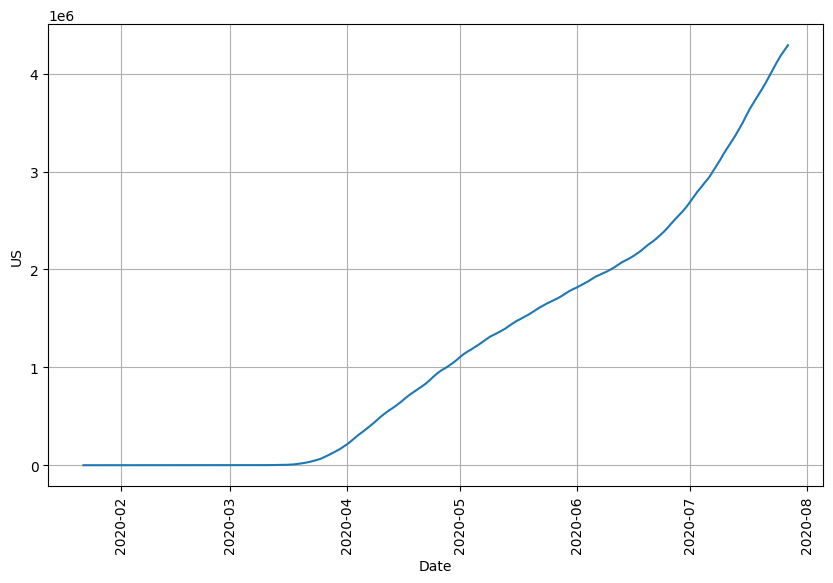

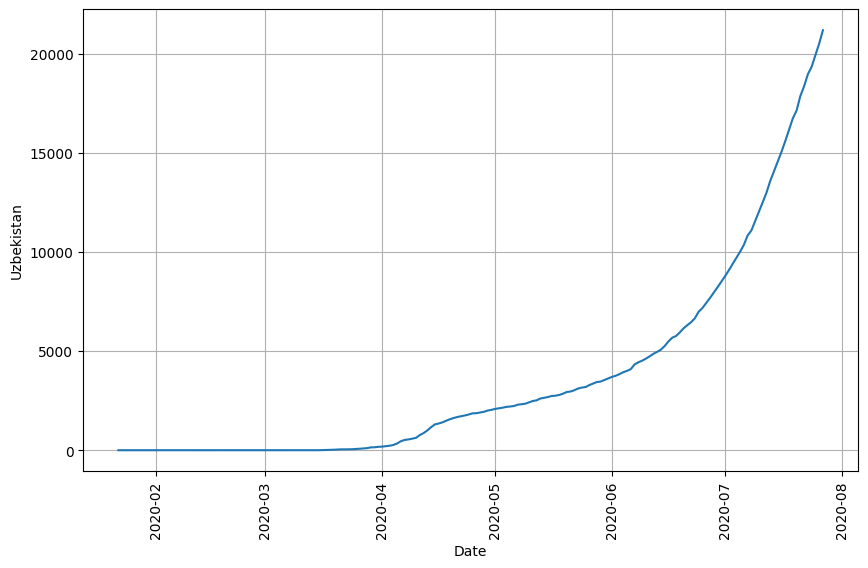

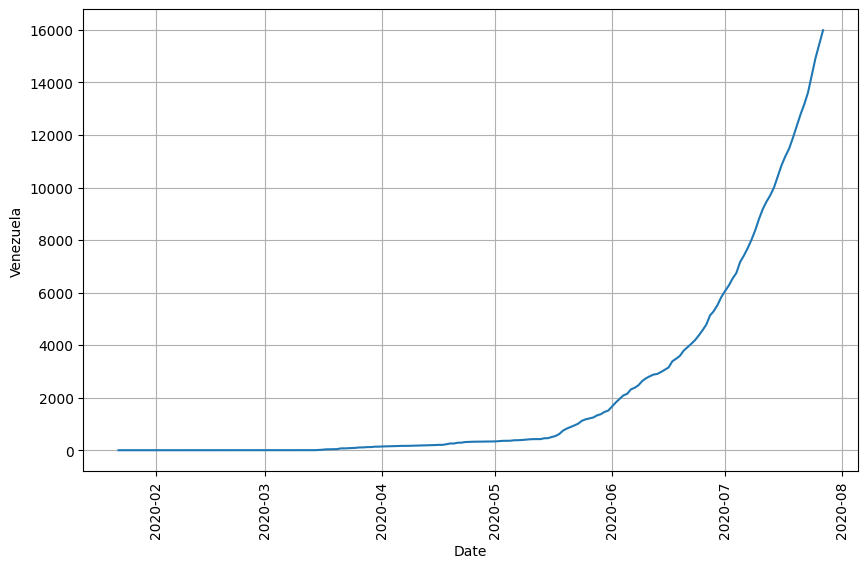

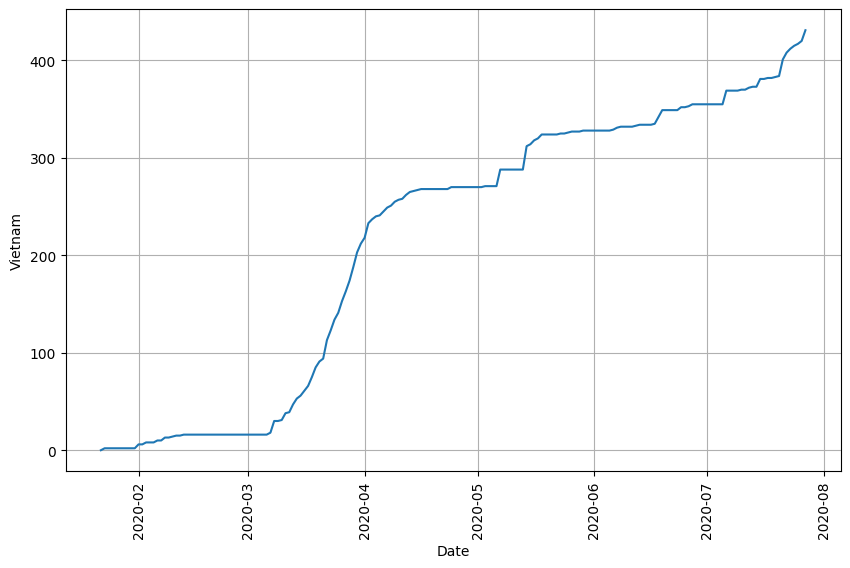

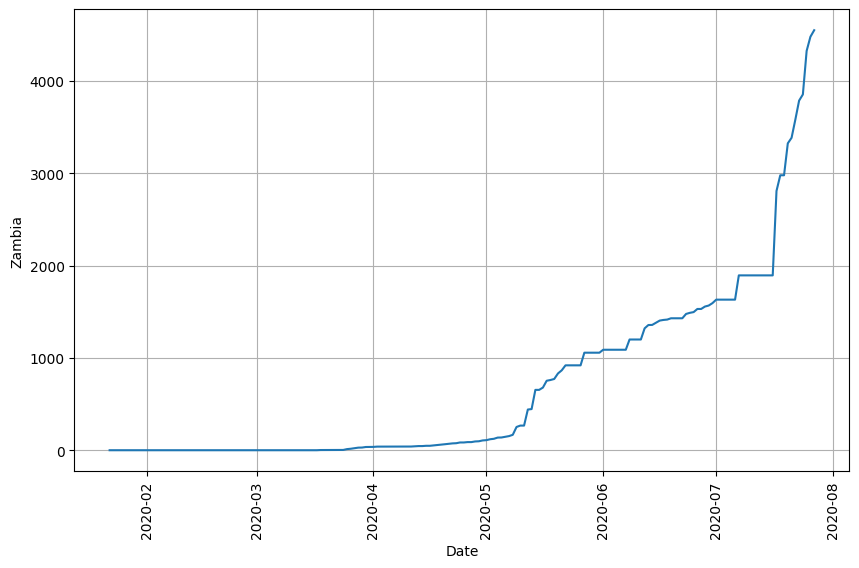

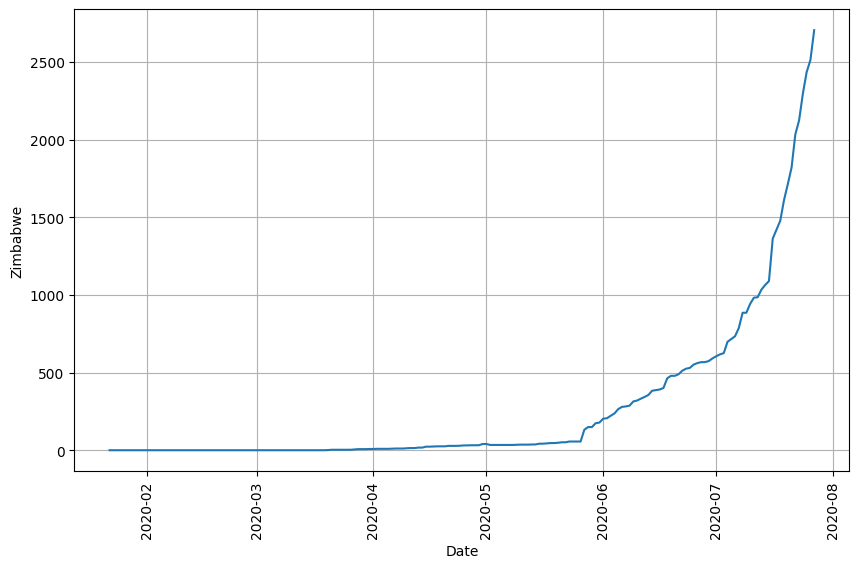

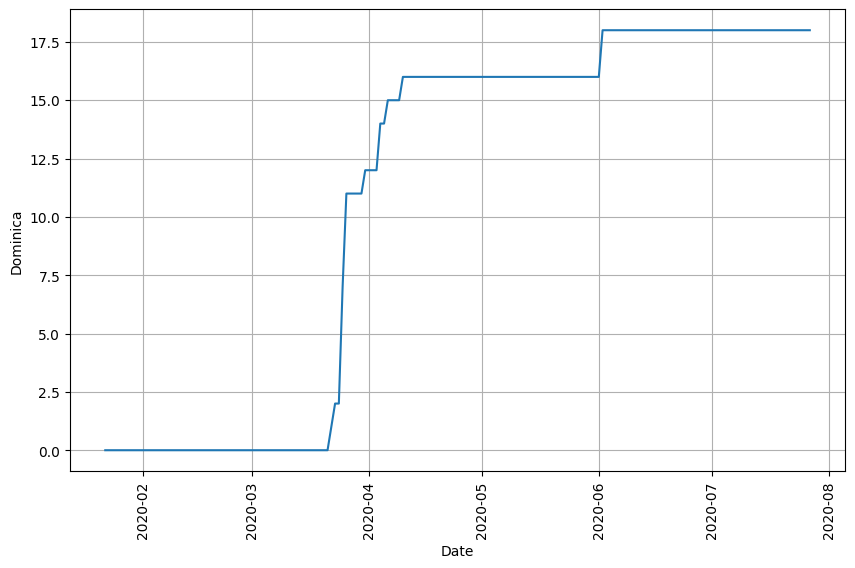

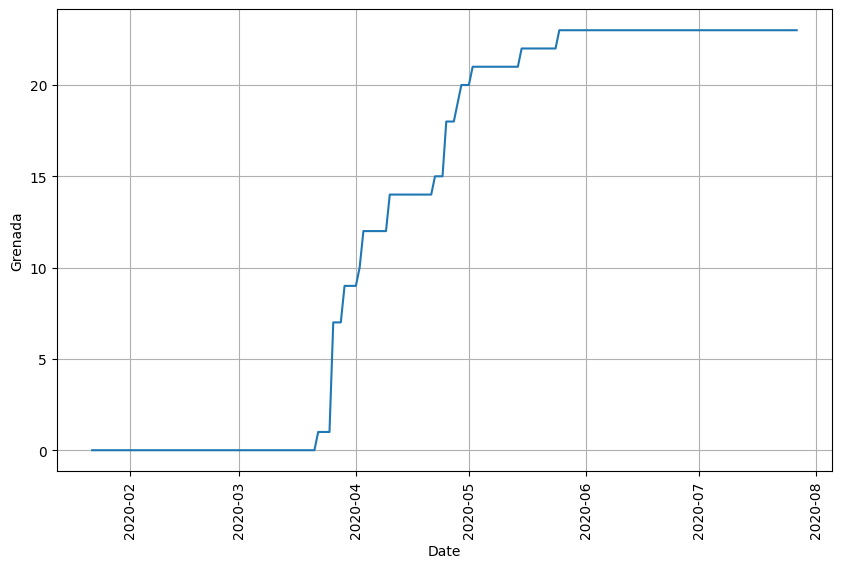

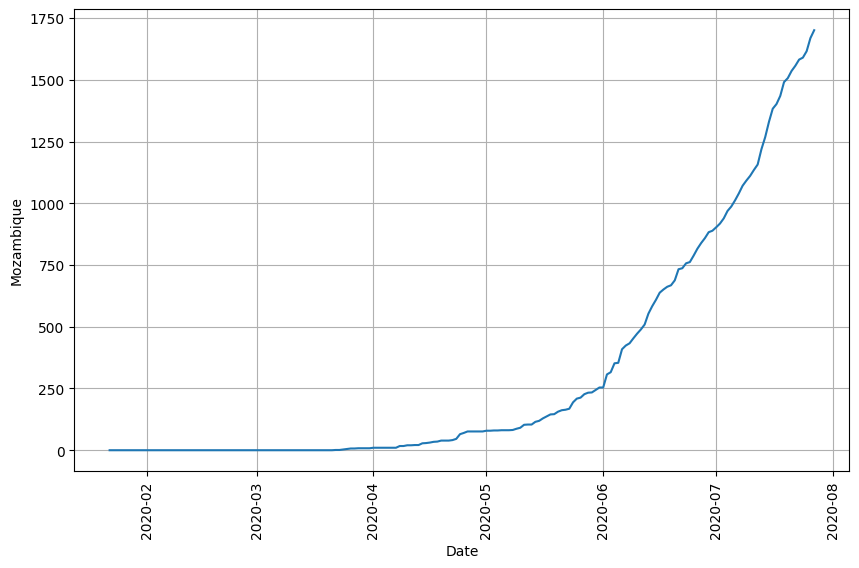

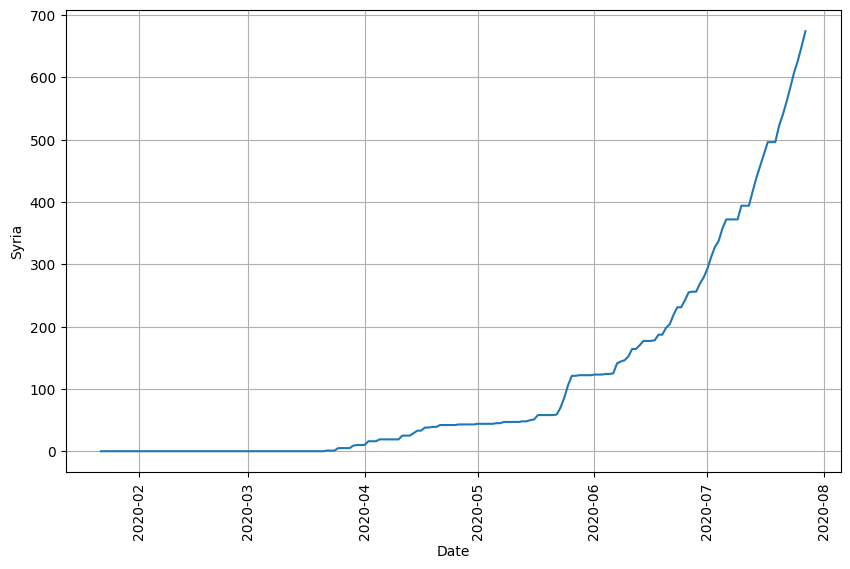

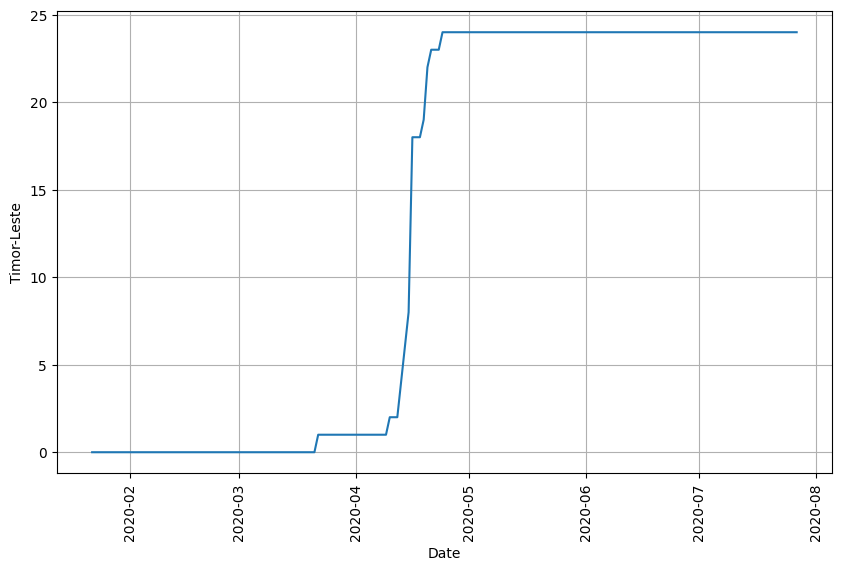

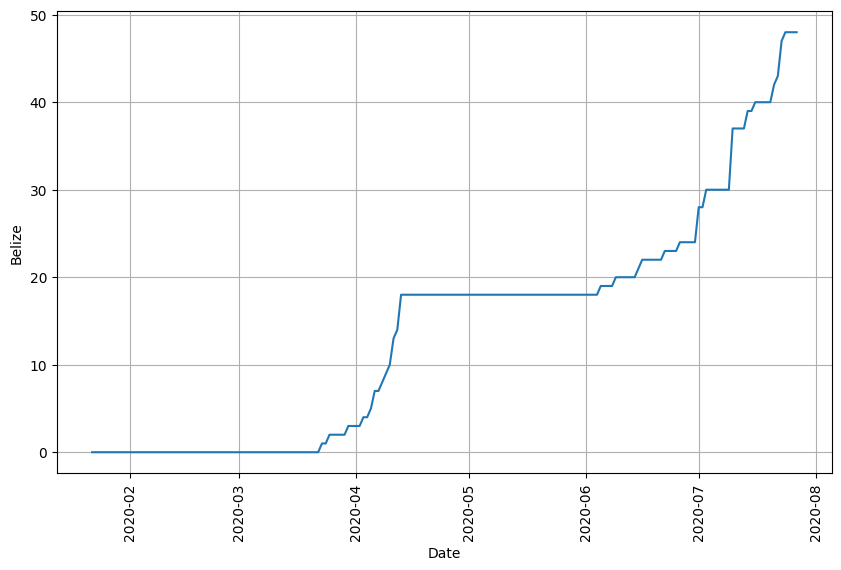

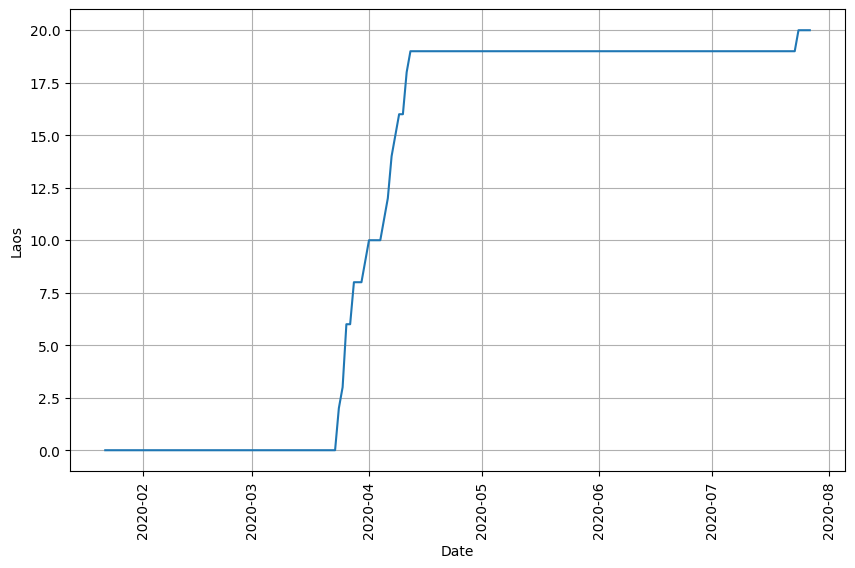

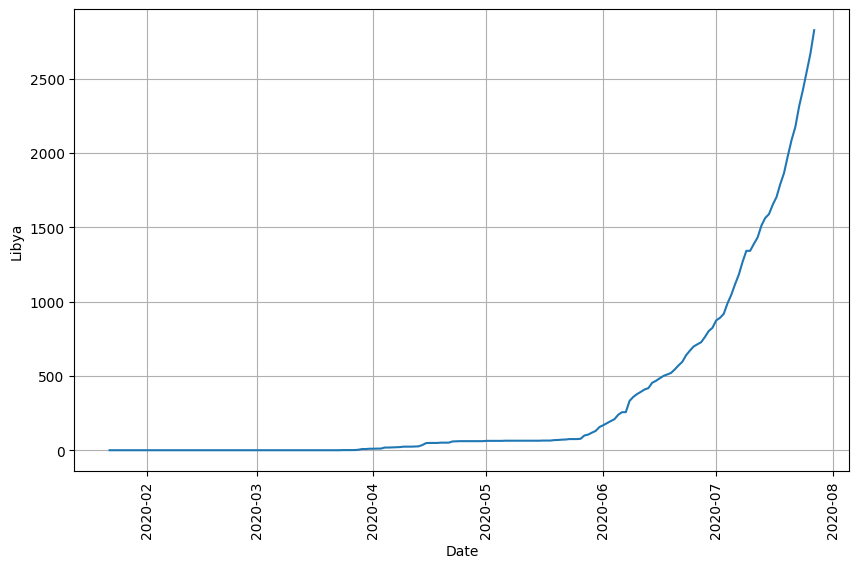

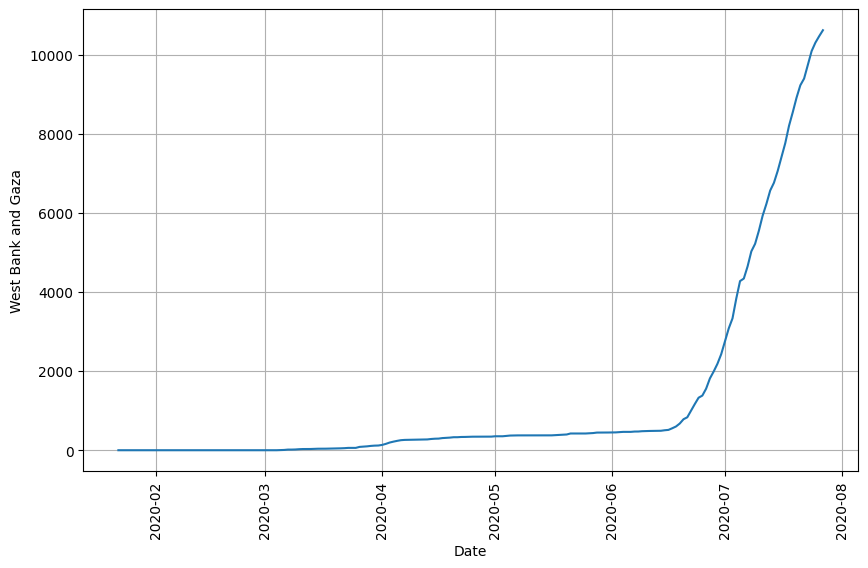

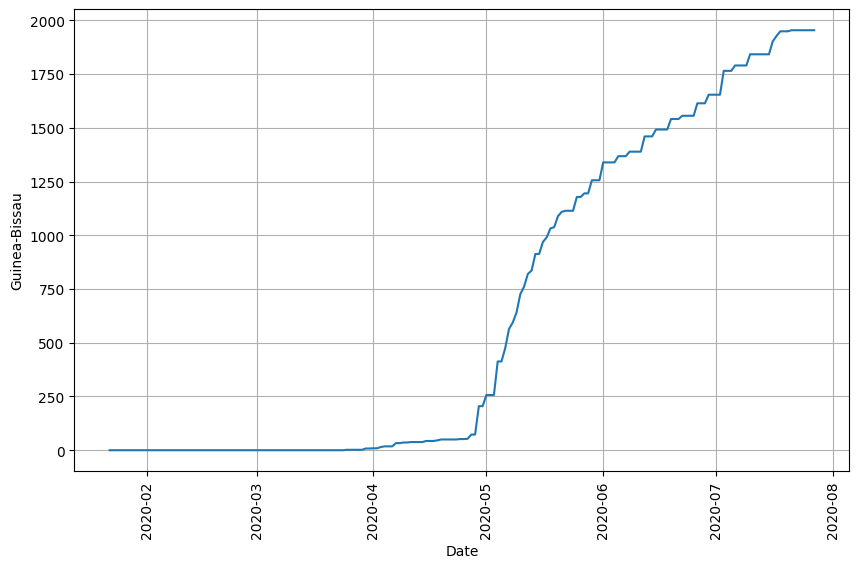

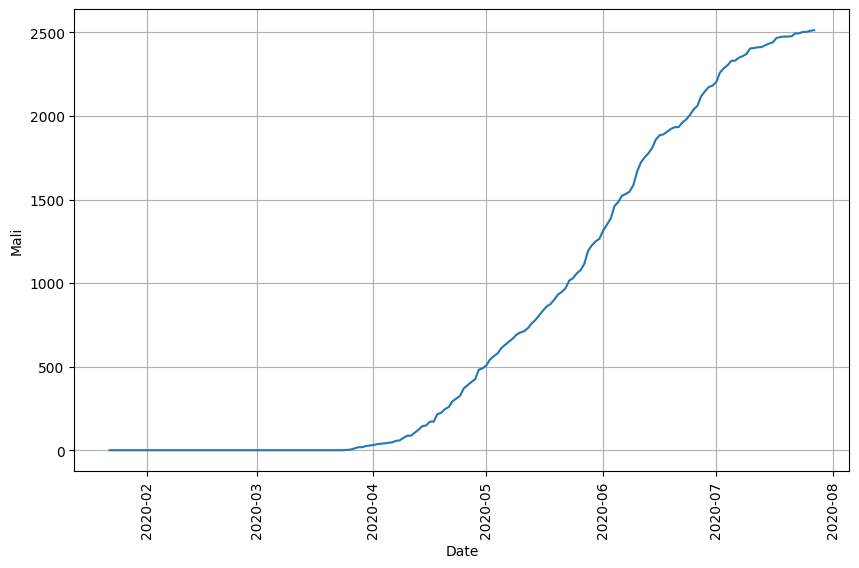

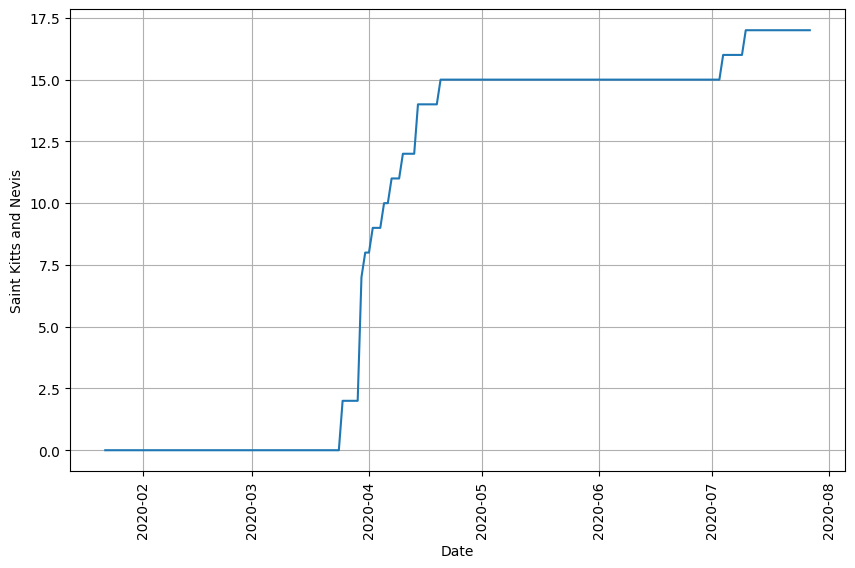

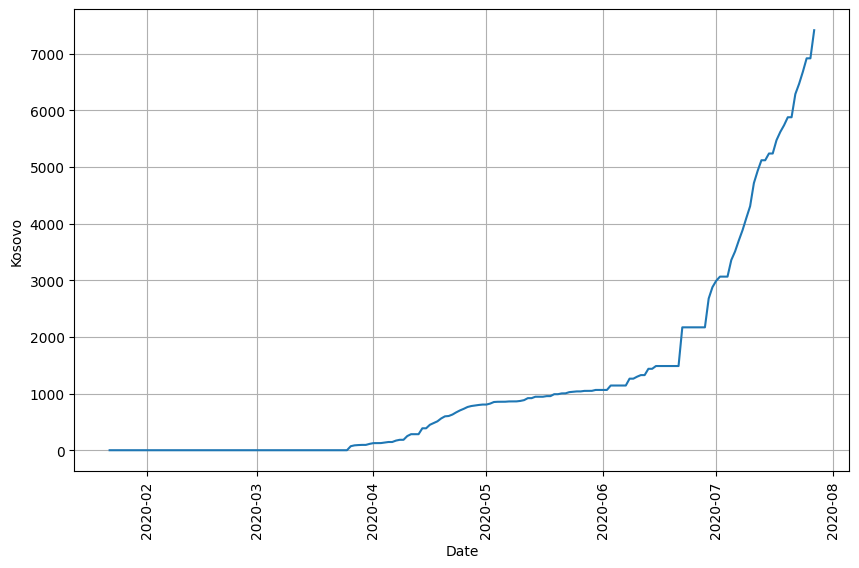

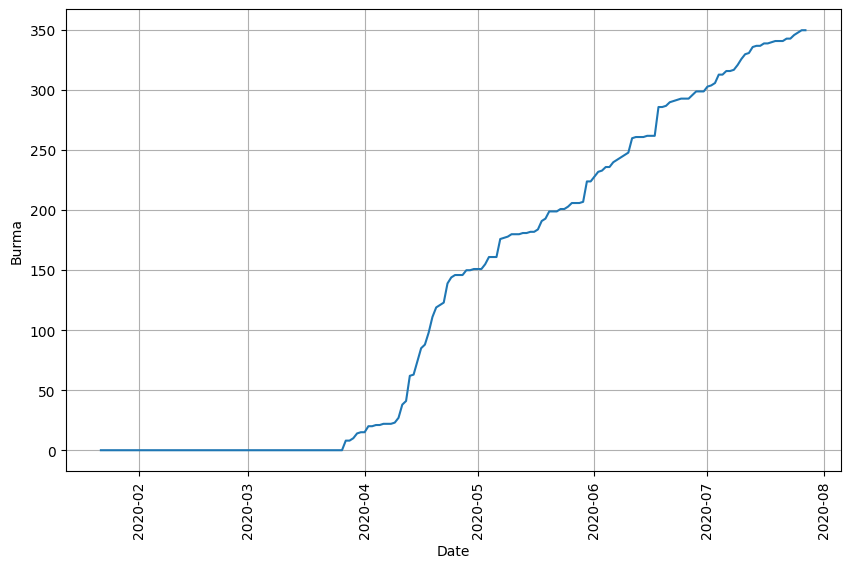

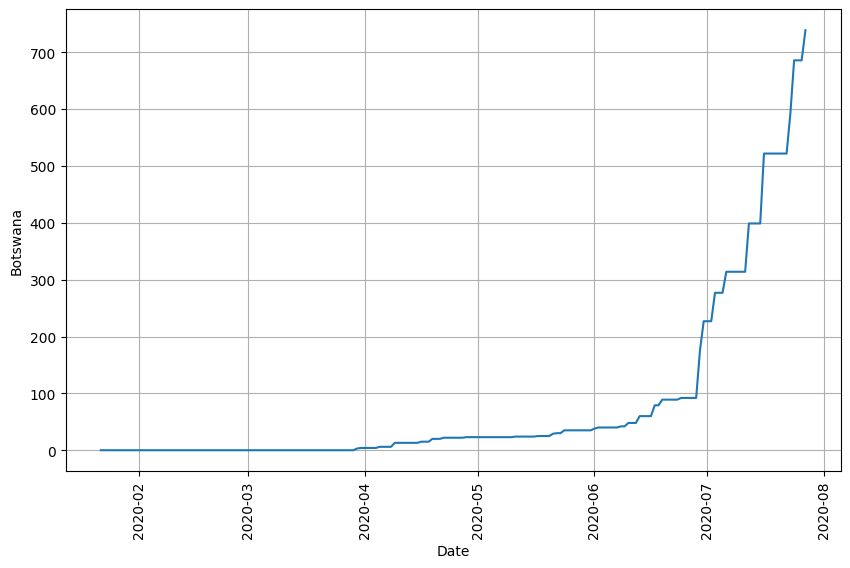

KeyboardInterrupt: 

In [ ]:
#Plotting confirmed cases graph with respect to dates for individual countries
col_list=list(df["Country/Region"].unique())
for i in col_list:

  plt.figure(figsize=(10,6))
  plt.plot(df[df['Country/Region']==i]["Date"],df[df['Country/Region']==i]["Confirmed"])
  plt.xlabel("Date")
  plt.xticks(rotation=90)
  plt.ylabel(i)
  plt.grid()
  plt.show()

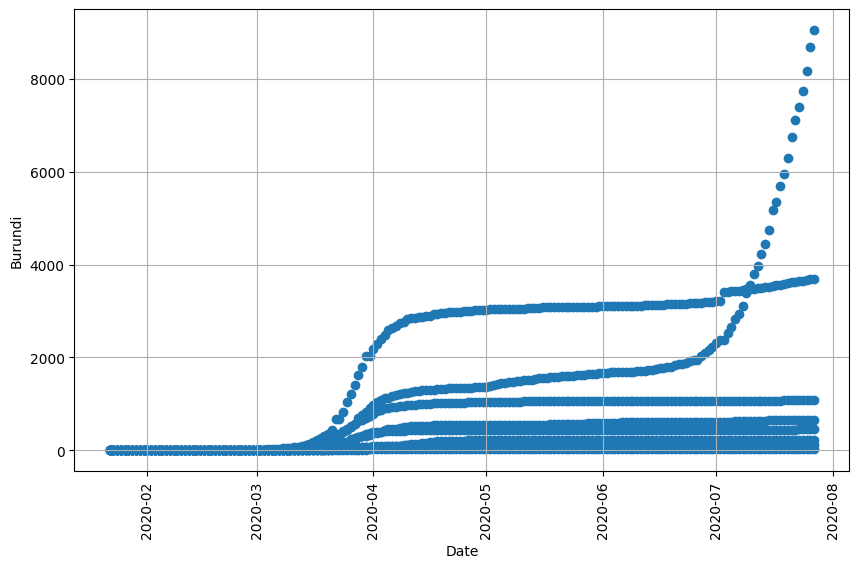

In [ ]:
plt.figure(figsize=(10,6))
plt.(df[df['Country/Region']=='Australia']["Date"],df[df['Country/Region']=='Australia']["Confirmed"])
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel(i)
plt.grid()
plt.show()

In [ ]:
df[df['Country/Region']=='Australia']

Country/Region      Lat      Long       Date  Confirmed  Deaths  \
8          Australia -35.4735  149.0124 2020-01-22          0       0   
9          Australia -33.8688  151.2093 2020-01-22          0       0   
10         Australia -12.4634  130.8456 2020-01-22          0       0   
11         Australia -27.4698  153.0251 2020-01-22          0       0   
12         Australia -34.9285  138.6007 2020-01-22          0       0   
...              ...      ...       ...        ...        ...     ...   
48818      Australia -27.4698  153.0251 2020-07-27       1076       6   
48819      Australia -34.9285  138.6007 2020-07-27        447       4   
48820      Australia -42.8821  147.3272 2020-07-27        229      13   
48821      Australia -37.8136  144.9631 2020-07-27       9049      83   
48822      Australia -31.9505  115.8605 2020-07-27        659       9   

       Recovered  Active       WHO Region  
8              0       0  Western Pacific  
9              0       0  Western Pacific  
10             0       0  Western Pacific  
11             0       0  Western Pacific  
12             0       0  Western Pacific  
...          ...     ...              ...  
48818       1063       7  Western Pacific  
48819        441       2  Western Pacific  
48820        215       1  Western Pacific  
48821       3817    5149  Western Pacific  
48822        647       3  Western Pacific  

[1504 rows x 9 columns]

In [ ]:
df_copy=pd.read_csv("covid_19_clean_complete.csv")
df_copy['Date']=pd.to_datetime(df_copy["Date"])

In [ ]:
df_copy[df_copy['Country/Region']=='Australia']

Province/State Country/Region      Lat      Long  \
8      Australian Capital Territory      Australia -35.4735  149.0124   
9                   New South Wales      Australia -33.8688  151.2093   
10               Northern Territory      Australia -12.4634  130.8456   
11                       Queensland      Australia -27.4698  153.0251   
12                  South Australia      Australia -34.9285  138.6007   
...                             ...            ...      ...       ...   
48818                    Queensland      Australia -27.4698  153.0251   
48819               South Australia      Australia -34.9285  138.6007   
48820                      Tasmania      Australia -42.8821  147.3272   
48821                      Victoria      Australia -37.8136  144.9631   
48822             Western Australia      Australia -31.9505  115.8605   

            Date  Confirmed  Deaths  Recovered  Active       WHO Region  
8     2020-01-22          0       0          0       0  Western Pacific  
9     2020-01-22          0       0          0       0  Western Pacific  
10    2020-01-22          0       0          0       0  Western Pacific  
11    2020-01-22          0       0          0       0  Western Pacific  
12    2020-01-22          0       0          0       0  Western Pacific  
...          ...        ...     ...        ...     ...              ...  
48818 2020-07-27       1076       6       1063       7  Western Pacific  
48819 2020-07-27        447       4        441       2  Western Pacific  
48820 2020-07-27        229      13        215       1  Western Pacific  
48821 2020-07-27       9049      83       3817    5149  Western Pacific  
48822 2020-07-27        659       9        647       3  Western Pacific  

[1504 rows x 10 columns]

Australia's graph looked different because it has data for different provinces.

In [ ]:
#Let's combine the data for all the countries
df_copy1=df.groupby("Date").sum().reset_index()

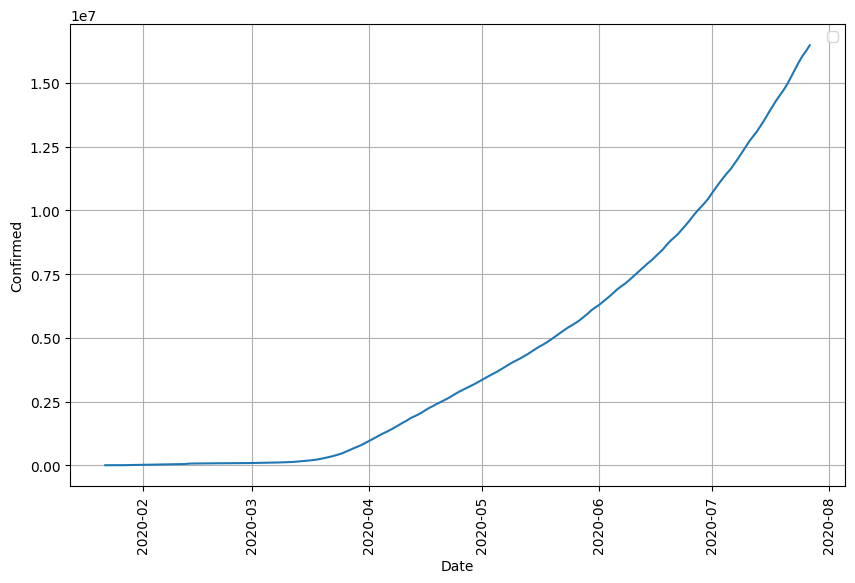

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_copy1["Date"],df_copy1["Confirmed"])
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Confirmed")
plt.grid(True)
plt.show()

In [ ]:
df_copy1.head()

Date                                     Country/Region         Lat  \
0 2020-01-22  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...  5594.20365   
1 2020-01-23  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...  5594.20365   
2 2020-01-24  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...  5594.20365   
3 2020-01-25  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...  5594.20365   
4 2020-01-26  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...  5594.20365   

          Long  Confirmed  Deaths  Recovered  Active  \
0  6140.869714        555      17         28     510   
1  6140.869714        654      18         30     606   
2  6140.869714        941      26         36     879   
3  6140.869714       1434      42         39    1353   
4  6140.869714       2118      56         52    2010   

                                          WHO Region  
0  Eastern MediterraneanEuropeAfricaEuropeAfricaA...  
1  Eastern MediterraneanEuropeAfricaEuropeAfricaA...  
2  Eastern MediterraneanEuropeAfricaEuropeAfricaA...  
3  Eastern MediterraneanEuropeAfricaEuropeAfricaA...  
4  Eastern MediterraneanEuropeAfricaEuropeAfricaA...

In [ ]:
#Let's plot choropleth to see impact of COVID
import plotly.express as px
#representation for data at last date
df_lastdate=df[df["Date"]==df["Date"].max()]
df_lastdatetop=df_lastdate.groupby("Country/Region")[["Confirmed","Recovered","Active","Deaths"]].sum().reset_index()
fig=px.choropleth(df_lastdatetop,
                   locations="Country/Region",
                   locationmode="country names",
                   color="Active",
                   hover_name="Country/Region",
                   range_color=[1,1000000],
                   color_continuous_scale="Viridis",
                   title="Active COVID-19 Cases by Country"

                   )
fig.show()

In [ ]:
#choropleth for confirmed,recovered and deaths
fig=px.choropleth(df_lastdatetop,
                  locations="Country/Region",
                  locationmode="country names",
                  color="Confirmed",
                  hover_name="Country/Region",
                  range_color=[1,1000000],
                  color_continuous_scale="Viridis",
                  title="Confirmed COVID-19 Cases by Country")
fig.show()


In [ ]:
fig=px.choropleth(df_lastdatetop,
                  locations="Country/Region",
                  locationmode="country names",
                  color="Recovered",
                  hover_name="Country/Region",
                  range_color=[1,1000000],
                  color_continuous_scale="Viridis",
                  title="Recovered COVID-19 Cases by Country")
fig.show()


In [ ]:

fig=px.choropleth(df_lastdatetop,
                  locations="Country/Region",
                  locationmode="country names",
                  color="Deaths",
                  hover_name="Country/Region",
                  range_color=[1,100000],
                  color_continuous_scale="Viridis",
                  title="Deaths COVID-19 Cases by Country")
fig.show()


In [ ]:
pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdm2r6tj3/d_ng7p7o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdm2r6tj3/w1aws107.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16010', 'data', 'file=/tmp/tmpdm2r6tj3/d_ng7p7o.json', 'init=/tmp/tmpdm2r6tj3/w1aws107.json', 'output', 'file=/tmp/tmpdm2r6tj3/prophet_model9q770xho/prophet_model-20241201142728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


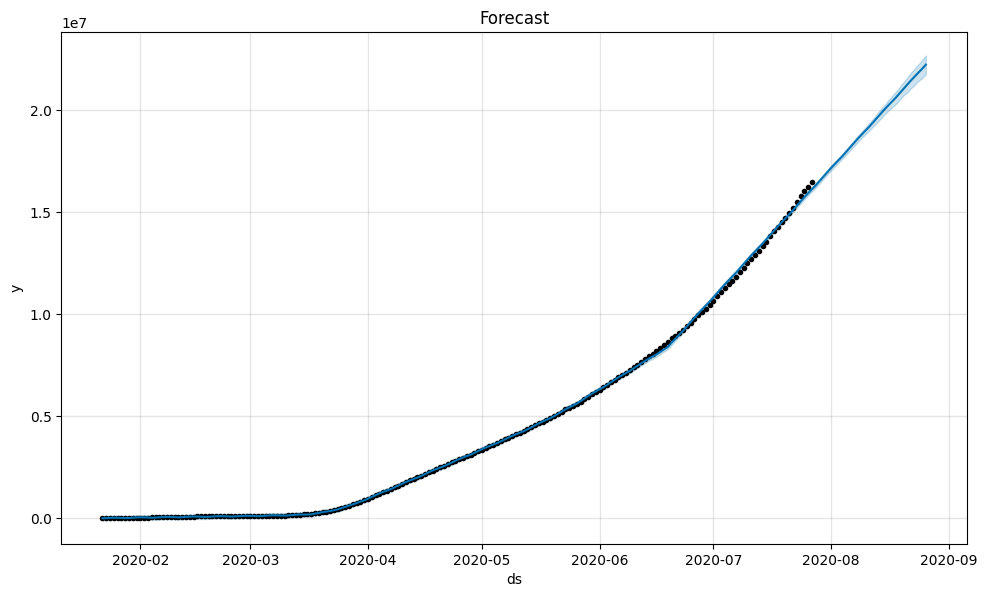

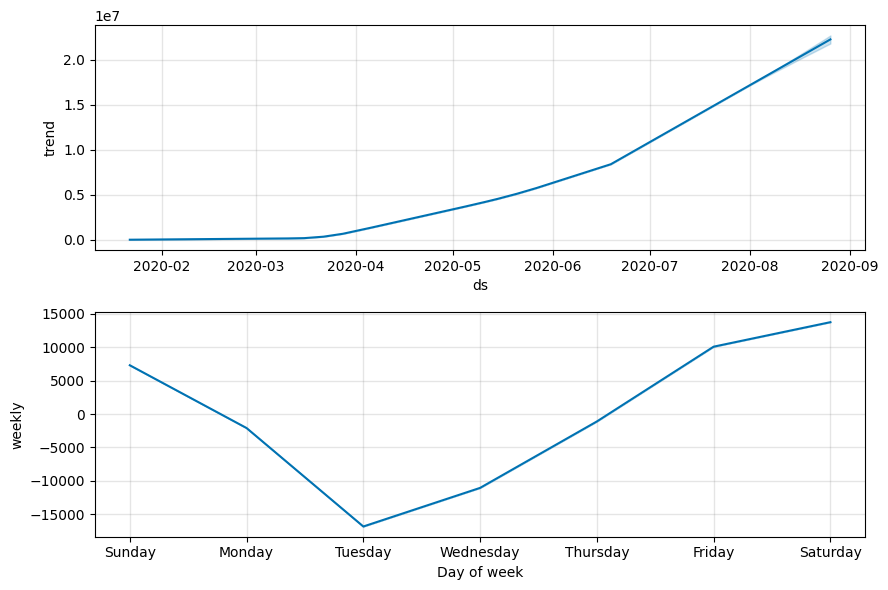

In [ ]:
#Prophet model prediction for future 30 days
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

df_prophet=df.groupby("Date")["Confirmed"].sum().reset_index()
df_prophet.columns=["ds","y"]

#model initialization
model=Prophet()
#fit the model
model.fit(df_prophet)

#Let's predict fo future 30 days
future=model.make_future_dataframe(periods=30)

#Generate forecast
forecast=model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title("Forecast")
plt.show()

# Optional: Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()
